# 1- Importing Libraries & Exploring Dataset

In [1]:
# Import libraries

        #Data Analysis and plotting libraries
import numpy as np                #NumPy is a Python library used for working with arrays
import pandas as pd       #Pandas is a Python library that is most widely used for data  analysis and ml
import seaborn as sns               #Seaborn is a Python data visualization library based on matplotlib
import matplotlib.pyplot as plt  #Matplotlib is a plotting library for creating static, animated, and interactive visualizations
import copy
import scipy.stats as stats          #All of the statistics functions are located in the sub-package scipy.stats
from sklearn.preprocessing import LabelEncoder
        
    #Machine Learning Libraries for training and testing
from sklearn.model_selection import train_test_split
from sklearn import metrics             #for accuracy score
from sklearn.linear_model import LinearRegression

In [2]:
# read the data
data = pd.read_csv('FuelConsumptionCo2.csv')

In [3]:
# display all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
# display data
data

MODELYEAR         Brands             VEHICLECLASS  ENGINESIZE  \
0          2014          ACURA                  COMPACT         2.0   
1          2014          ACURA                  COMPACT         2.4   
2          2014          ACURA                  COMPACT         1.5   
3          2014          ACURA                SUV_SMALL         3.5   
4          2014          ACURA                SUV_SMALL         3.5   
5          2014          ACURA                 MID_SIZE         3.5   
6          2014          ACURA                 MID_SIZE         3.5   
7          2014          ACURA                 MID_SIZE         3.7   
8          2014          ACURA                 MID_SIZE         3.7   
9          2014          ACURA                  COMPACT         2.4   
10         2014          ACURA                  COMPACT         2.4   
11         2014          ACURA                  COMPACT         3.5   
12         2014   ASTON MARTIN              MINICOMPACT         5.9   
13         2014   ASTON MARTIN               SUBCOMPACT         5.9   
14         2014   ASTON MARTIN               TWO-SEATER         4.7   
15         2014   ASTON MARTIN               TWO-SEATER         4.7   
16         2014   ASTON MARTIN               TWO-SEATER         4.7   
17         2014   ASTON MARTIN               TWO-SEATER         4.7   
18         2014   ASTON MARTIN              MINICOMPACT         5.9   
19         2014           AUDI                  COMPACT         2.0   
20         2014           AUDI                  COMPACT         2.0   
21         2014           AUDI                  COMPACT         2.0   
22         2014           AUDI               SUBCOMPACT         2.0   
23         2014           AUDI               SUBCOMPACT         2.0   
24         2014           AUDI               SUBCOMPACT         2.0   
25         2014           AUDI                 MID_SIZE         2.0   
26         2014           AUDI                 MID_SIZE         3.0   
27         2014           AUDI                 MID_SIZE         3.0   
28         2014           AUDI                 MID_SIZE         3.0   
29         2014           AUDI                 MID_SIZE         3.0   
30         2014           AUDI                 MID_SIZE         3.0   
31         2014           AUDI                 MID_SIZE         4.0   
32         2014           AUDI                 MID_SIZE         3.0   
33         2014           AUDI                FULL_SIZE         3.0   
34         2014           AUDI                FULL_SIZE         4.0   
35         2014           AUDI                FULL_SIZE         6.3   
36         2014           AUDI                FULL_SIZE         3.0   
37         2014           AUDI      STATION_WAGON_SMALL         2.0   
38         2014           AUDI                SUV_SMALL         2.0   
39         2014           AUDI                SUV_SMALL         3.0   
40         2014           AUDI                SUV_SMALL         2.0   
41         2014           AUDI                SUV_SMALL         3.0   
42         2014           AUDI             SUV_STANDARD         3.0   
43         2014           AUDI             SUV_STANDARD         3.0   
44         2014           AUDI               TWO-SEATER         4.2   
45         2014           AUDI               TWO-SEATER         4.2   
46         2014           AUDI               TWO-SEATER         5.2   
47         2014           AUDI               TWO-SEATER         5.2   
48         2014           AUDI               TWO-SEATER         4.2   
49         2014           AUDI               TWO-SEATER         4.2   
50         2014           AUDI               TWO-SEATER         5.2   
51         2014           AUDI               TWO-SEATER         5.2   
52         2014           AUDI               SUBCOMPACT         4.2   
53         2014           AUDI               SUBCOMPACT         4.2   
54         2014           AUDI                 MID_SIZE         4.0   
55         2014           AUDI

In [5]:
# display basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   Brands                    1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 100.2+ KB


In [6]:
# display transposed description of data
data.describe().T

count         mean        std     min      25%  \
MODELYEAR                 1067.0  2014.000000   0.000000  2014.0  2014.00   
ENGINESIZE                1067.0     3.346298   1.415895     1.0     2.00   
CYLINDERS                 1067.0     5.794752   1.797447     3.0     4.00   
FUELCONSUMPTION_CITY      1067.0    13.296532   4.101253     4.6    10.25   
FUELCONSUMPTION_HWY       1067.0     9.474602   2.794510     4.9     7.50   
FUELCONSUMPTION_COMB      1067.0    11.580881   3.485595     4.7     9.00   
FUELCONSUMPTION_COMB_MPG  1067.0    26.441425   7.468702    11.0    21.00   
CO2EMISSIONS              1067.0   256.228679  63.372304   108.0   207.00   

                             50%      75%     max  
MODELYEAR                 2014.0  2014.00  2014.0  
ENGINESIZE                   3.4     4.30     8.4  
CYLINDERS                    6.0     8.00    12.0  
FUELCONSUMPTION_CITY        12.6    15.55    30.2  
FUELCONSUMPTION_HWY          8.8    10.85    20.5  
FUELCONSUMPTION_COMB        10.9    13.35    25.8  
FUELCONSUMPTION_COMB_MPG    26.0    31.00    60.0  
CO2EMISSIONS               251.0   294.00   488.0

# 2- Checking Missing Values & Outliers

In [7]:
# Check for the null values in data
data.isna().apply(pd.value_counts)

MODELYEAR  Brands  VEHICLECLASS  ENGINESIZE  CYLINDERS  TRANSMISSION  \
False       1067    1067          1067        1067       1067          1067   

       FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
False      1067                  1067                 1067   

       FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
False                  1067                      1067          1067

**There are no missing values.**

## CO2 Emissions

<AxesSubplot:xlabel='CO2EMISSIONS'>

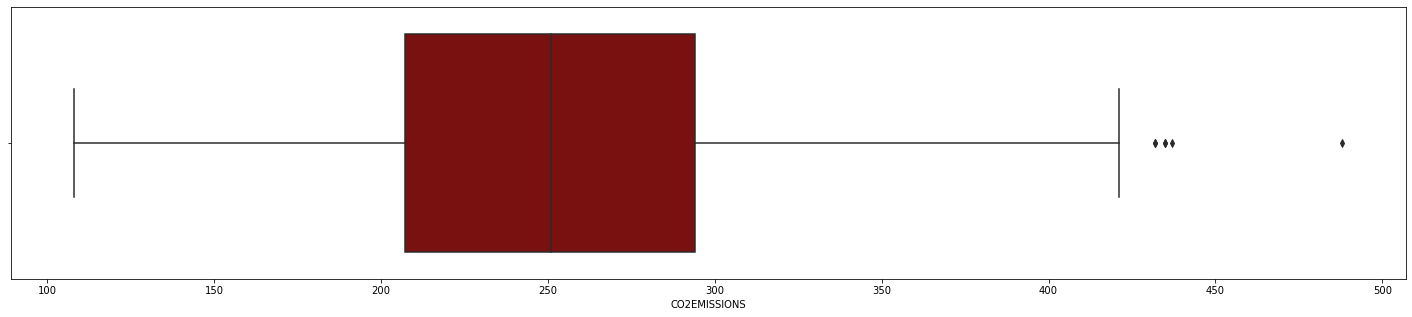

In [8]:
# set size of graph
plt.figure(figsize= (25,5))

# boxplot of CO2 Emissions
sns.boxplot(x=data['CO2EMISSIONS'], color='darkred')

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Brands'>

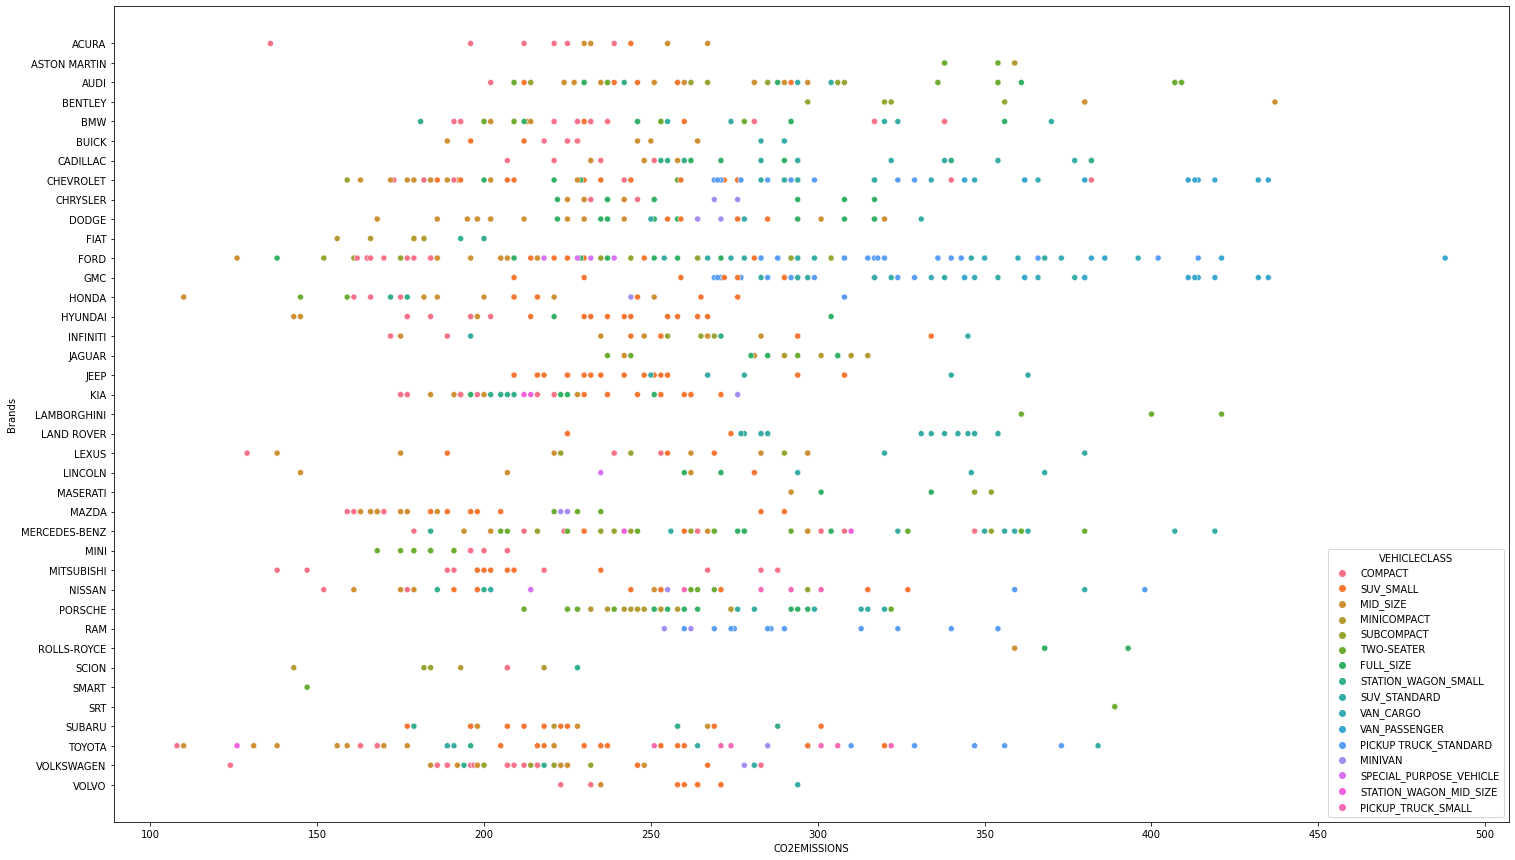

In [9]:
# set size of graph
plt.figure(figsize= (25,15))

# scatter plot of CO2 Emissions of each Brand according to the vehicle class
sns.scatterplot(x='CO2EMISSIONS', y='Brands', hue= 'VEHICLECLASS', data= data)

### From this Scatter Plot:
**Commenting on the premium high-end vehicles**
<br>
    -By looking at some of the premium high end vehicles like Audi, Aston Martin, Mercedes-Benz, Rolls-Royce, Lamborghini, and few more, we can see that emit so much carbon dioxide as the use premium gasoline which is the second most Consumed fuel type in our data set, and hence, the second most carbon dioxide emission factor of the whole fuel type go column.
<br>
<br>
**Commenting on the rest of the data**
<br>
    -As we see, small vehicles with small engine size are the least carbon dioxide emitting vehicles.
    <br>
    -And by looking At full size, and special purpose vehicle we can see that in some brands it doesn't emit that much of carbon dioxide even though it's size is not small neither it's fuel consumption.
    

## Fuel Consumption City

<AxesSubplot:xlabel='FUELCONSUMPTION_CITY'>

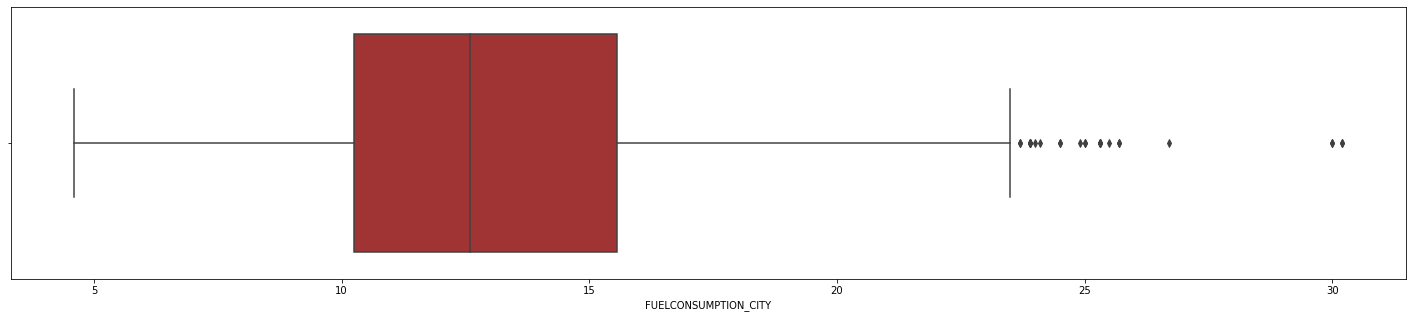

In [10]:
# set size of graph
plt.figure(figsize= (25,5))

# boxplot of City Fuel Consumption
sns.boxplot(x=data['FUELCONSUMPTION_CITY'], color='firebrick')

<AxesSubplot:xlabel='FUELCONSUMPTION_CITY', ylabel='Brands'>

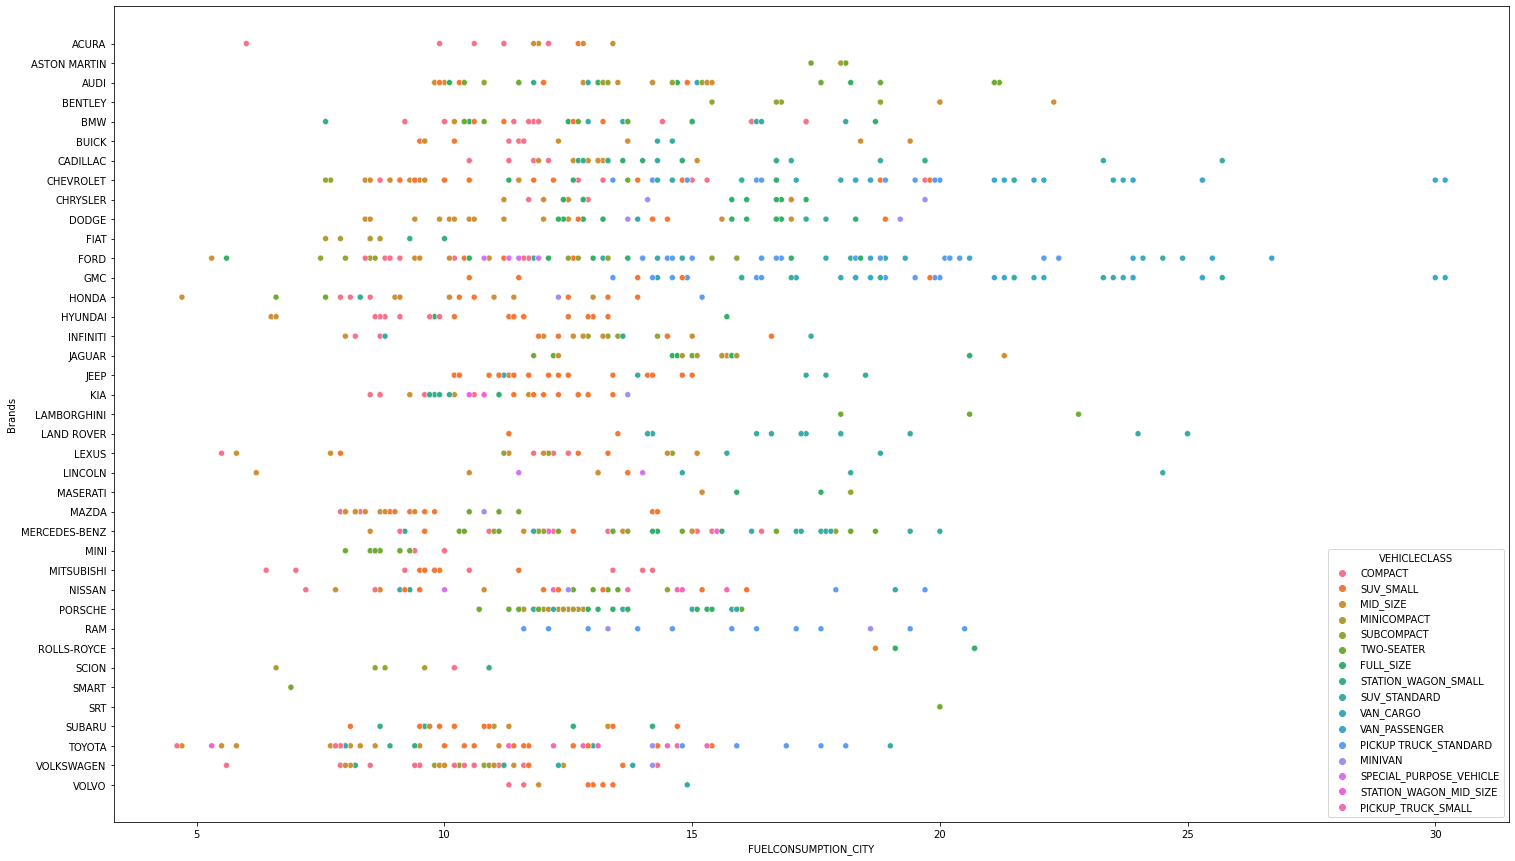

In [11]:
# set size of graph
plt.figure(figsize= (25,15))

# scatter plot of City Fuel Consumption of each Brand according to the vehicle class
sns.scatterplot(x='FUELCONSUMPTION_CITY', y='Brands', hue= 'VEHICLECLASS', data= data)

## Fuel Consumption Highway

<AxesSubplot:xlabel='FUELCONSUMPTION_HWY'>

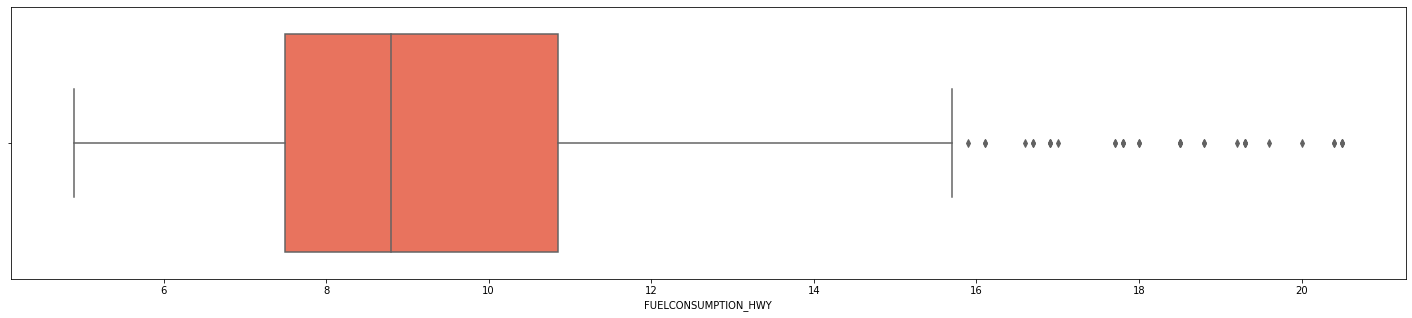

In [12]:
# set size of graph
plt.figure(figsize= (25,5))

# boxplot of Highway Fuel Consumption
sns.boxplot(x=data['FUELCONSUMPTION_HWY'], color='tomato')

<AxesSubplot:xlabel='FUELCONSUMPTION_HWY', ylabel='Brands'>

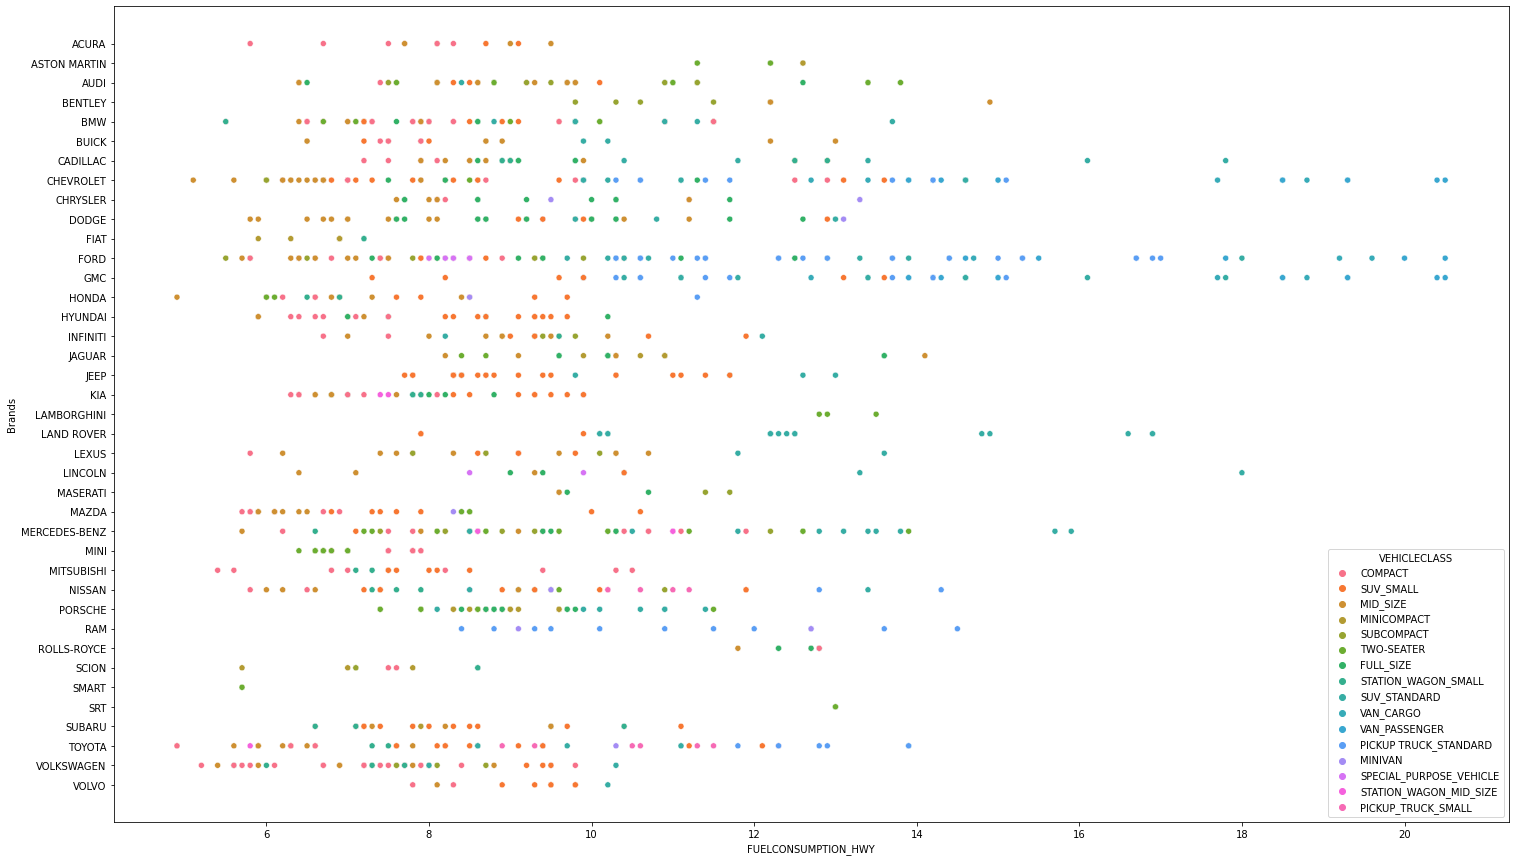

In [13]:
# set size of graph
plt.figure(figsize= (25,15))

# scatter plot of Highway Fuel Consumption of each Brand according to the vehicle class
sns.scatterplot(x='FUELCONSUMPTION_HWY', y='Brands', hue= 'VEHICLECLASS', data= data)

## Fuel Consumption Combined

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB'>

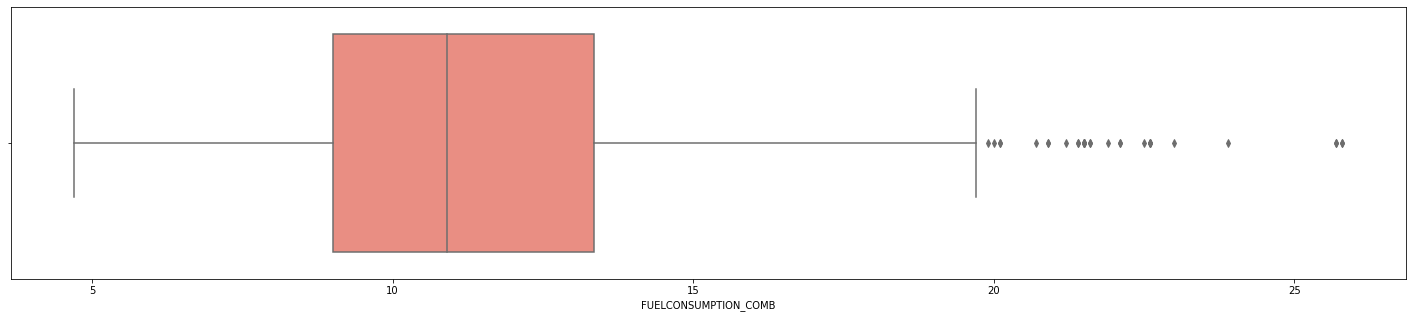

In [14]:
# set size of graph
plt.figure(figsize= (25,5))

# boxplot of Combined Fuel Consumption
sns.boxplot(x=data['FUELCONSUMPTION_COMB'], color='salmon')

### Outliers Comment:
    -As we have mentioned before, outliers should be eliminated in one of either cases, the first it's too small and it will not Affect the final result, or if it's out of the domain study.
    -In this case as well we have figured out that these outliers are caused by studying so many vehicle classes, one of which is the van-cargo, van-passengers, and SUV standard Compared with some vehicle classes of those With high efficiency "MPG".
    -In this case as well we do not have the ability to eliminate these rows of data.

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB', ylabel='Brands'>

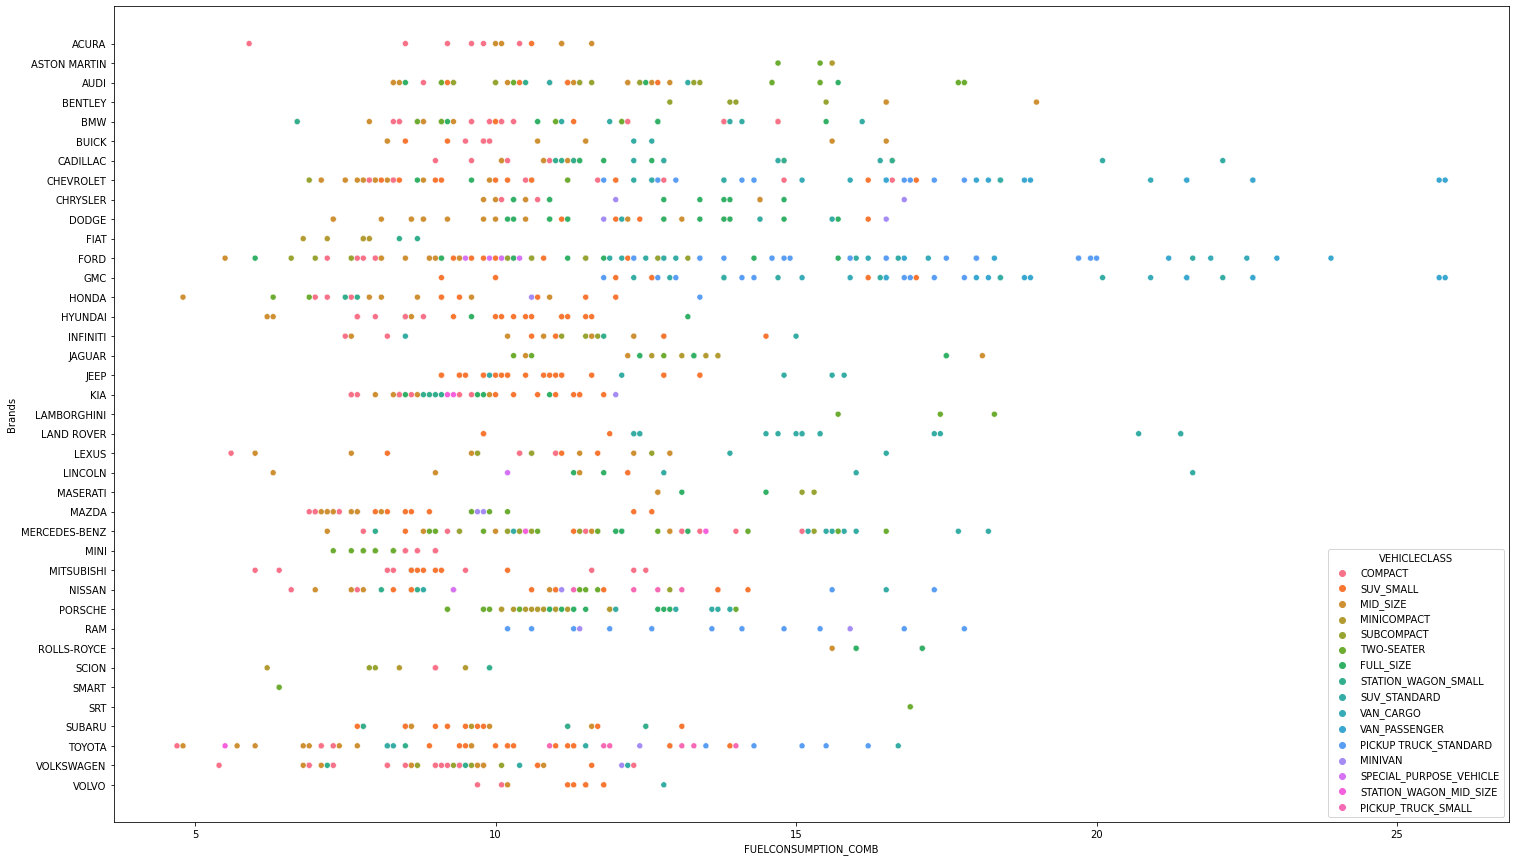

In [15]:
# set size of graph
plt.figure(figsize= (25,15))

# scatterplot of Combined Fuel Consumption of each Brand according to the vehicle class
sns.scatterplot(x='FUELCONSUMPTION_COMB', y='Brands', hue= 'VEHICLECLASS', data= data)

### From this Scatter Plot:
<br>
    -Some brands are efficient than the others, Small SUV's and mid size of brands like Volkswagen, Toyota, SUBARU, and Volvo, or somewhat the same the fuel consumption combined and city and highway. <br> <br>
    -Some other vehicle classes with certain brands like Porsche, Mercedes-Benz, Jaguar, DODGE, and BMW,Are not the same in fuel consumption as their engines efficiency Varies.

## Fuel Consumption Combined [MPG]

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB_MPG'>

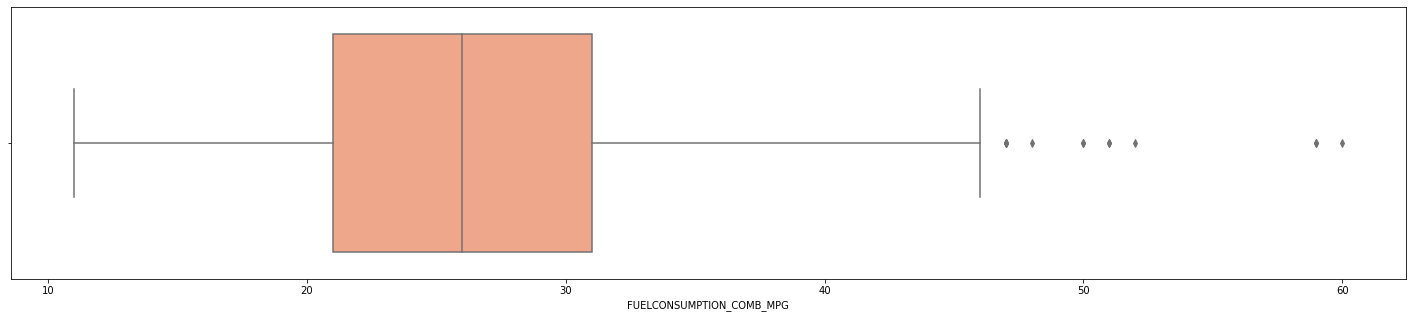

In [16]:
# set size of graph
plt.figure(figsize= (25, 5))

# boxplot of Combined Fuel Consumption (MPG)
sns.boxplot(x=data['FUELCONSUMPTION_COMB_MPG'], color='lightsalmon')

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='Brands'>

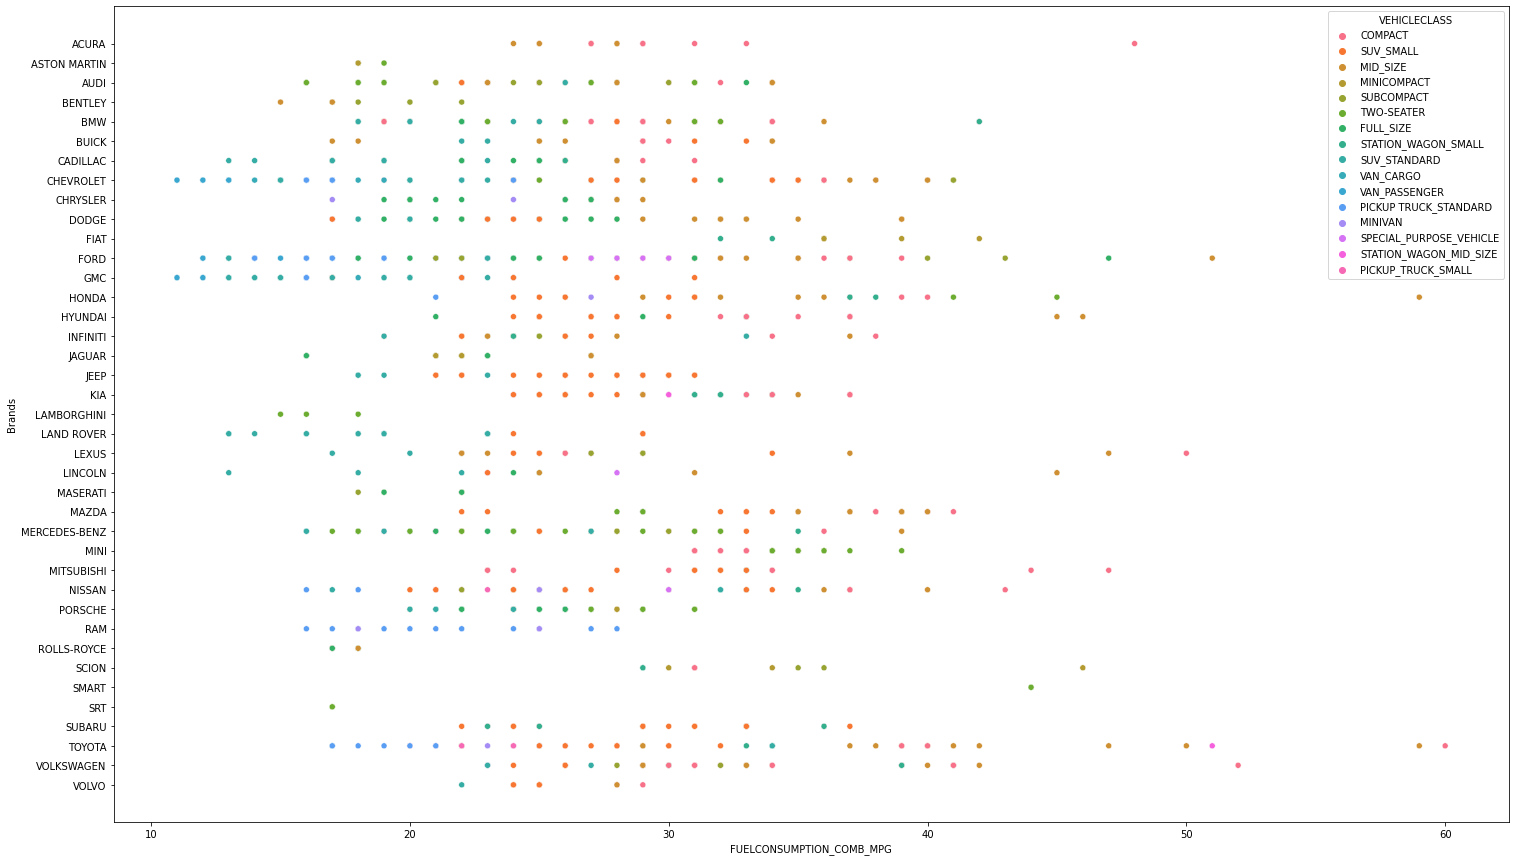

In [17]:
# set size of graph
plt.figure(figsize= (25,15))

# scatter plot of Combined Fuel Consumption (MPG) of each Brand according to the vehicle class
sns.scatterplot(x='FUELCONSUMPTION_COMB_MPG', y='Brands', hue= 'VEHICLECLASS', data= data)

### In this scatter plot:
    - we can see that the class vehicles are arranged in a better way, enabling us to see the effeciency of each brand in each and every vehicle class that they produce.
    - it's observable that RAM is one of the best brands producing van passenger Vehicles with high efficiency, On the contrary Chevrolet, and GMC, both has one of the worst efficient Brands producing van passenger vehicle.

## Engine Size and Number of Cylinders

In [18]:
# set size of grph
plt.rcParams['figure.figsize'] = [30, 5]

<AxesSubplot:xlabel='ENGINESIZE'>

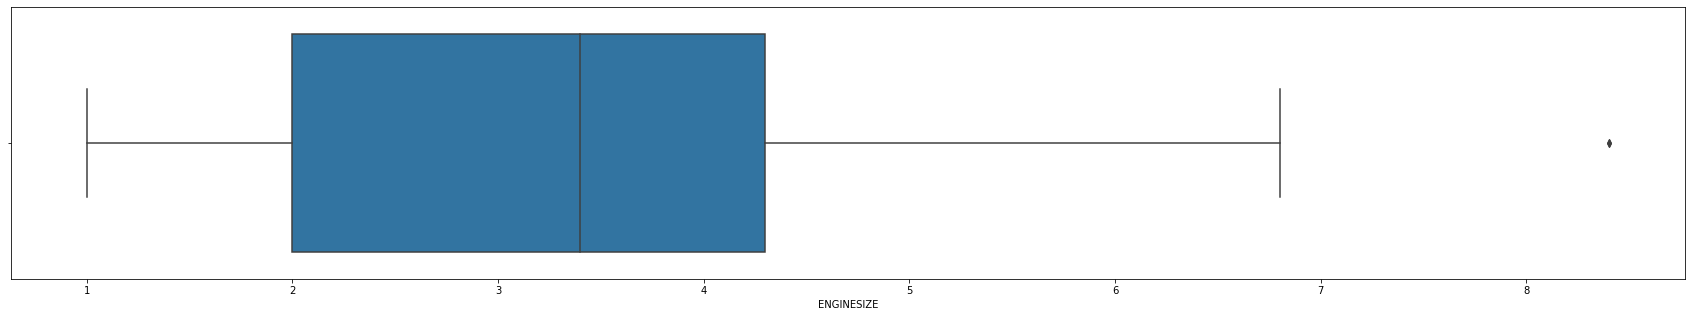

In [19]:
# boxplot of Engine Size
sns.boxplot(x=data['ENGINESIZE'])

<AxesSubplot:xlabel='ENGINESIZE', ylabel='Brands'>

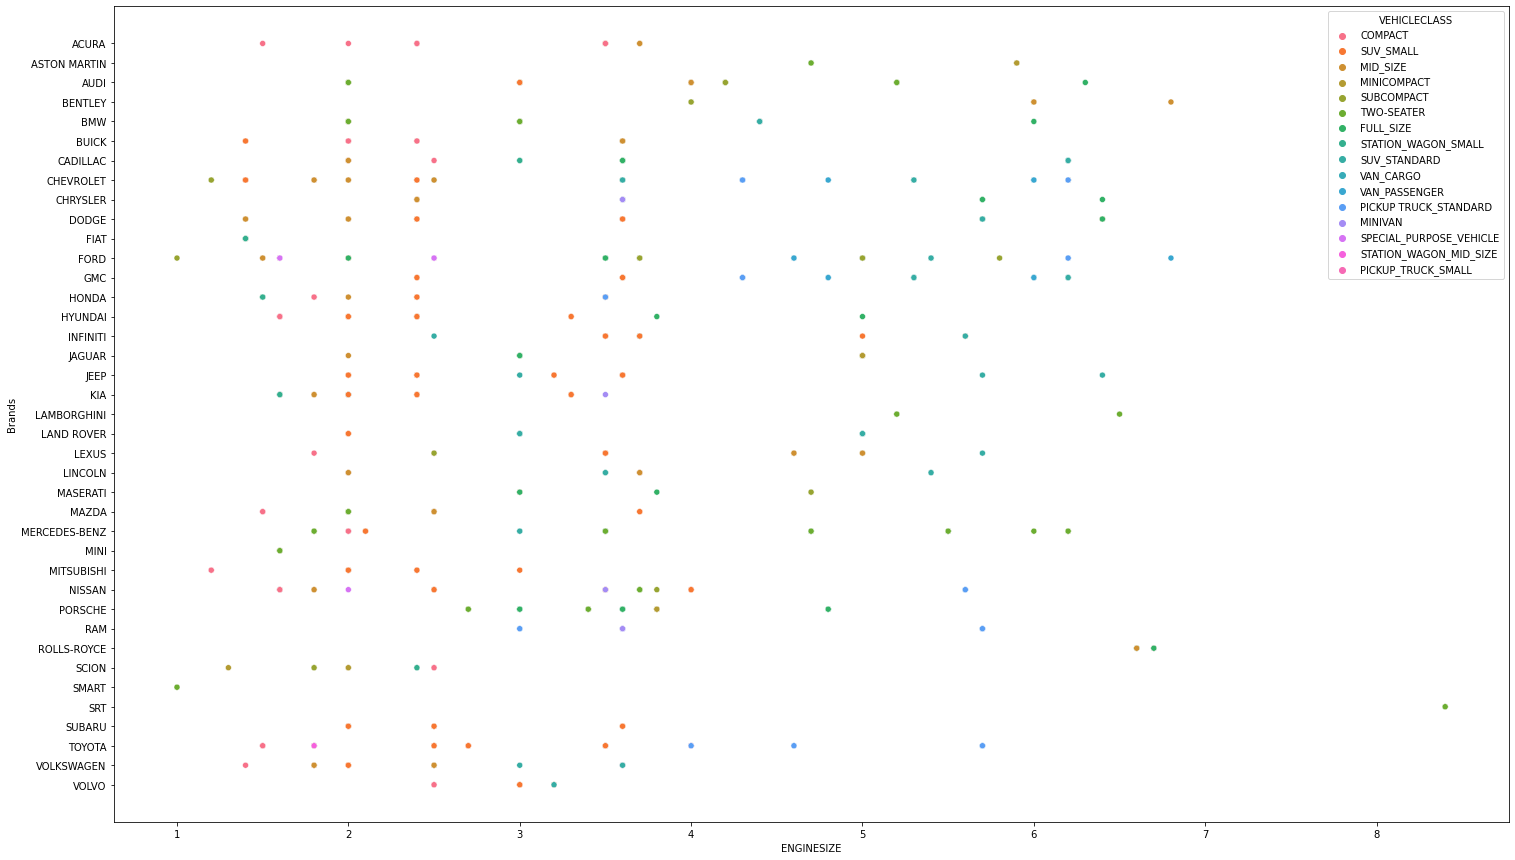

In [20]:
# set size of graph
plt.figure(figsize= (25,15))

# boxplot of Combined Fuel Consumption (MPG) of each Brand according to the vehicle class
sns.scatterplot(x=data['ENGINESIZE'], y=data['Brands'], hue=data['VEHICLECLASS'])

**As it's already can be estimated from the vehicle class name, SUV-Small, compact, MINI-Compact, are ones of the vehicles that have the smallest engine size.**
<br>
**In the middle of engine size axis, there lay special-purpose-vehicles, pickup-truck-small, and station-wagon-mid-size.**

<AxesSubplot:xlabel='CYLINDERS'>

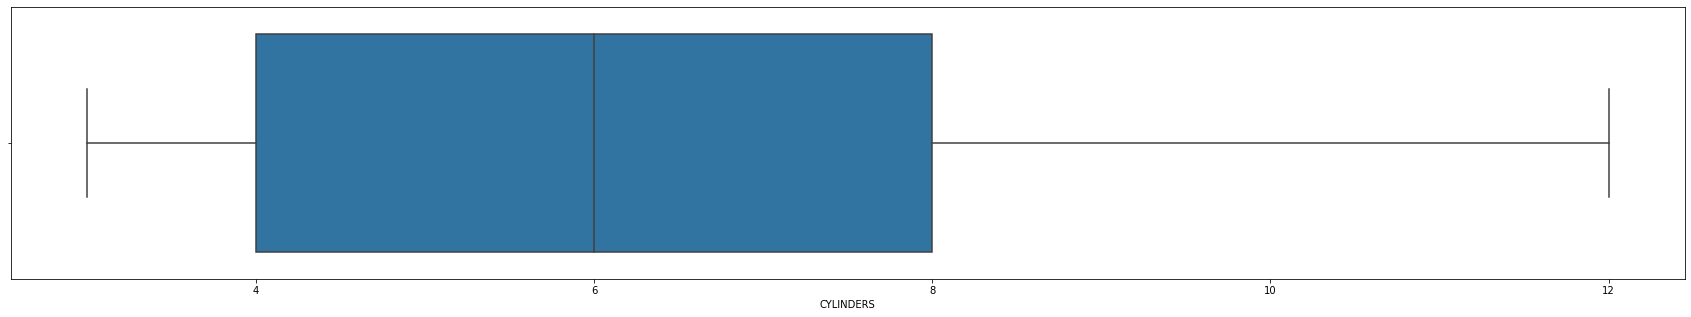

In [21]:
# boxplot of number of cylinders
sns.boxplot(x=data['CYLINDERS'])

<AxesSubplot:xlabel='CYLINDERS', ylabel='Brands'>

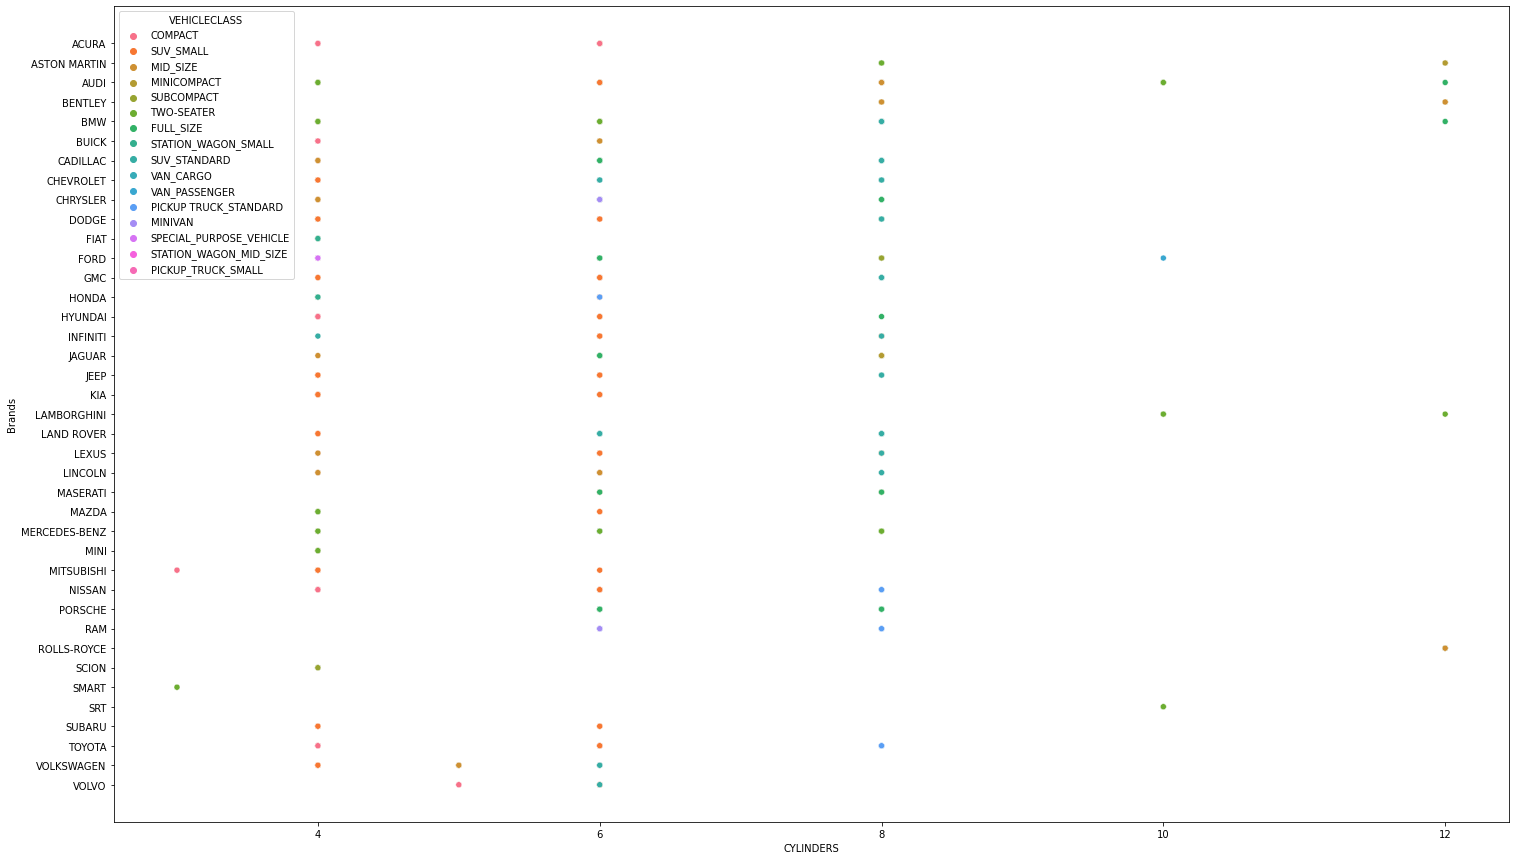

In [22]:
# set size of graph
plt.figure(figsize= (25,15))

# boxplot of Combined Fuel Consumption (MPG) of each Brand according to the vehicle class
sns.scatterplot(x=data['CYLINDERS'], y=data['Brands'], hue=data['VEHICLECLASS'])

## Skewness

In [23]:
# display the skewness of variables
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data.FUELCONSUMPTION_CITY), stats.skew(data.FUELCONSUMPTION_HWY), 
                                       stats.skew(data.FUELCONSUMPTION_COMB), stats.skew(data.FUELCONSUMPTION_COMB_MPG), 
                                       stats.skew(data.CO2EMISSIONS)]},
                        index=['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB', 
                               'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'])  # Measure the skeweness of the required columns
Skewness

Skewness
FUELCONSUMPTION_CITY      0.899362
FUELCONSUMPTION_HWY       1.262081
FUELCONSUMPTION_COMB      1.031140
FUELCONSUMPTION_COMB_MPG  0.584586
CO2EMISSIONS              0.518784

# 3- Data Preprocessing

In [24]:
# a function that returns the first letter of a transmissions name (denoting its type)
def transmission(trans):
    x = trans[0]
    y = trans[1]
    if len(trans) == 3:
        return x + y
    elif len(trans) == 2:
        if trans[0] == 'A':
            return 'A'
        elif trans[0] == 'M':
            return 'M'
        else:
            pass
    else:
        pass

In [25]:
# creat a new column 'TRANSMISSIONTYPE' which denotes the transmission type using the transmission function
data['TRANSMISSIONTYPE'] = data['TRANSMISSION'].apply(transmission)

In [26]:
# rearange column order
data = data[['MODELYEAR', 'Brands', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'TRANSMISSIONTYPE', 'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]

In [27]:
# display data (check new addition and rearangement)
data

MODELYEAR         Brands             VEHICLECLASS  ENGINESIZE  \
0          2014          ACURA                  COMPACT         2.0   
1          2014          ACURA                  COMPACT         2.4   
2          2014          ACURA                  COMPACT         1.5   
3          2014          ACURA                SUV_SMALL         3.5   
4          2014          ACURA                SUV_SMALL         3.5   
5          2014          ACURA                 MID_SIZE         3.5   
6          2014          ACURA                 MID_SIZE         3.5   
7          2014          ACURA                 MID_SIZE         3.7   
8          2014          ACURA                 MID_SIZE         3.7   
9          2014          ACURA                  COMPACT         2.4   
10         2014          ACURA                  COMPACT         2.4   
11         2014          ACURA                  COMPACT         3.5   
12         2014   ASTON MARTIN              MINICOMPACT         5.9   
13         2014   ASTON MARTIN               SUBCOMPACT         5.9   
14         2014   ASTON MARTIN               TWO-SEATER         4.7   
15         2014   ASTON MARTIN               TWO-SEATER         4.7   
16         2014   ASTON MARTIN               TWO-SEATER         4.7   
17         2014   ASTON MARTIN               TWO-SEATER         4.7   
18         2014   ASTON MARTIN              MINICOMPACT         5.9   
19         2014           AUDI                  COMPACT         2.0   
20         2014           AUDI                  COMPACT         2.0   
21         2014           AUDI                  COMPACT         2.0   
22         2014           AUDI               SUBCOMPACT         2.0   
23         2014           AUDI               SUBCOMPACT         2.0   
24         2014           AUDI               SUBCOMPACT         2.0   
25         2014           AUDI                 MID_SIZE         2.0   
26         2014           AUDI                 MID_SIZE         3.0   
27         2014           AUDI                 MID_SIZE         3.0   
28         2014           AUDI                 MID_SIZE         3.0   
29         2014           AUDI                 MID_SIZE         3.0   
30         2014           AUDI                 MID_SIZE         3.0   
31         2014           AUDI                 MID_SIZE         4.0   
32         2014           AUDI                 MID_SIZE         3.0   
33         2014           AUDI                FULL_SIZE         3.0   
34         2014           AUDI                FULL_SIZE         4.0   
35         2014           AUDI                FULL_SIZE         6.3   
36         2014           AUDI                FULL_SIZE         3.0   
37         2014           AUDI      STATION_WAGON_SMALL         2.0   
38         2014           AUDI                SUV_SMALL         2.0   
39         2014           AUDI                SUV_SMALL         3.0   
40         2014           AUDI                SUV_SMALL         2.0   
41         2014           AUDI                SUV_SMALL         3.0   
42         2014           AUDI             SUV_STANDARD         3.0   
43         2014           AUDI             SUV_STANDARD         3.0   
44         2014           AUDI               TWO-SEATER         4.2   
45         2014           AUDI               TWO-SEATER         4.2   
46         2014           AUDI               TWO-SEATER         5.2   
47         2014           AUDI               TWO-SEATER         5.2   
48         2014           AUDI               TWO-SEATER         4.2   
49         2014           AUDI               TWO-SEATER         4.2   
50         2014           AUDI               TWO-SEATER         5.2   
51         2014           AUDI               TWO-SEATER         5.2   
52         2014           AUDI               SUBCOMPACT         4.2   
53         2014           AUDI               SUBCOMPACT         4.2   
54         2014           AUDI                 MID_SIZE         4.0   
55         2014           AUDI

In [28]:
# make a deep copy of the data
dataE = copy.deepcopy(data)

In [29]:
# encode every string value in the copy of data (dataE)
dataE.loc[:,['Brands', 'VEHICLECLASS', 'TRANSMISSIONTYPE', 'FUELTYPE']] = dataE.loc[:,['Brands', 'VEHICLECLASS', 'TRANSMISSIONTYPE', 'FUELTYPE']].apply(LabelEncoder().fit_transform)

In [30]:
# encode transmission type and fuel type in the copy of data (dataE)
#dataE.loc[:,['TRANSMISSIONTYPE', 'FUELTYPE']] = dataE.loc[:,['TRANSMISSIONTYPE', 'FUELTYPE']].apply(LabelEncoder().fit_transform)

In [31]:
# display encoded data
dataE

MODELYEAR  Brands  VEHICLECLASS  ENGINESIZE  CYLINDERS TRANSMISSION  \
0          2014       0             0         2.0          4          AS5   
1          2014       0             0         2.4          4           M6   
2          2014       0             0         1.5          4          AV7   
3          2014       0            11         3.5          6          AS6   
4          2014       0            11         3.5          6          AS6   
5          2014       0             2         3.5          6          AS6   
6          2014       0             2         3.5          6          AS6   
7          2014       0             2         3.7          6          AS6   
8          2014       0             2         3.7          6           M6   
9          2014       0             0         2.4          4          AS5   
10         2014       0             0         2.4          4           M6   
11         2014       0             0         3.5          6          AS5   
12         2014       1             3         5.9         12           A6   
13         2014       1            10         5.9         12           A6   
14         2014       1            13         4.7          8          AM7   
15         2014       1            13         4.7          8           M6   
16         2014       1            13         4.7          8          AM7   
17         2014       1            13         4.7          8           M6   
18         2014       1             3         5.9         12           A6   
19         2014       2             0         2.0          4          AV8   
20         2014       2             0         2.0          4          AS8   
21         2014       2             0         2.0          4           M6   
22         2014       2            10         2.0          4          AS8   
23         2014       2            10         2.0          4          AS8   
24         2014       2            10         2.0          4           M6   
25         2014       2             2         2.0          4          AS8   
26         2014       2             2         3.0          6          AS8   
27         2014       2             2         3.0          6          AS8   
28         2014       2             2         3.0          6          AS8   
29         2014       2             2         3.0          6          AS8   
30         2014       2             2         3.0          6          AS8   
31         2014       2             2         4.0          8          AS8   
32         2014       2             2         3.0          6          AS8   
33         2014       2             1         3.0          6          AS8   
34         2014       2             1         4.0          8          AS8   
35         2014       2             1         6.3         12          AS8   
36         2014       2             1         3.0          6          AS8   
37         2014       2             9         2.0          4          AS8   
38         2014       2            11         2.0          4          AS8   
39         2014       2            11         3.0          6          AS8   
40         2014       2            11         2.0          4          AS8   
41         2014       2            11         3.0          6          AS8   
42         2014       2            12         3.0          6          AS8   
43         2014       2            12         3.0          6          AS8   
44         2014       2            13         4.2          8           A7   
45         2014       2            13         4.2          8           M6   
46         2014       2            13         5.2         10           A7   
47         2014       2            13         5.2         10           M6   
48         2014       2            13         4.2          8           A7   
49         2014       2            13         4.2          8           M6   
50         2014       2            13         5.2         10           A7   
51

<AxesSubplot:>

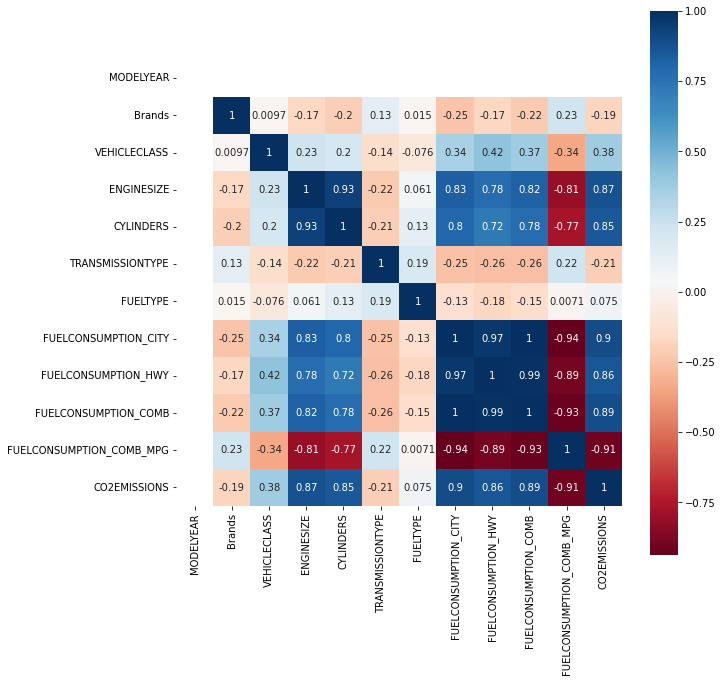

In [32]:
plt.figure(figsize= (10,10))

# correlation between columns in data
sns.heatmap(dataE.corr(), annot=True, cmap="RdBu", square=True)

# 4- Visualizing Data

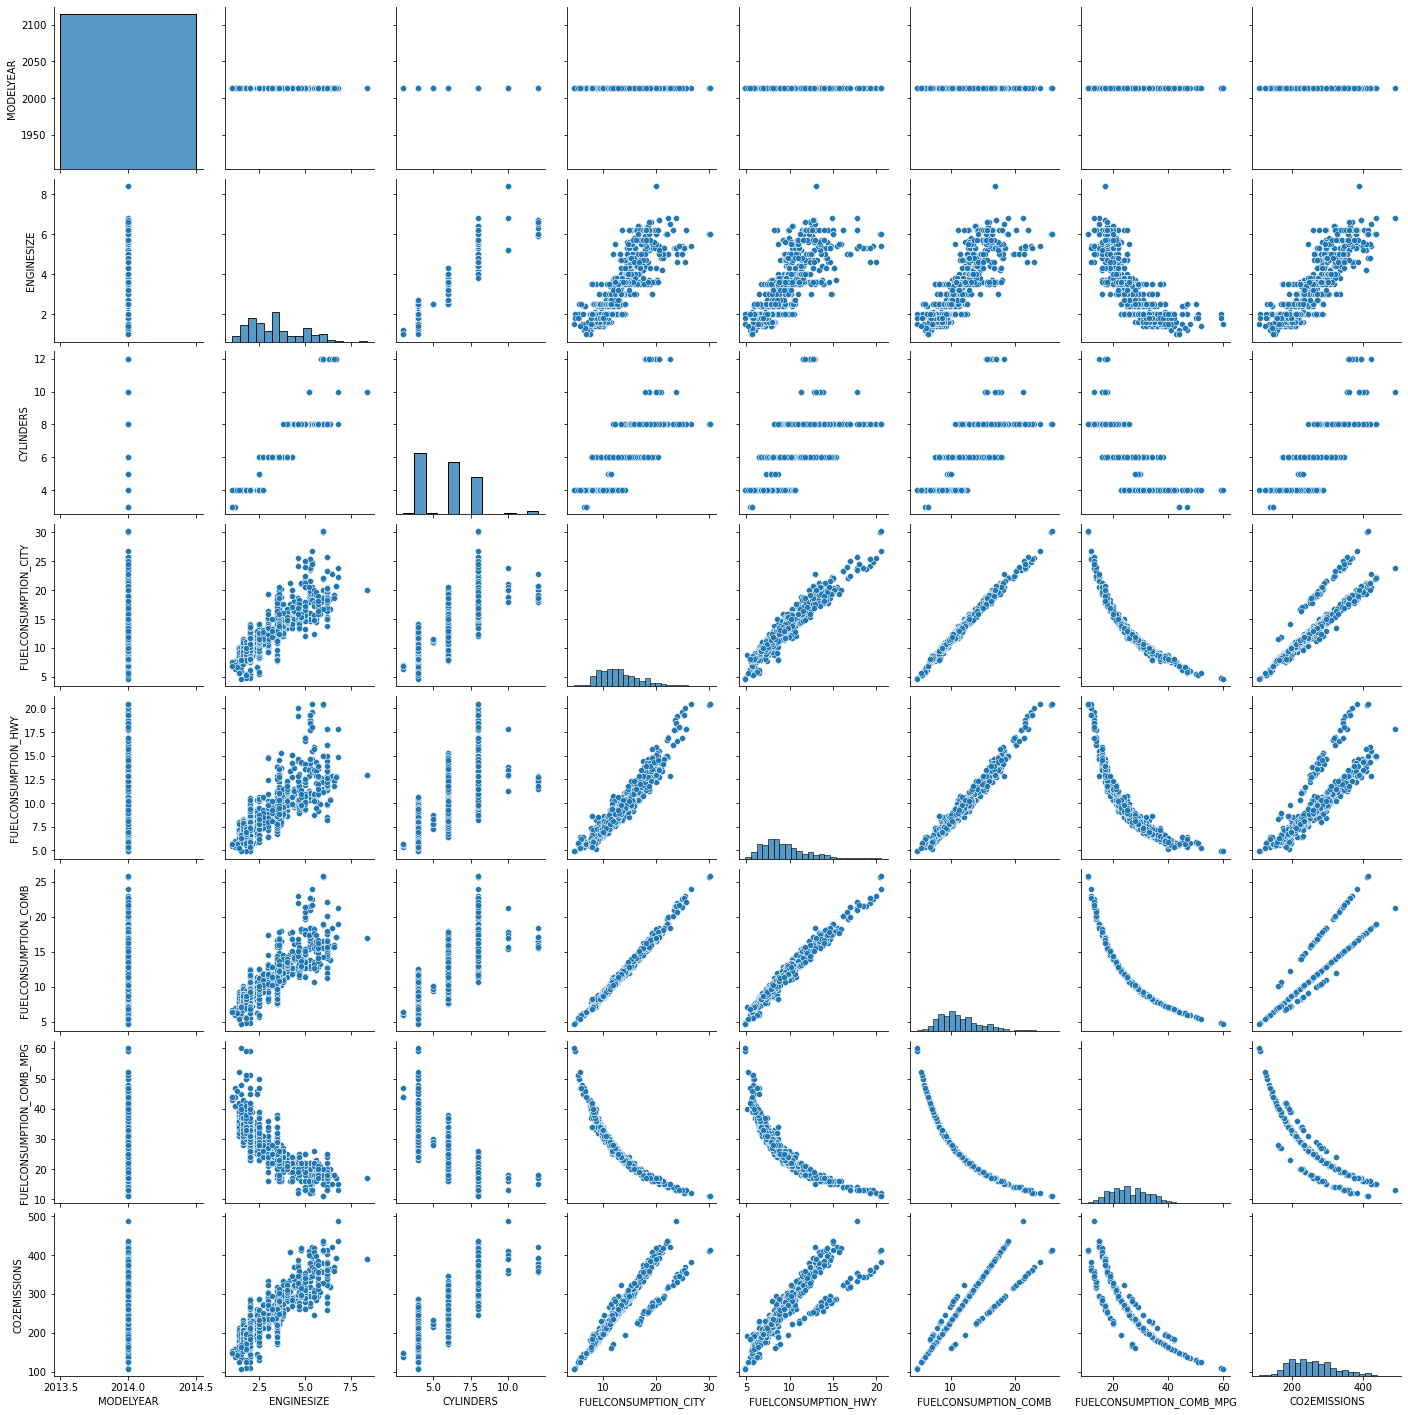

In [33]:
# create a pairplot of data
sns.pairplot(data)

### As the plot demonstrates:

**ENGINE SIZE**

As the engine size increases:
- The number of cylinders tend to increase
- The Fuel Consumption (city, highway, combined) increases
- The MPG Fuel Consumption decreases (Meaning it becomes less efficient)
- CO2 Emissions Increase
<br>
<br>

**CYLINDERS**

As the number of cylinders increase:
- The engine size tends to increase
- The Fuel Consumption (city, highway, combined) hits its peak at 8 cylinders and decreases as the number of cylinders exceeds that <br> [**Note:** This could be an error as there aren't enough instances of vehicles with more than 8 cylinders in the data, conventional wisdom suggests that the 12 cylinders consume the most fuel]
- The MPG Fuel Consumption decreases (Meaning it becomes less efficient)
- CO2 Emissions increase
<br>
<br>

**FUEL CONSUMPTION**
- Increases as the engine size increases
- Tends to increase as the number of cylinders increases
- An increased fuel consumption in any metric is correlated to an increase in fuel consumption in other metrics and a decreased MPG fuel consumption
- An increased fuel consumption is correlated to increased CO2 Emissions
<br>
<br>

**CO2 EMISSIONS**

Increased CO2 Emissions are correlated to:
- Increased Engine Size
- Increased Number of Cylinders
- Increased Fuel Consumption
- Decreased MPG Fuel Consumption

## Model Year

<AxesSubplot:>

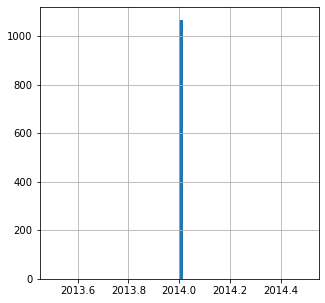

In [34]:
plt.figure(figsize= (5,5))

# display model years of vehicles from data
data['MODELYEAR'].hist(bins=70)

In [35]:
# check different model years
data['MODELYEAR'].nunique()

1

**All cars are of the model year 2014**

## Brands

In [36]:
# group data by brand
byBrand = data.groupby('Brands')

In [37]:
plt.rcParams["figure.figsize"]=50,20

In [38]:
# display transposed description of data grouped by brand
byBrand.describe().T

Brands                                ACURA  ASTON MARTIN         AUDI  \
MODELYEAR                count    12.000000      7.000000    49.000000   
                         mean   2014.000000   2014.000000  2014.000000   
                         std       0.000000      0.000000     0.000000   
                         min    2014.000000   2014.000000  2014.000000   
                         25%    2014.000000   2014.000000  2014.000000   
                         50%    2014.000000   2014.000000  2014.000000   
                         75%    2014.000000   2014.000000  2014.000000   
                         max    2014.000000   2014.000000  2014.000000   
ENGINESIZE               count    12.000000      7.000000    49.000000   
                         mean      2.966667      5.214286     3.230612   
                         std       0.771461      0.641427     1.082860   
                         min       1.500000      4.700000     2.000000   
                         25%       2.400000      4.700000     2.000000   
                         50%       3.500000      4.700000     3.000000   
                         75%       3.500000      5.900000     4.000000   
                         max       3.700000      5.900000     6.300000   
CYLINDERS                count    12.000000      7.000000    49.000000   
                         mean      5.166667      9.714286     6.367347   
                         std       1.029857      2.138090     2.027867   
                         min       4.000000      8.000000     4.000000   
                         25%       4.000000      8.000000     4.000000   
                         50%       6.000000      8.000000     6.000000   
                         75%       6.000000     12.000000     8.000000   
                         max       6.000000     12.000000    12.000000   
FUELCONSUMPTION_CITY     count    12.000000      7.000000    49.000000   
                         mean     11.308333     17.857143    13.789796   
                         std       1.932242      0.315474     3.274475   
                         min       6.000000     17.400000     9.800000   
                         25%      11.050000     17.700000    11.500000   
                         50%      11.850000     18.000000    13.100000   
                         75%      12.250000     18.050000    15.200000   
                         max      13.400000     18.100000    21.200000   
FUELCONSUMPTION_HWY      count    12.000000      7.000000    49.000000   
                         mean      8.016667     12.114286     9.351020   
                         std       1.045191      0.584319     1.894303   
                         min       5.800000     11.300000     6.400000   
                         25%       7.650000     11.750000     8.100000   
                         50%       8.100000     12.200000     8.800000   
                         75%       8.775000     12.600000    10.100000   
                         max       9.500000     12.600000    13.800000   
FUELCONSUMPTION_COMB     count    12.000000      7.000000    49.000000   
                         mean      9.825000     15.285714    11.793878   
                         std       1.508838      0.409994     2.624278   
                         min       5.900000     14.700000     8.300000   
                         25%       9.500000     15.050000    10.000000   
                         50%      10.050000     15.400000    11.200000   
                         75%      10.725000     15.600000    12.900000   
                         max      11.600000     15.600000    17.800000   
FUELCONSUMPTION_COMB_MPG count    12.000000      7.000000    49.000000   
                         mean     29.500000     18.285714    24.938776   
                         std       6.360389      0.487950     5.088419   
                         min      24.000000     18.000000    16.000000   
                         25%      26.500000     18.000000    22.000000   
    

In [39]:
# Check the number of vehicles of each brand in the data
data['Brands'].value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: Brands, dtype: int64

In [40]:
plt.rcParams['figure.figsize'] = [50, 20]

<AxesSubplot:xlabel='Brands', ylabel='count'>

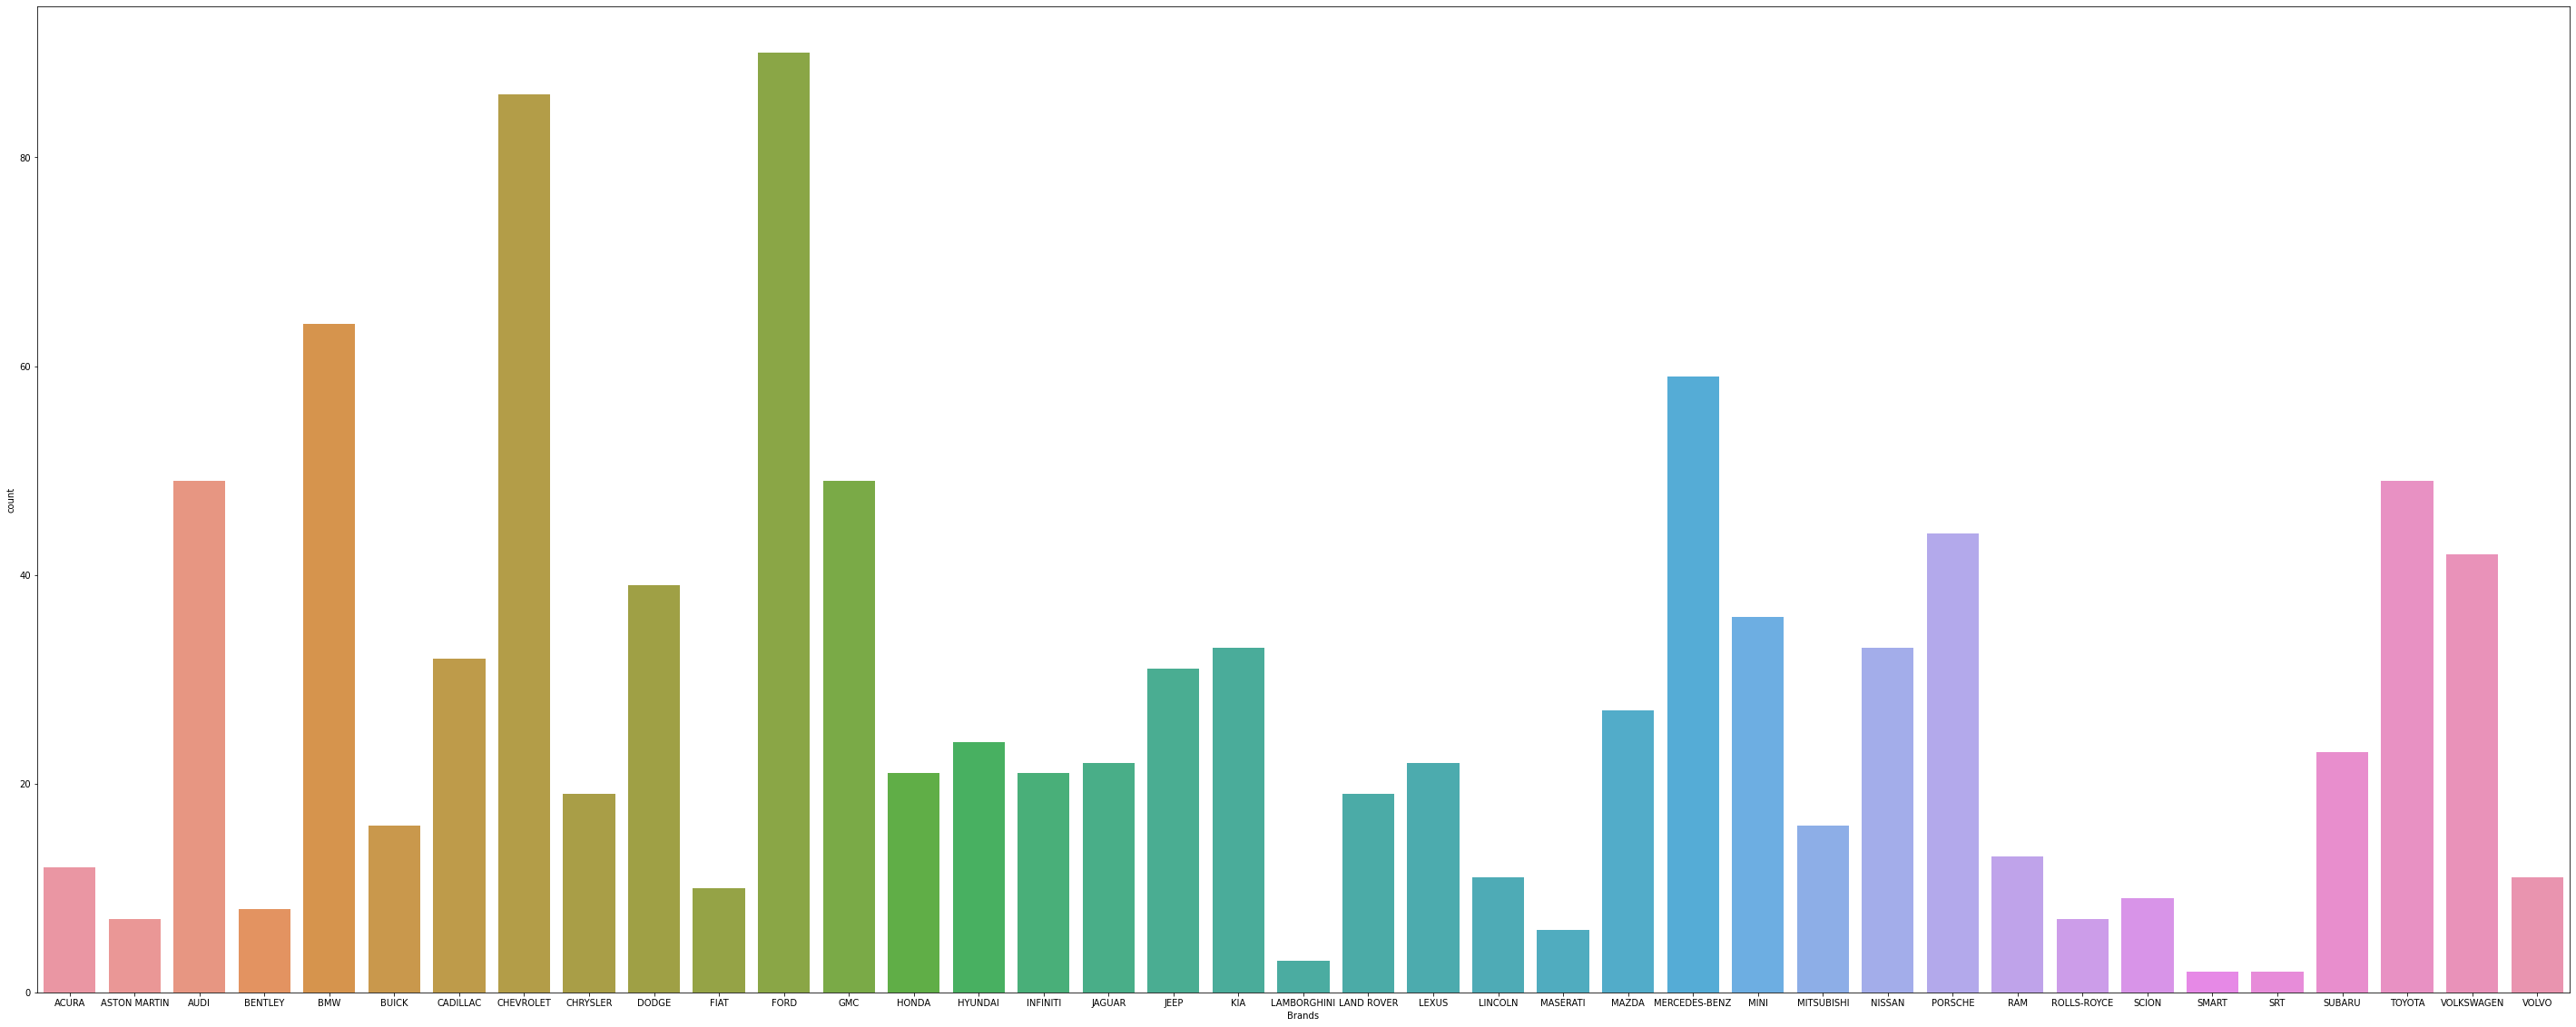

In [41]:
# visualize the number of vehicles of each brand in the data
sns.countplot(x= 'Brands', data=data)

<AxesSubplot:xlabel='Brands', ylabel='CO2EMISSIONS'>

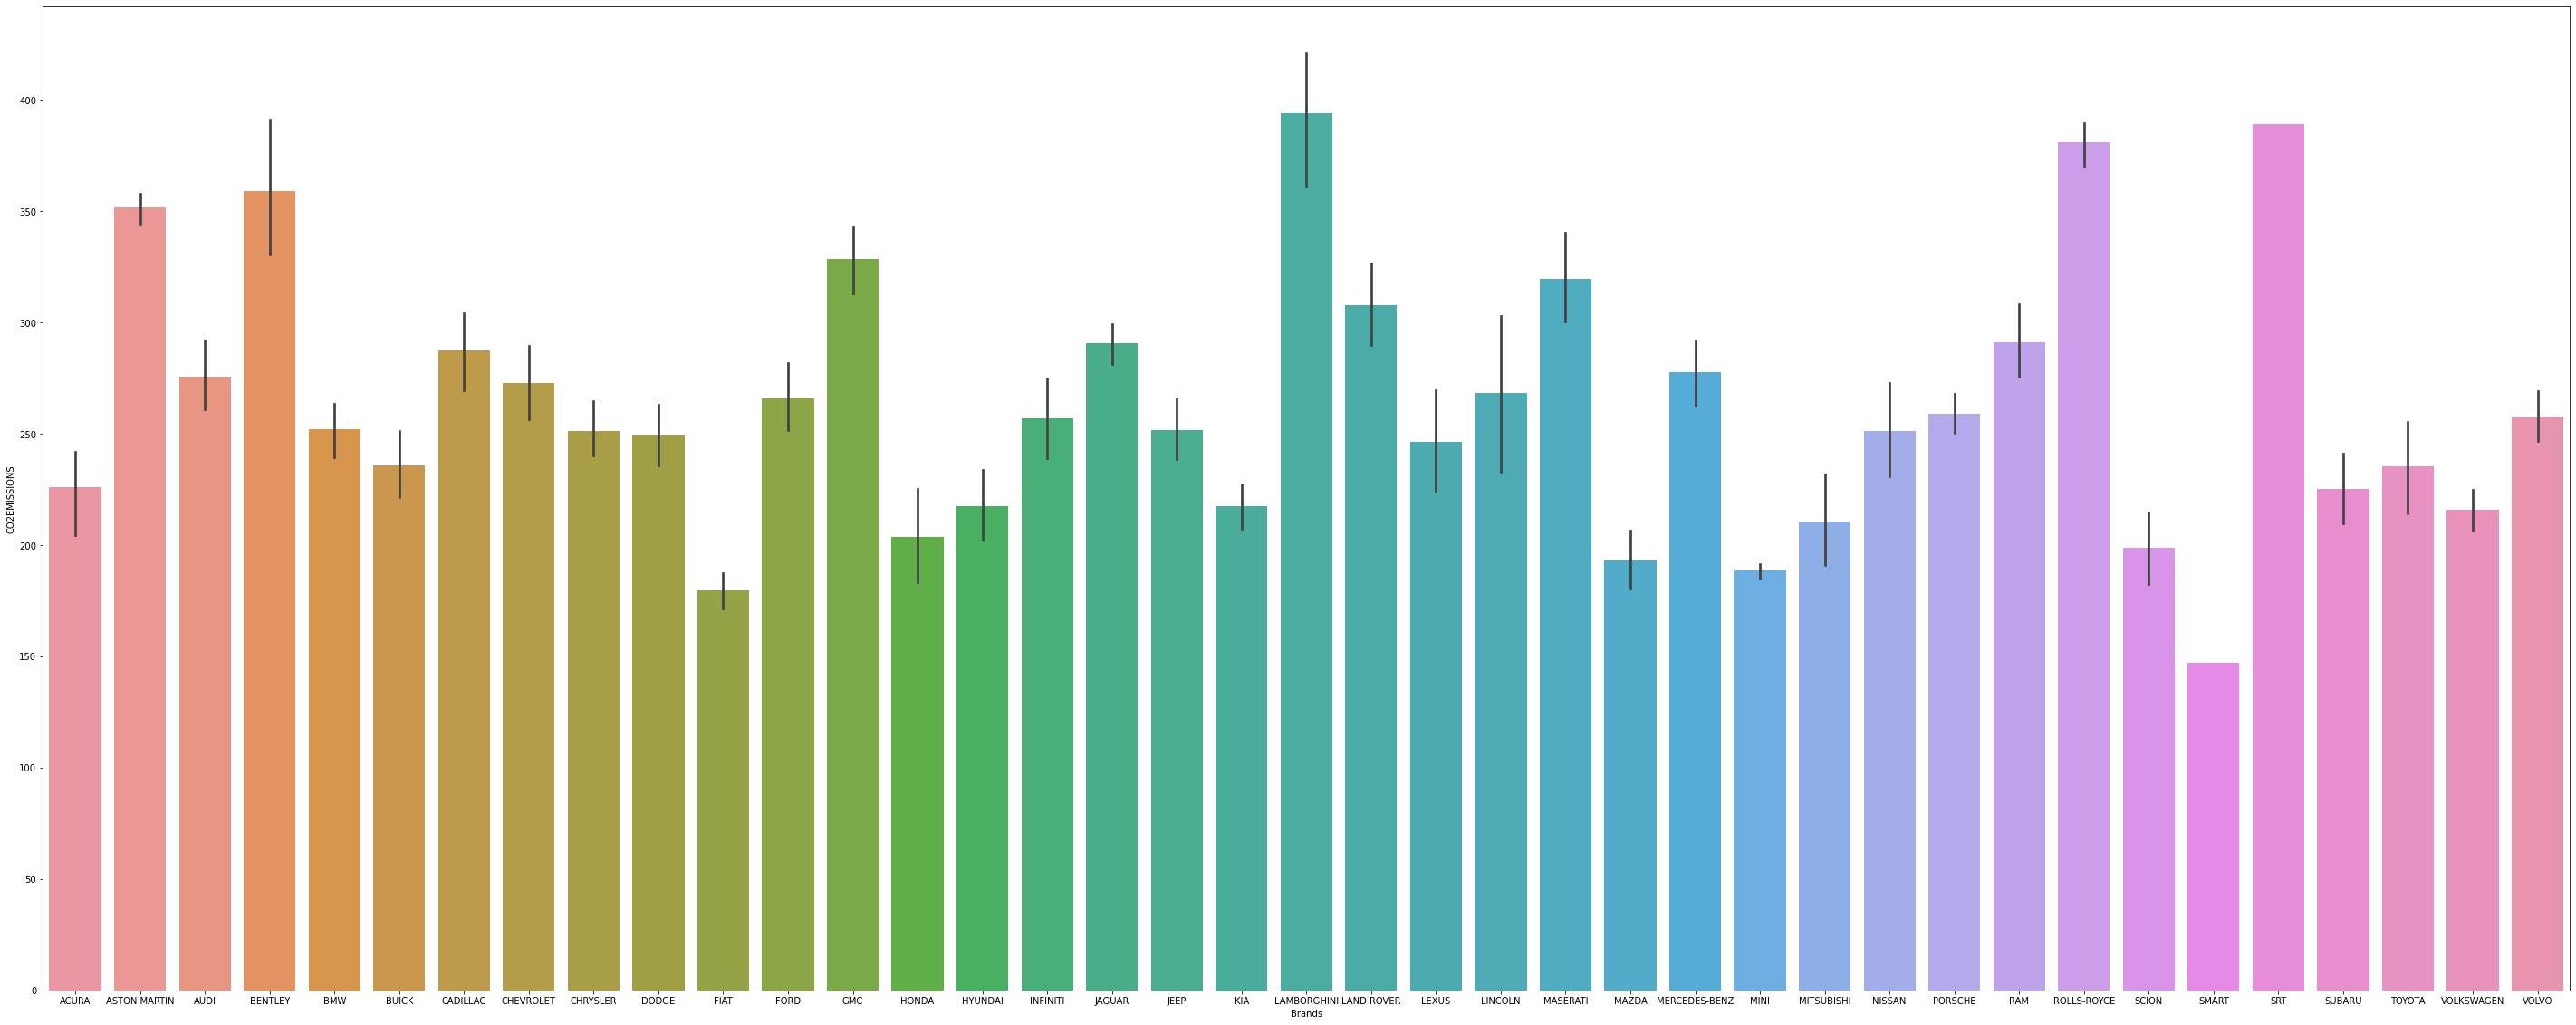

In [42]:
# Check each brand's CO2 emissions
sns.barplot(x='Brands', y='CO2EMISSIONS', data = data)

<AxesSubplot:xlabel='Brands', ylabel='FUELCONSUMPTION_CITY'>

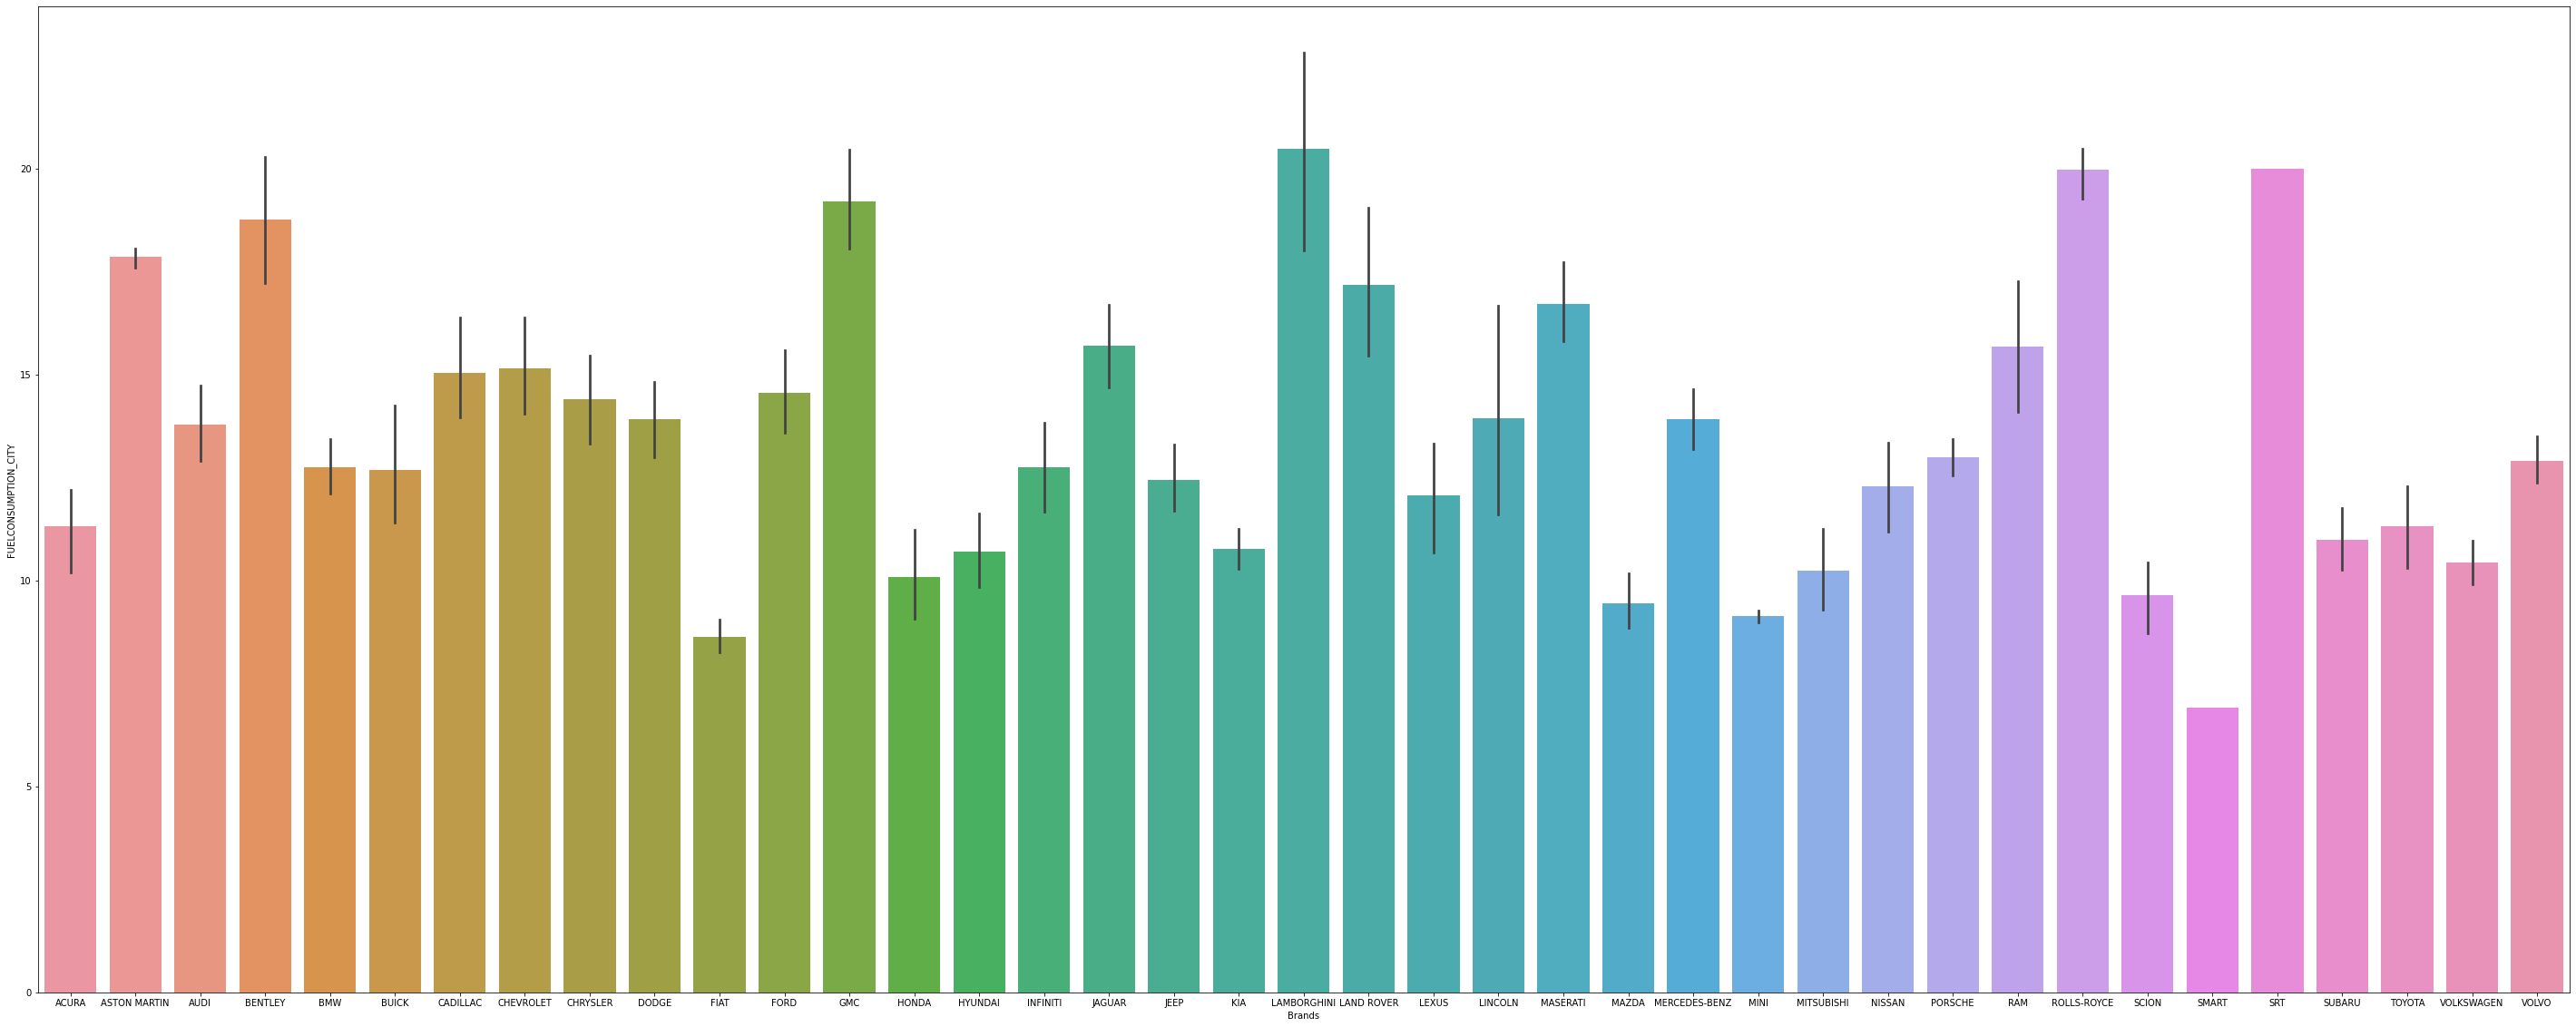

In [43]:
# check each brand's fuel consumption in city
sns.barplot(x='Brands', y='FUELCONSUMPTION_CITY', data = data)

<AxesSubplot:xlabel='Brands', ylabel='FUELCONSUMPTION_HWY'>

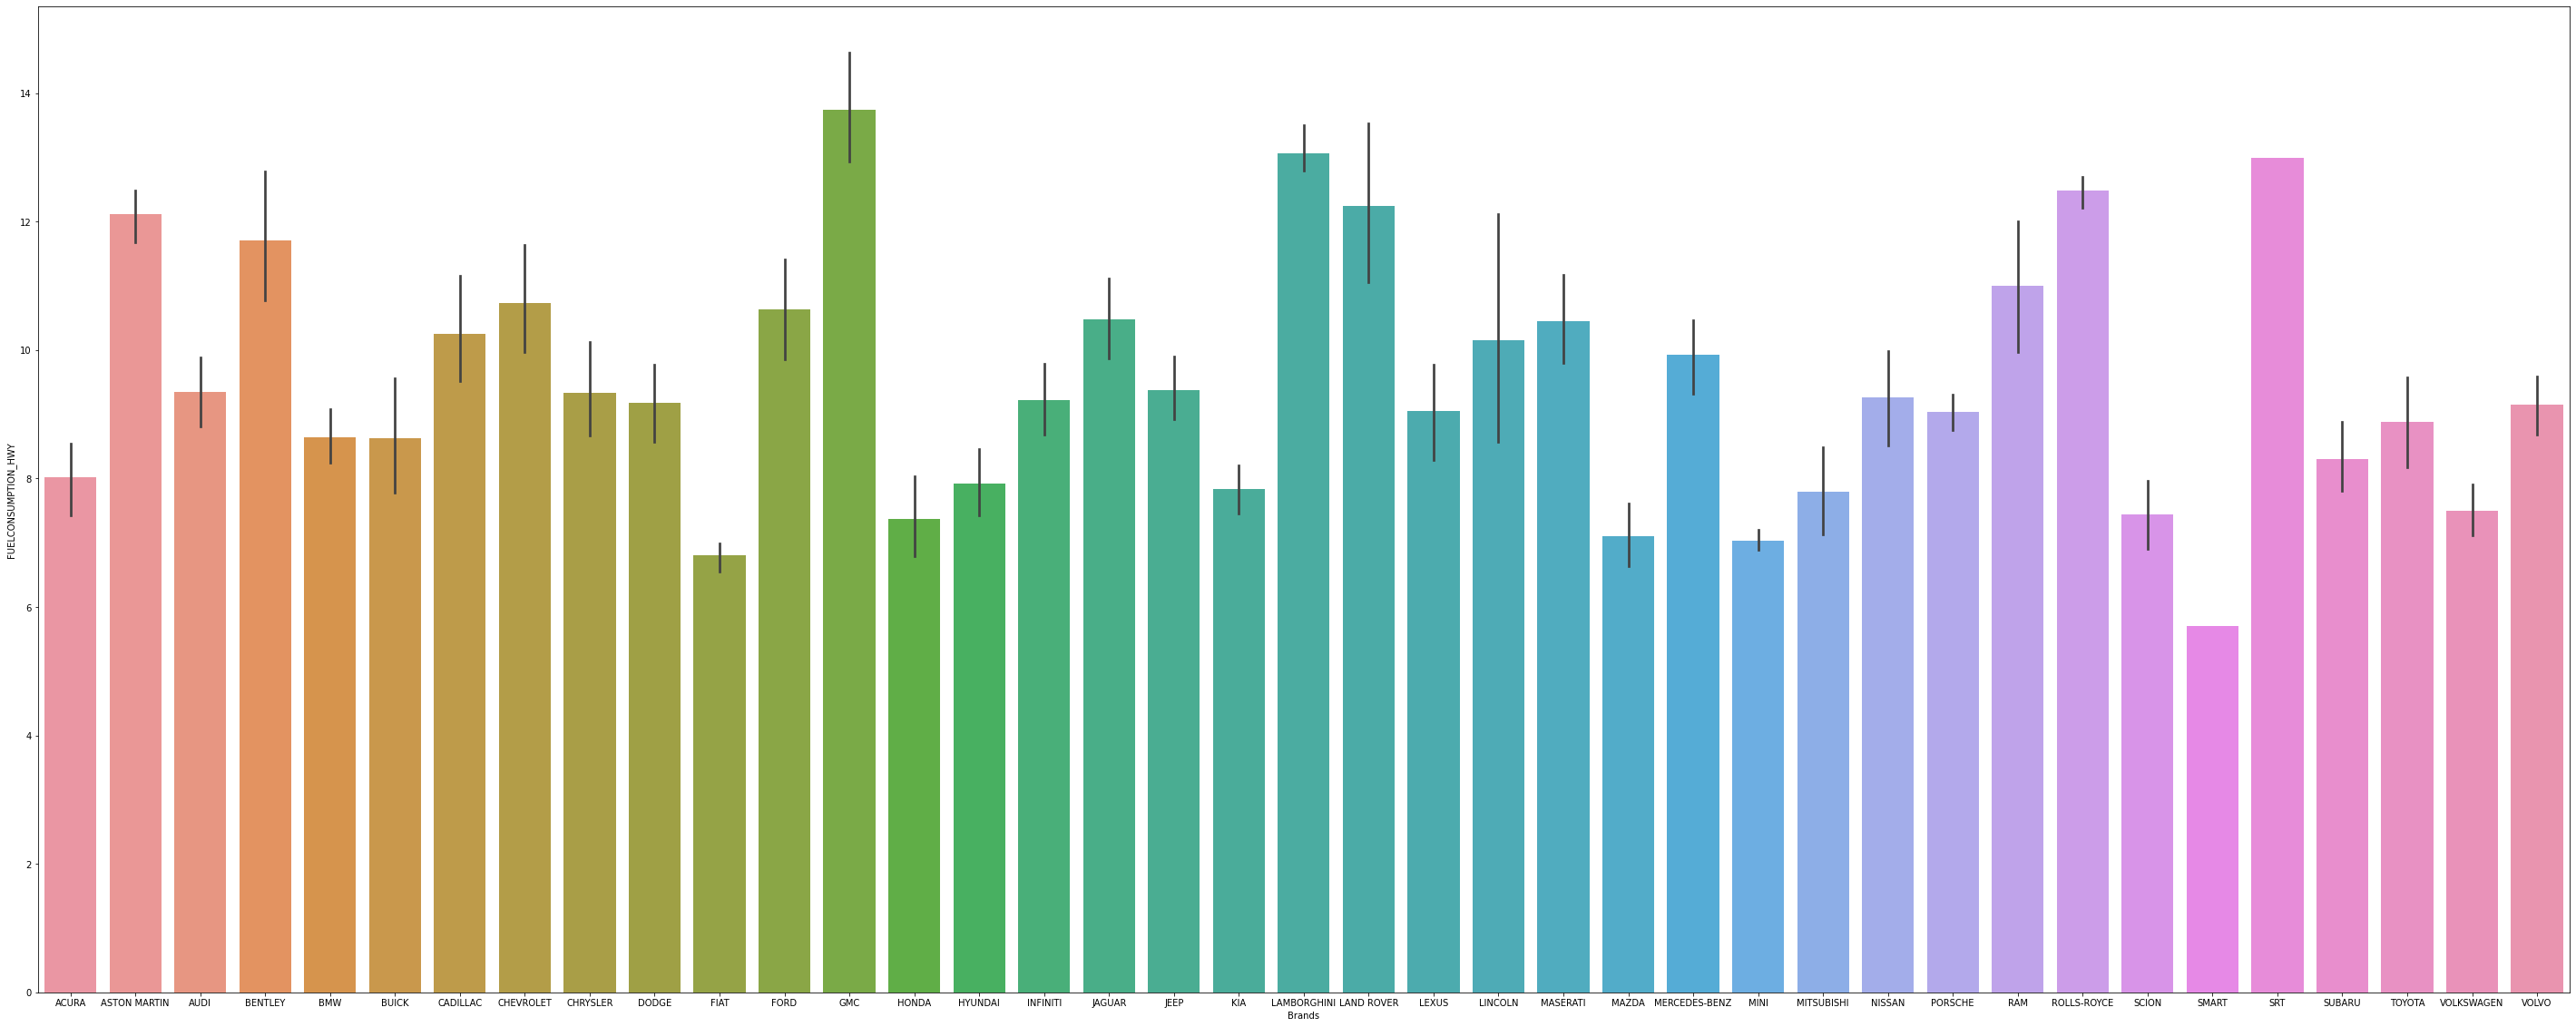

In [44]:
# check each brand's fuel consumption on highway
sns.barplot(x='Brands', y='FUELCONSUMPTION_HWY', data = data)

<AxesSubplot:xlabel='Brands', ylabel='FUELCONSUMPTION_COMB'>

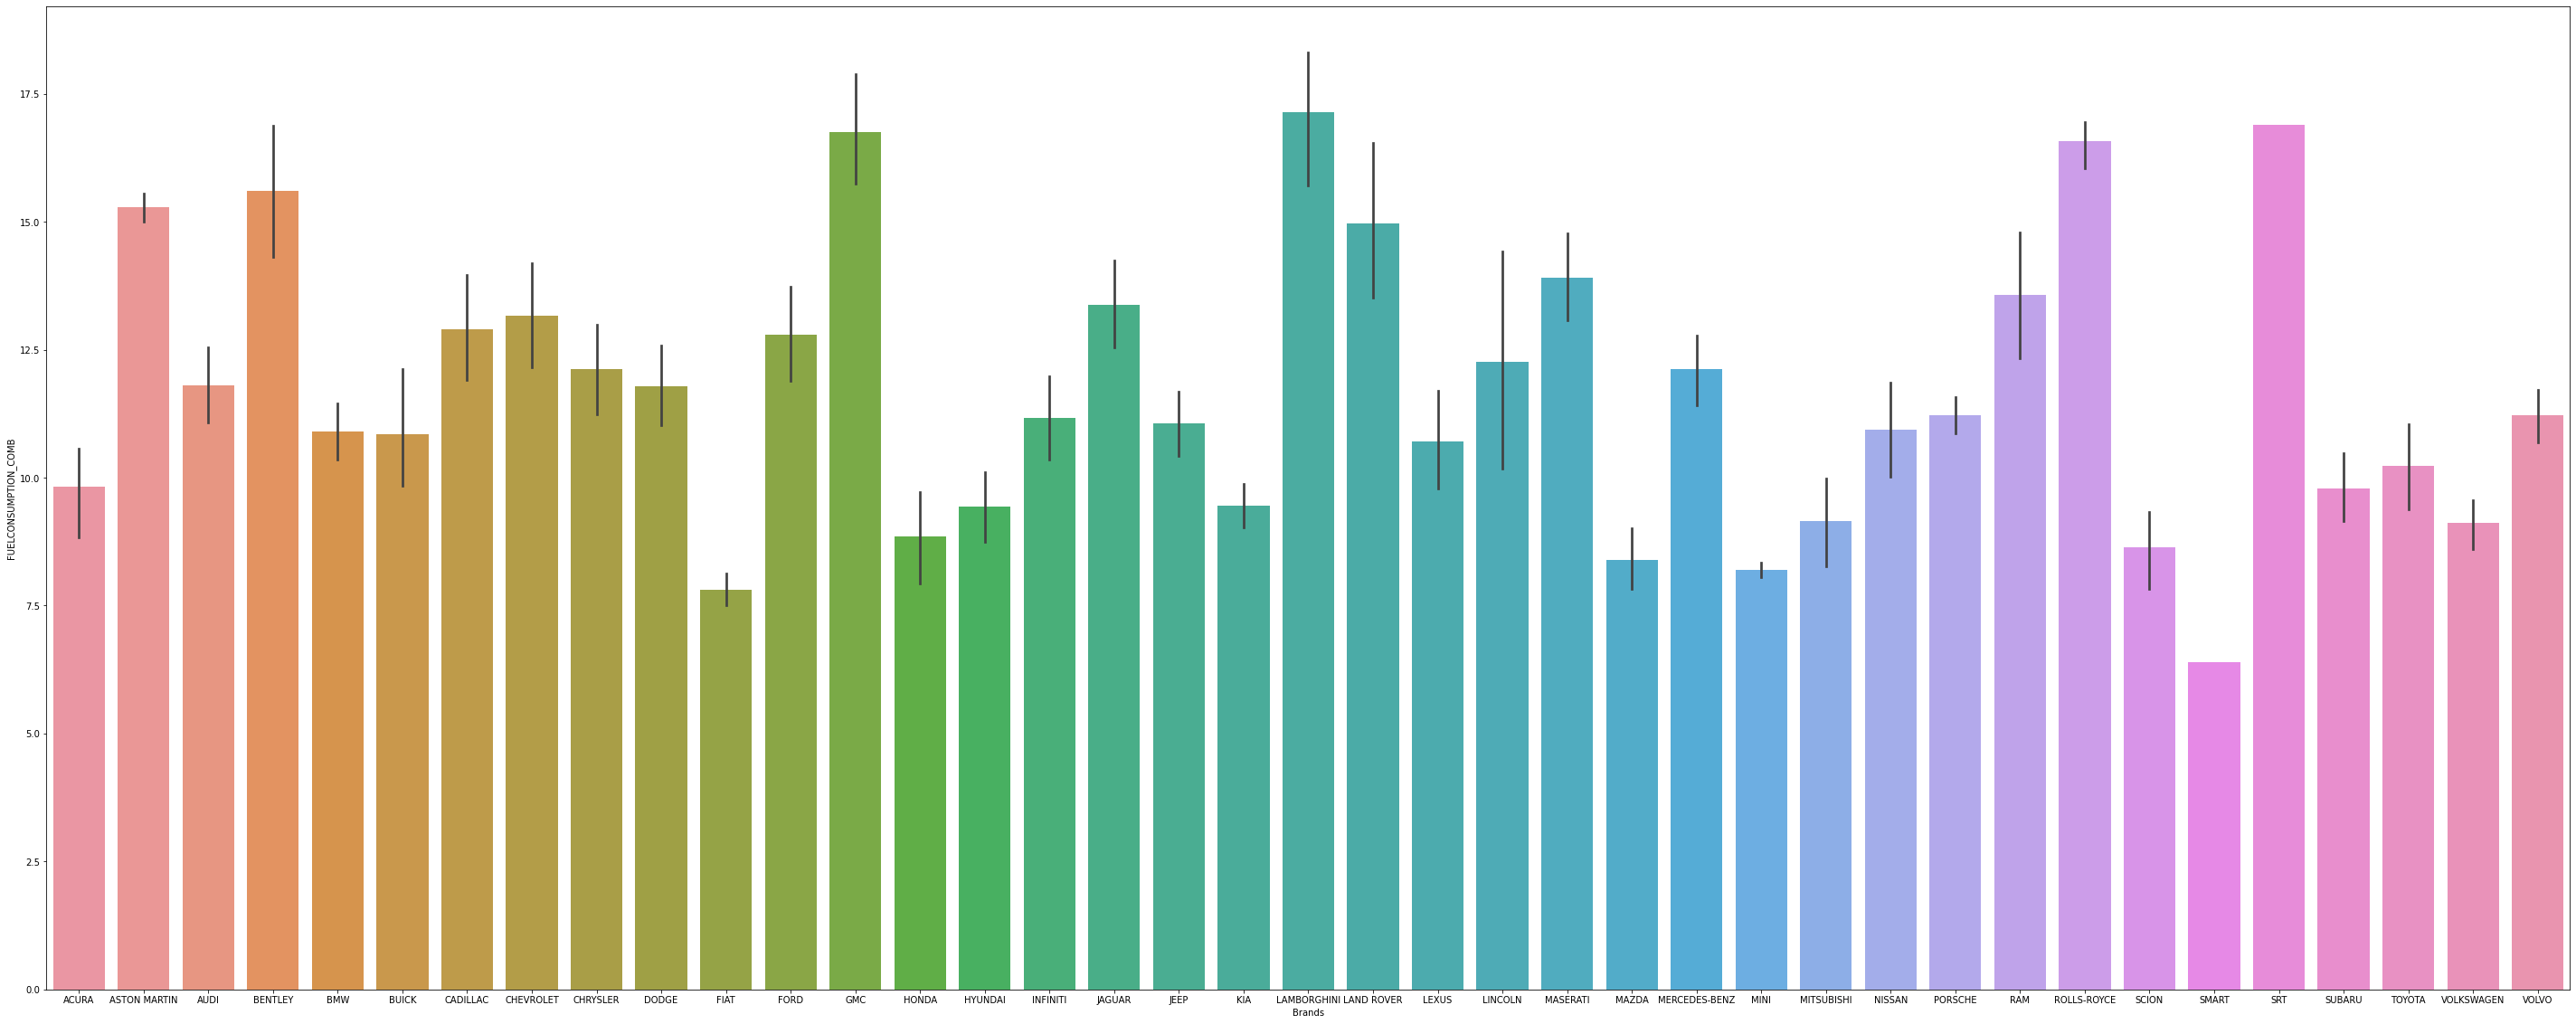

In [45]:
# check a brand's combined fuel consumption
sns.barplot(x='Brands', y='FUELCONSUMPTION_COMB', data = data)

<AxesSubplot:xlabel='Brands', ylabel='FUELCONSUMPTION_COMB_MPG'>

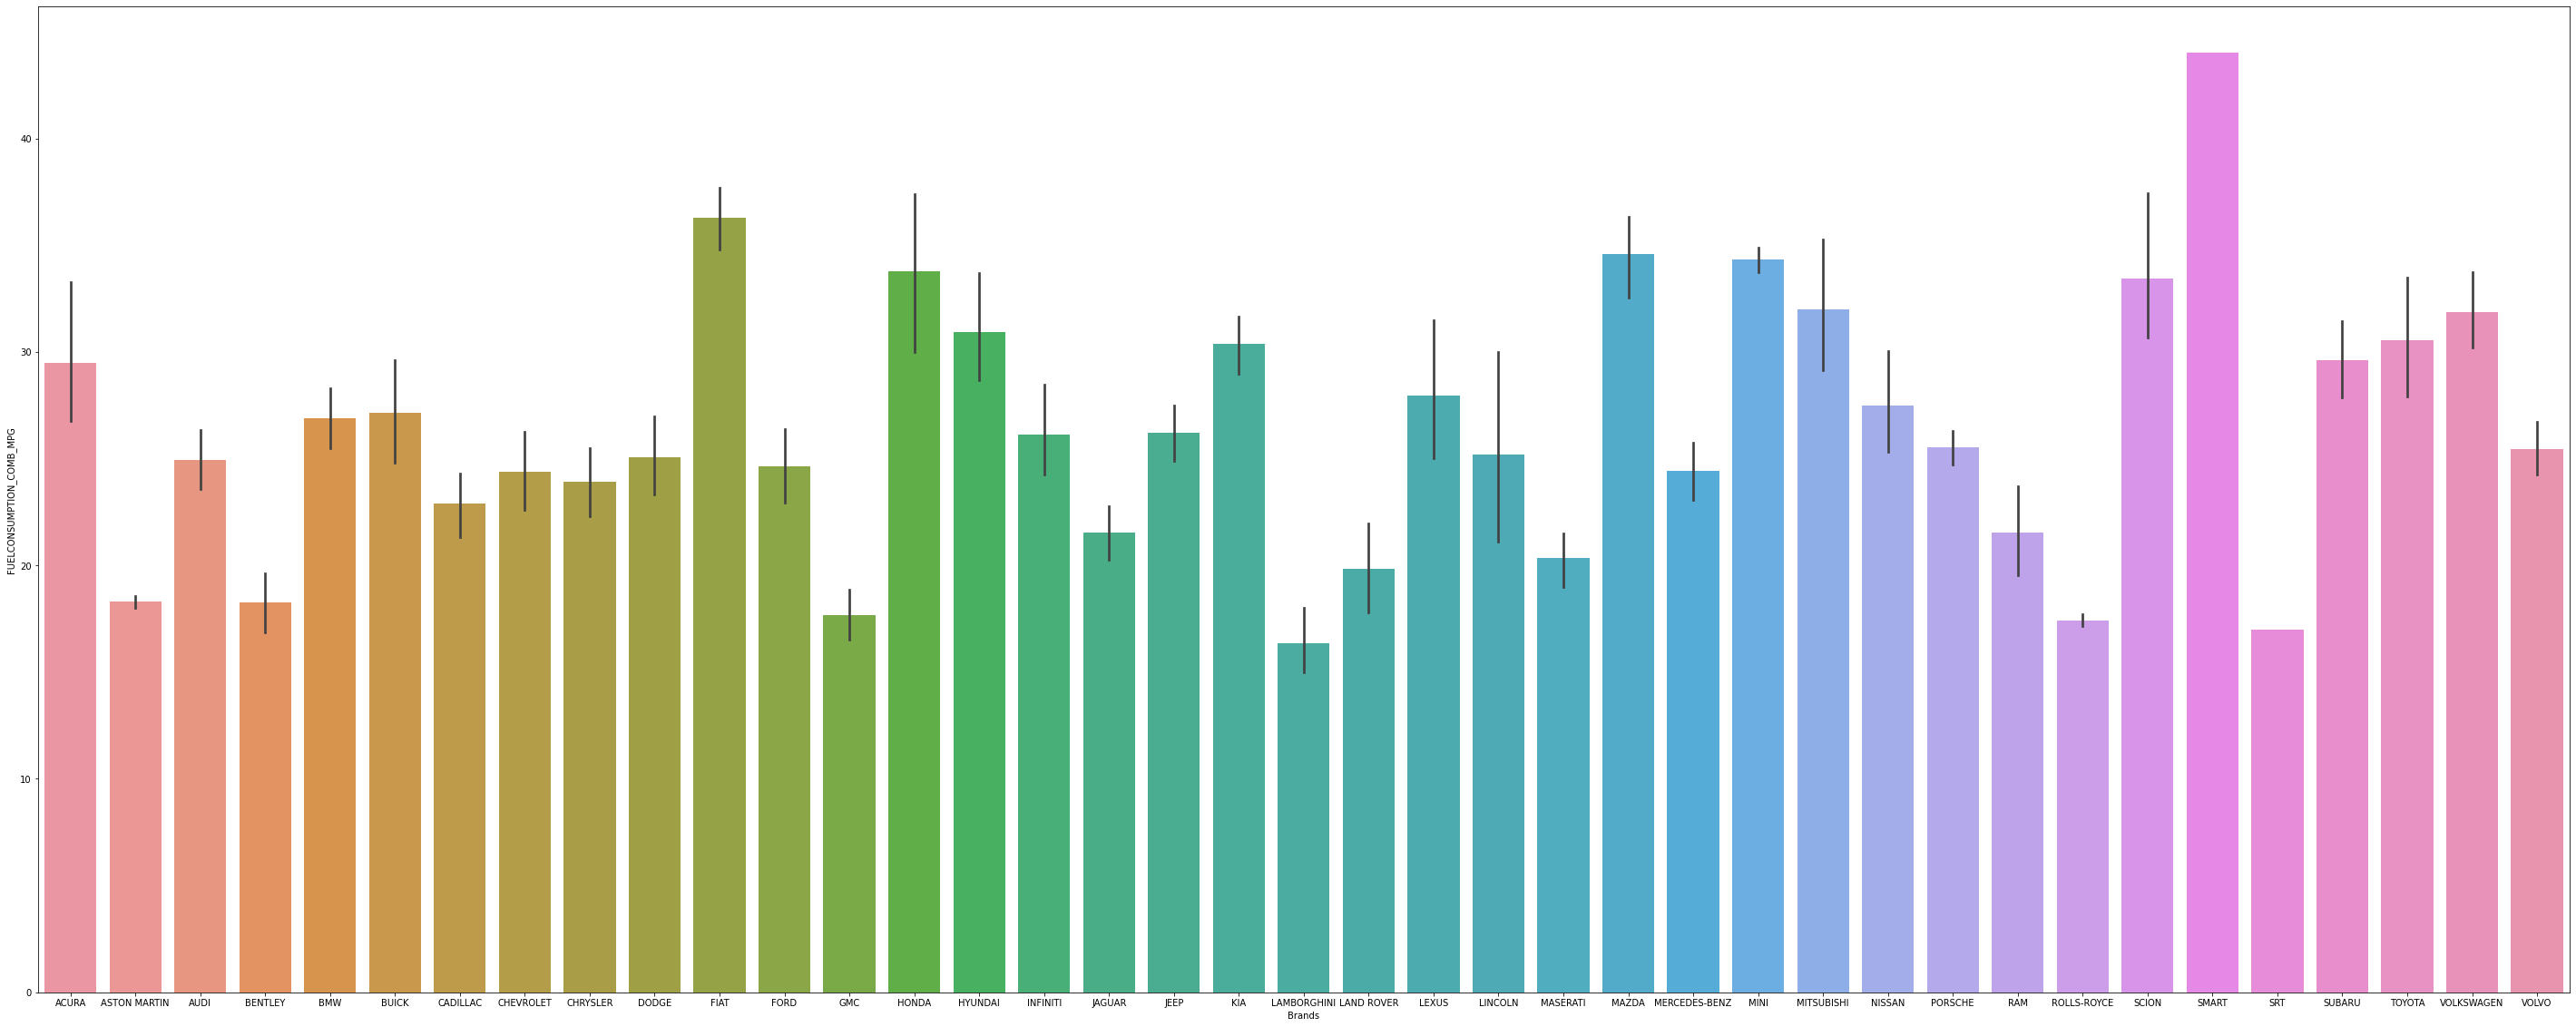

In [46]:
# check a brand's combined fuel consumption
sns.barplot(x='Brands', y='FUELCONSUMPTION_COMB_MPG', data = data)

<AxesSubplot:xlabel='Brands', ylabel='count'>

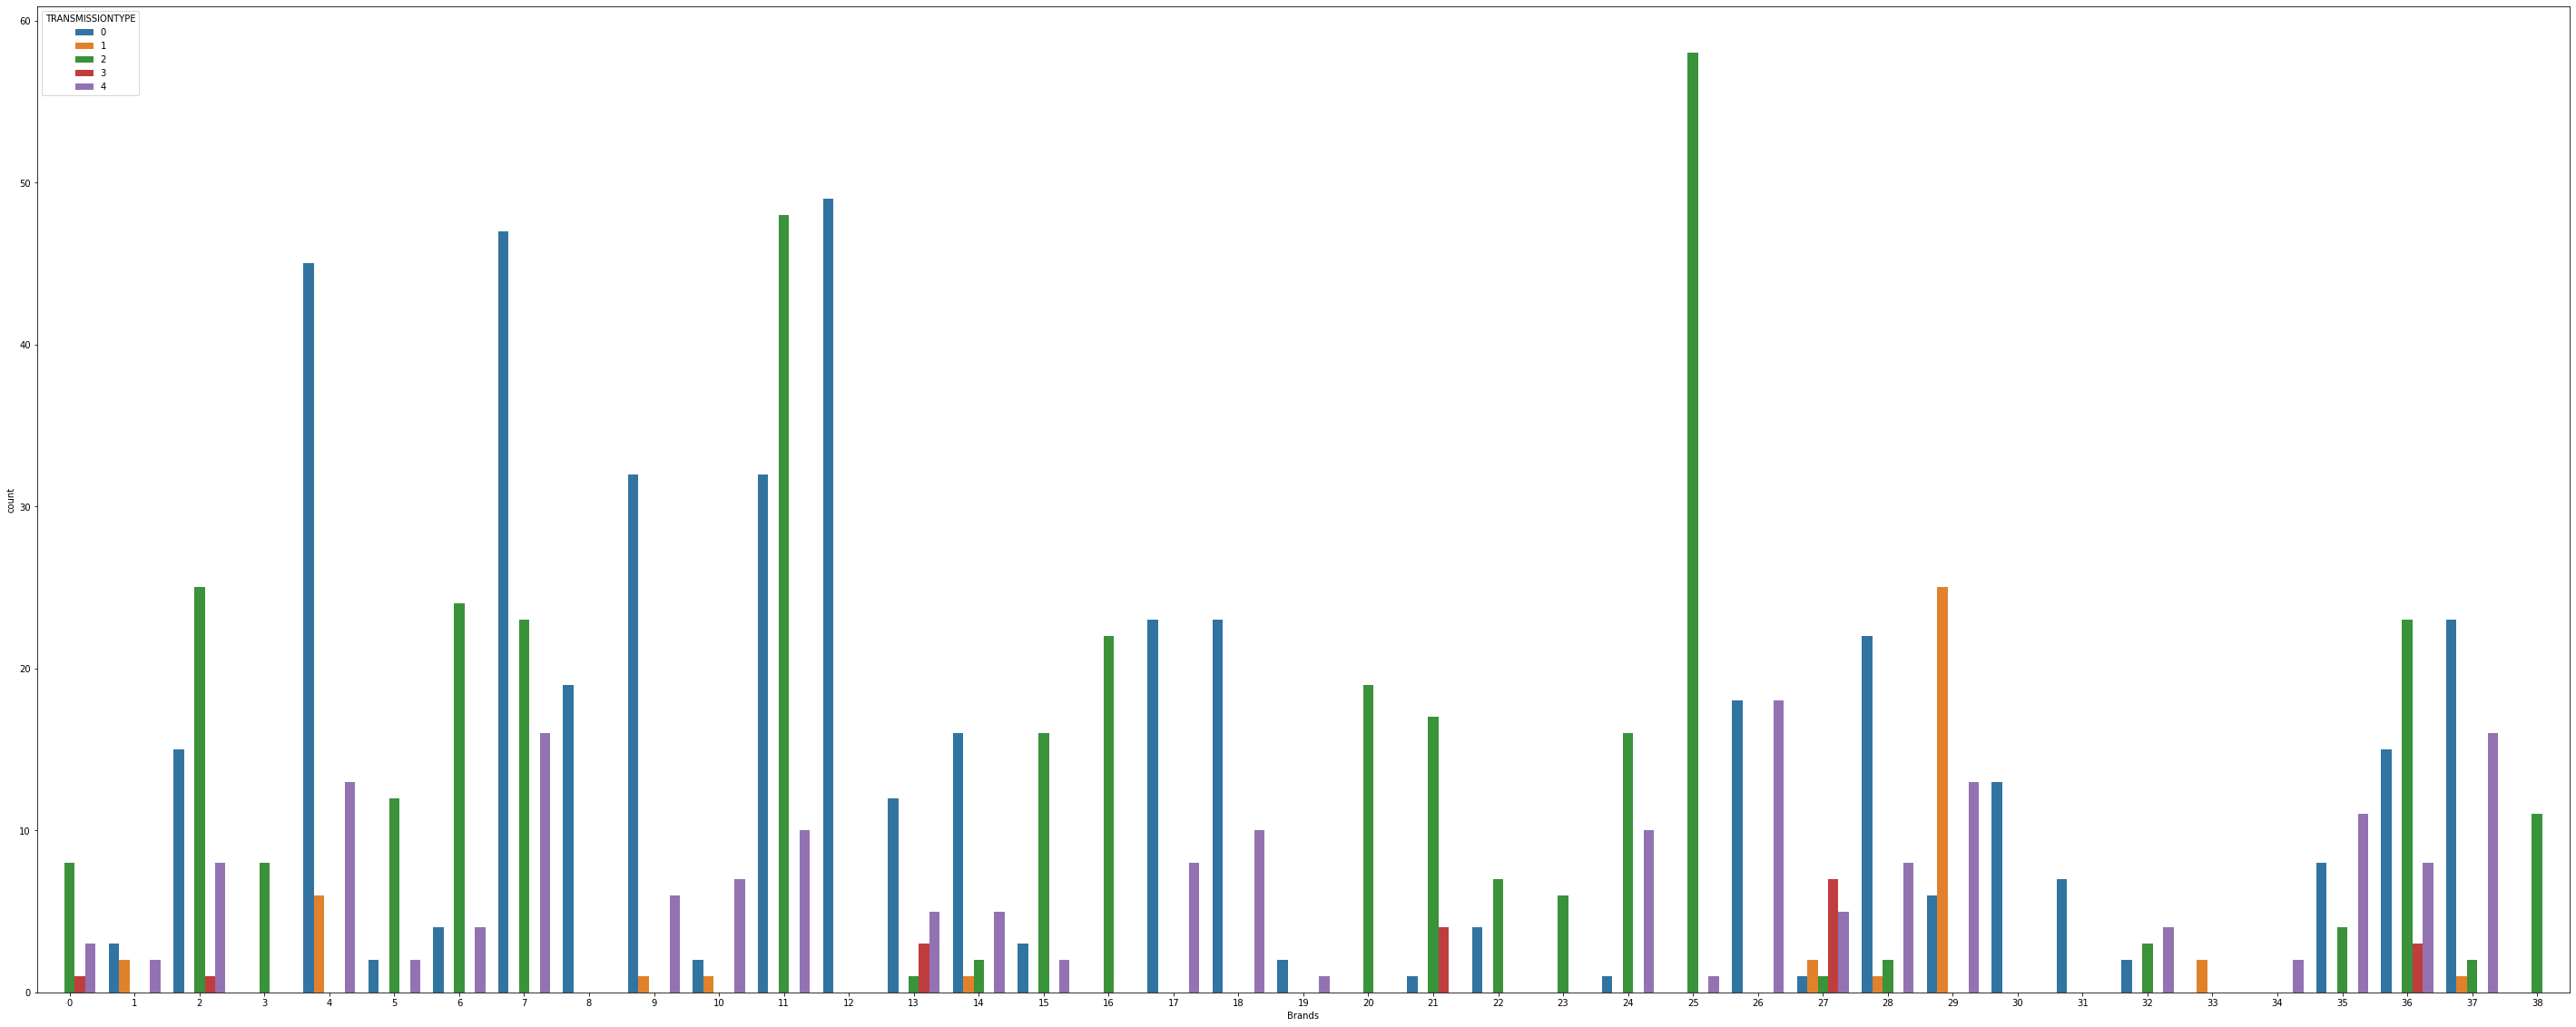

In [47]:
# check types of transmission used by each brand
sns.countplot(x='Brands', hue='TRANSMISSIONTYPE', data = dataE)

<AxesSubplot:xlabel='Brands', ylabel='count'>

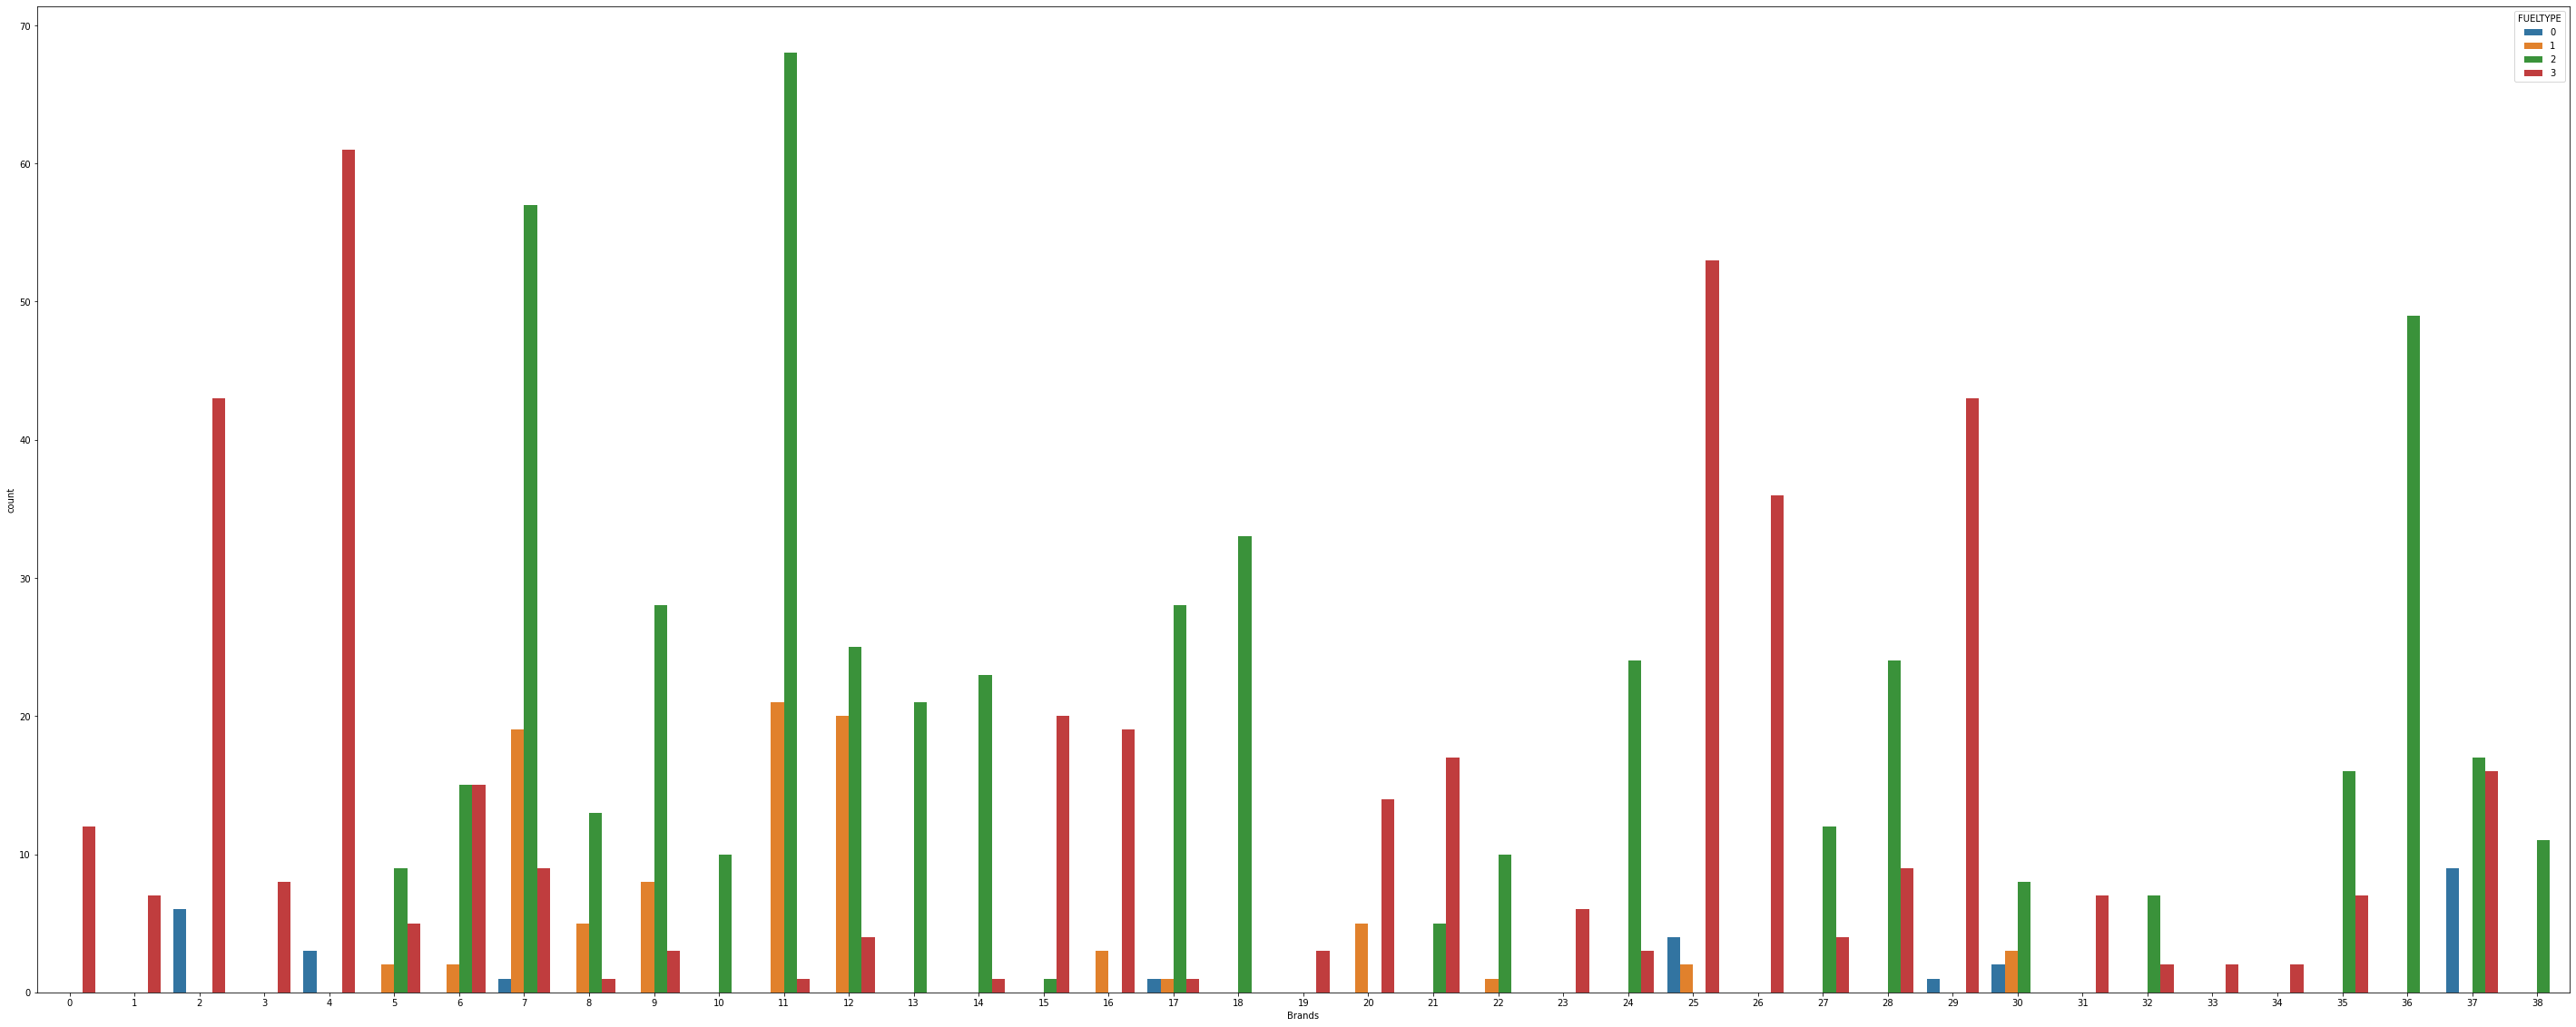

In [48]:
# check types of transmission used by each brand
sns.countplot(x='Brands', hue='FUELTYPE', data = dataE)

## Vehicle Class

In [49]:
# group data by vehicle class
byVC = data.groupby('VEHICLECLASS')

In [50]:
# display transposed description of data grouped by vehicle class
byVC.describe().T

VEHICLECLASS                        COMPACT    FULL_SIZE     MID_SIZE  \
MODELYEAR                count   172.000000    86.000000   178.000000   
                         mean   2014.000000  2014.000000  2014.000000   
                         std       0.000000     0.000000     0.000000   
                         min    2014.000000  2014.000000  2014.000000   
                         25%    2014.000000  2014.000000  2014.000000   
                         50%    2014.000000  2014.000000  2014.000000   
                         75%    2014.000000  2014.000000  2014.000000   
                         max    2014.000000  2014.000000  2014.000000   
ENGINESIZE               count   172.000000    86.000000   178.000000   
                         mean      2.518023     3.931395     3.017978   
                         std       1.183201     1.253631     1.277936   
                         min       1.200000     1.600000     1.400000   
                         25%       1.800000     3.000000     2.000000   
                         50%       2.000000     3.600000     2.500000   
                         75%       3.000000     4.800000     3.600000   
                         max       6.700000     6.700000     6.800000   
CYLINDERS                count   172.000000    86.000000   178.000000   
                         mean      4.848837     6.767442     5.359551   
                         std       1.518058     1.920015     1.648469   
                         min       3.000000     4.000000     4.000000   
                         25%       4.000000     6.000000     4.000000   
                         50%       4.000000     6.000000     4.000000   
                         75%       6.000000     8.000000     6.000000   
                         max      12.000000    12.000000    12.000000   
FUELCONSUMPTION_CITY     count   172.000000    86.000000   178.000000   
                         mean     10.915698    14.374419    11.535393   
                         std       2.764507     2.845148     3.263033   
                         min       4.600000     5.600000     4.700000   
                         25%       9.050000    12.625000     9.300000   
                         50%      10.400000    14.250000    11.200000   
                         75%      11.900000    15.875000    13.200000   
                         max      20.700000    20.700000    22.300000   
FUELCONSUMPTION_HWY      count   172.000000    86.000000   178.000000   
                         mean      7.793605     9.440698     7.981461   
                         std       1.602051     1.638965     1.901395   
                         min       4.900000     6.400000     4.900000   
                         25%       6.700000     8.600000     6.500000   
                         50%       7.500000     9.400000     7.600000   
                         75%       8.325000    10.200000     9.100000   
                         max      12.900000    13.600000    14.900000   
FUELCONSUMPTION_COMB     count   172.000000    86.000000   178.000000   
                         mean      9.509884    12.159302     9.942697   
                         std       2.218915     2.284339     2.622992   
                         min       4.700000     6.000000     4.800000   
                         25%       8.000000    10.750000     8.025000   
                         50%       9.050000    12.050000     9.600000   
                         75%      10.400000    13.300000    11.400000   
                         max      17.100000    17.500000    19.000000   
FUELCONSUMPTION_COMB_MPG count   172.000000    86.000000   178.000000   
                         mean     31.145349    24.023256    30.331461   
                         std       6.823320     4.898924     7.851533   
                         min      17.000000    16.000000    15.000000   
                         25%      27.000000    21.000000    25.000000   
                         50%      31.000000    23.500000  

In [51]:
# Check the number of vehicles of each vehicle class in the data
data['VEHICLECLASS'].value_counts()

MID_SIZE                   178
COMPACT                    172
SUV_SMALL                  154
SUV_STANDARD               110
FULL_SIZE                   86
TWO-SEATER                  71
SUBCOMPACT                  65
PICKUP TRUCK_STANDARD       62
MINICOMPACT                 47
STATION_WAGON_SMALL         36
VAN_PASSENGER               25
VAN_CARGO                   22
MINIVAN                     14
PICKUP_TRUCK_SMALL          12
SPECIAL_PURPOSE_VEHICLE      7
STATION_WAGON_MID_SIZE       6
Name: VEHICLECLASS, dtype: int64

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='count'>

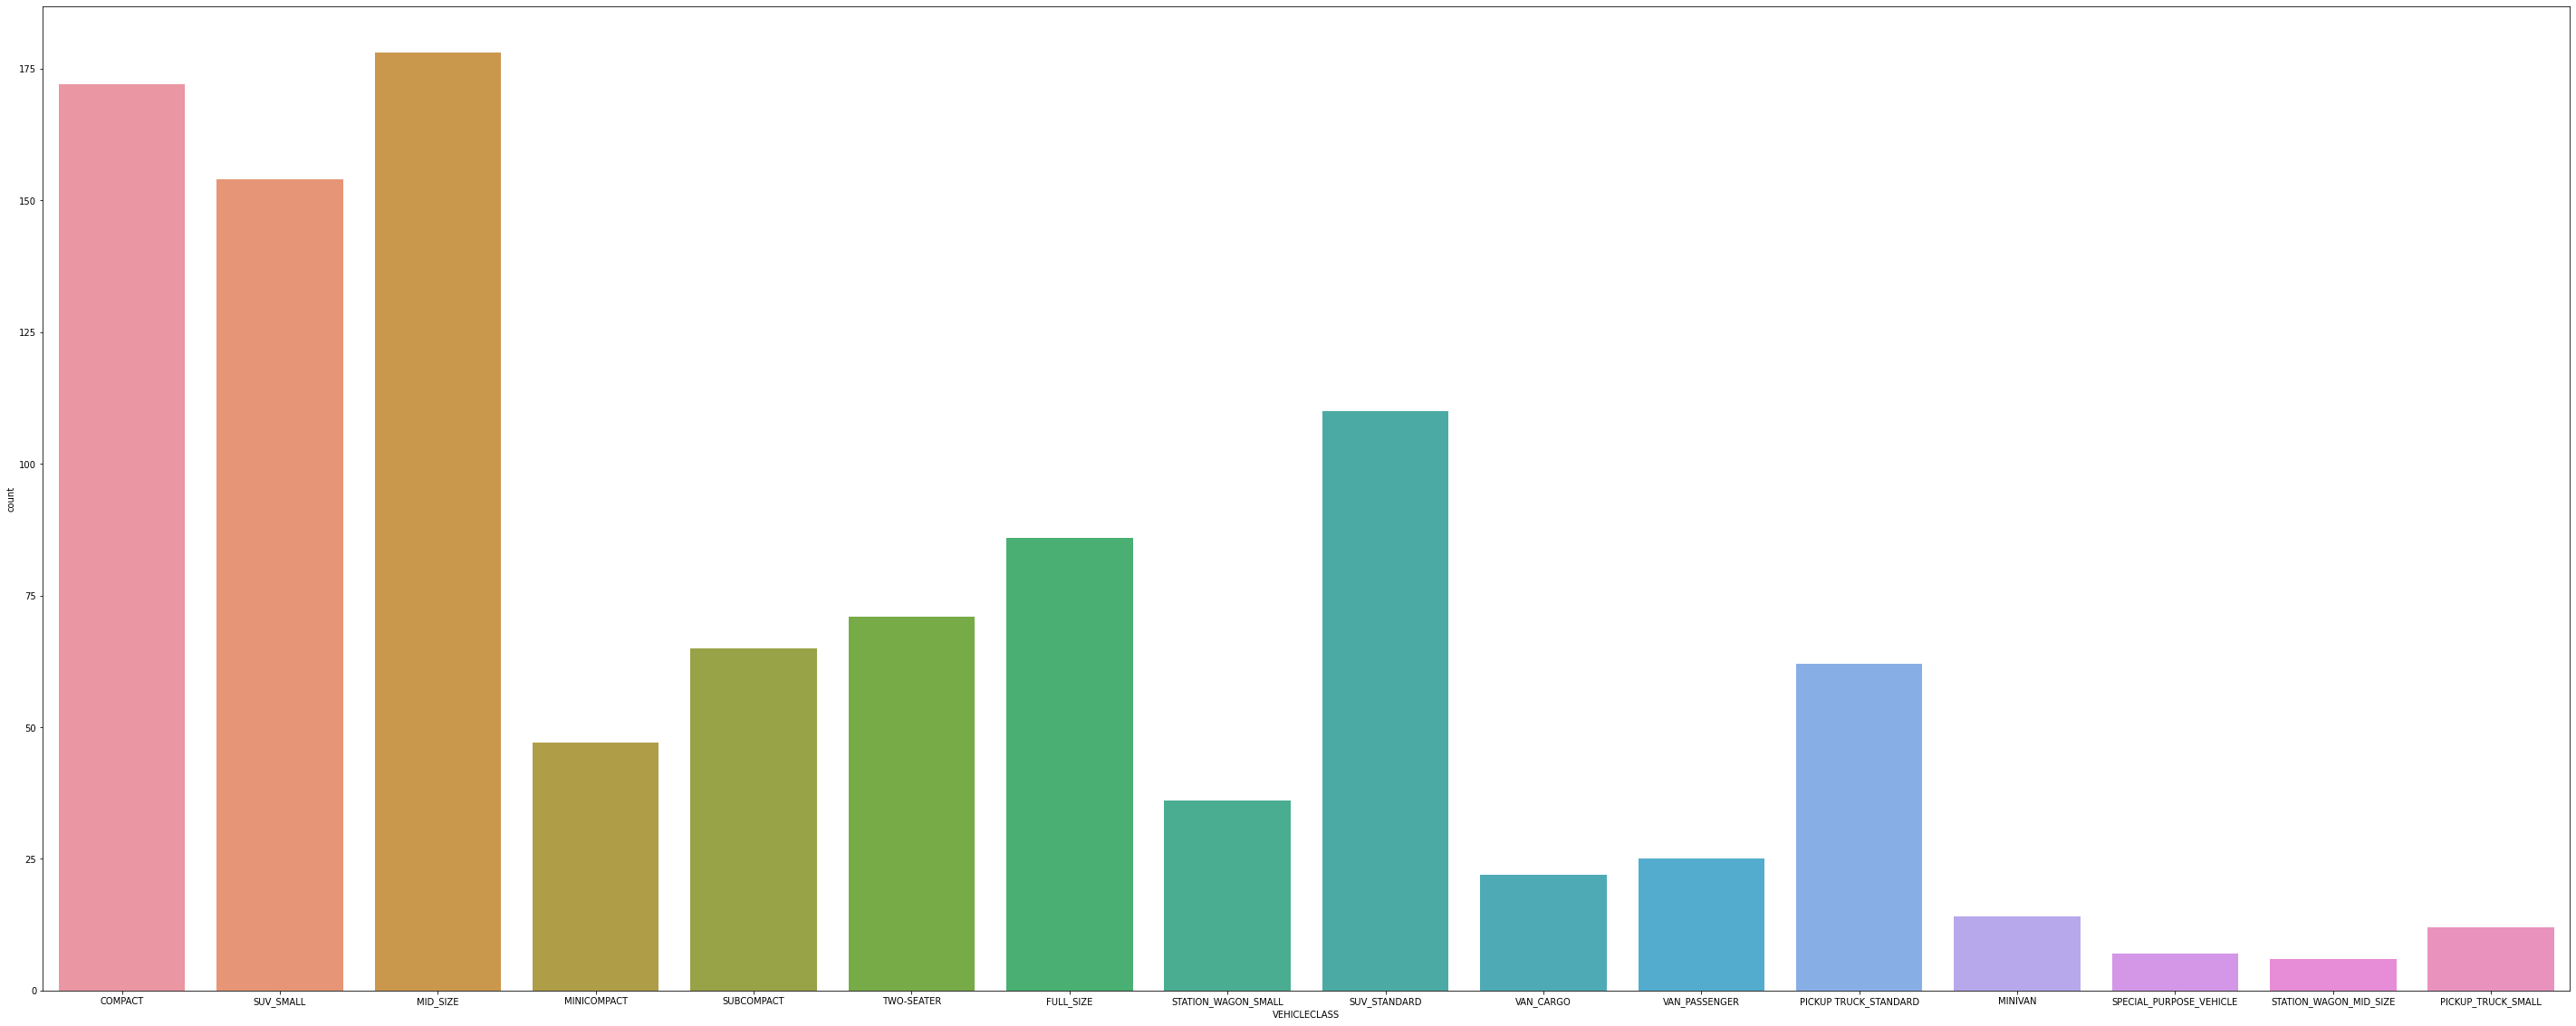

In [52]:
# visualize the number of vehicles of each vehicle class in the data
sns.countplot(x= 'VEHICLECLASS', data=data)

In [53]:
plt.rcParams['figure.figsize'] = [50, 20]

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='CO2EMISSIONS'>

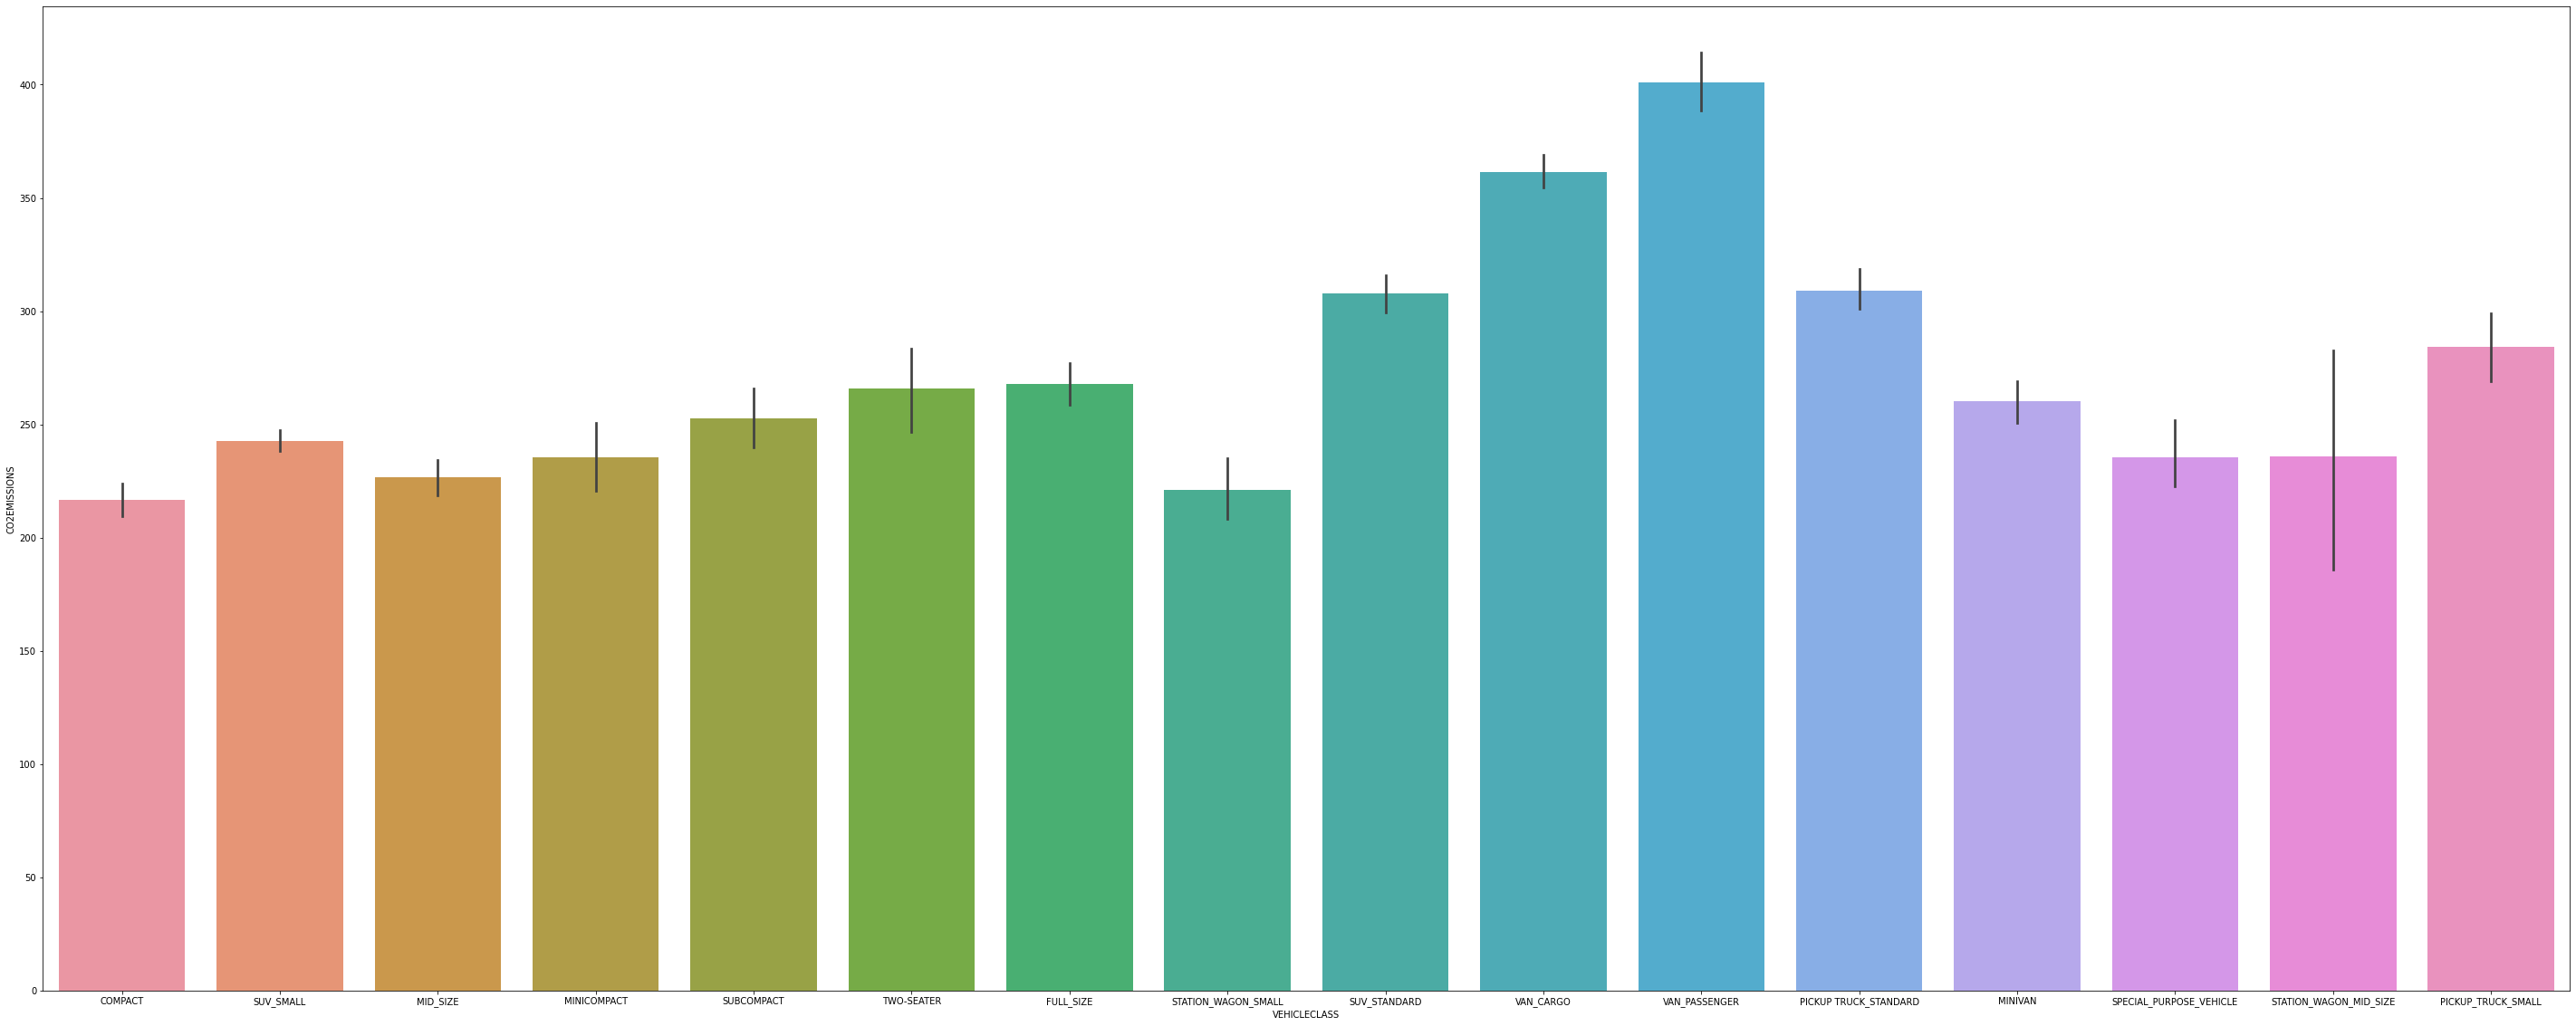

In [54]:
# check each vehicle class' CO2 emissions
sns.barplot(x='VEHICLECLASS', y='CO2EMISSIONS', data = data)

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='FUELCONSUMPTION_CITY'>

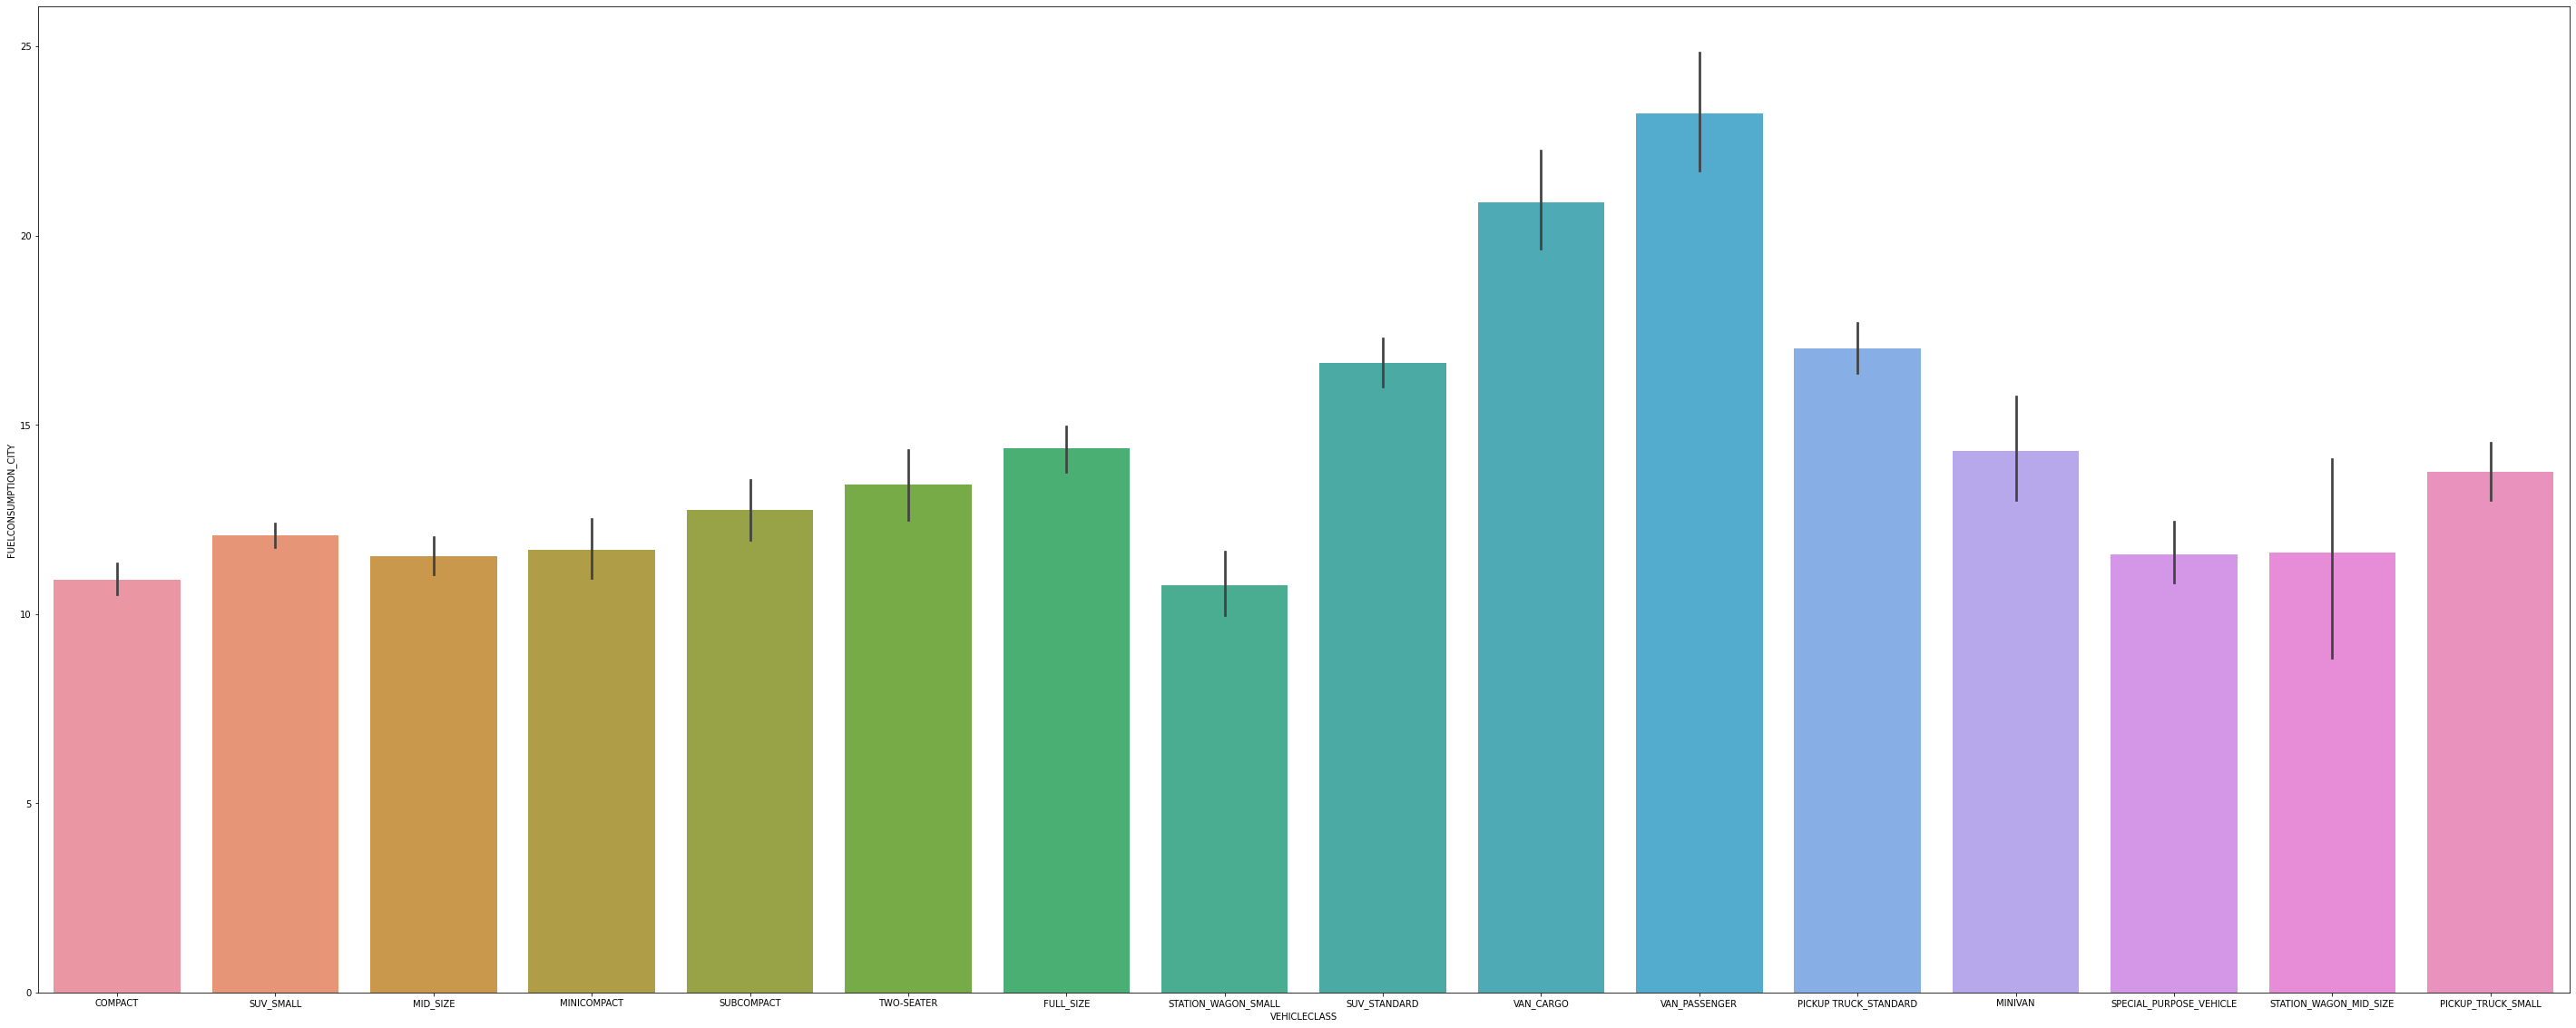

In [55]:
# check each vehicle class' fuel consumption in city
sns.barplot(x='VEHICLECLASS', y='FUELCONSUMPTION_CITY', data = data)

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='FUELCONSUMPTION_HWY'>

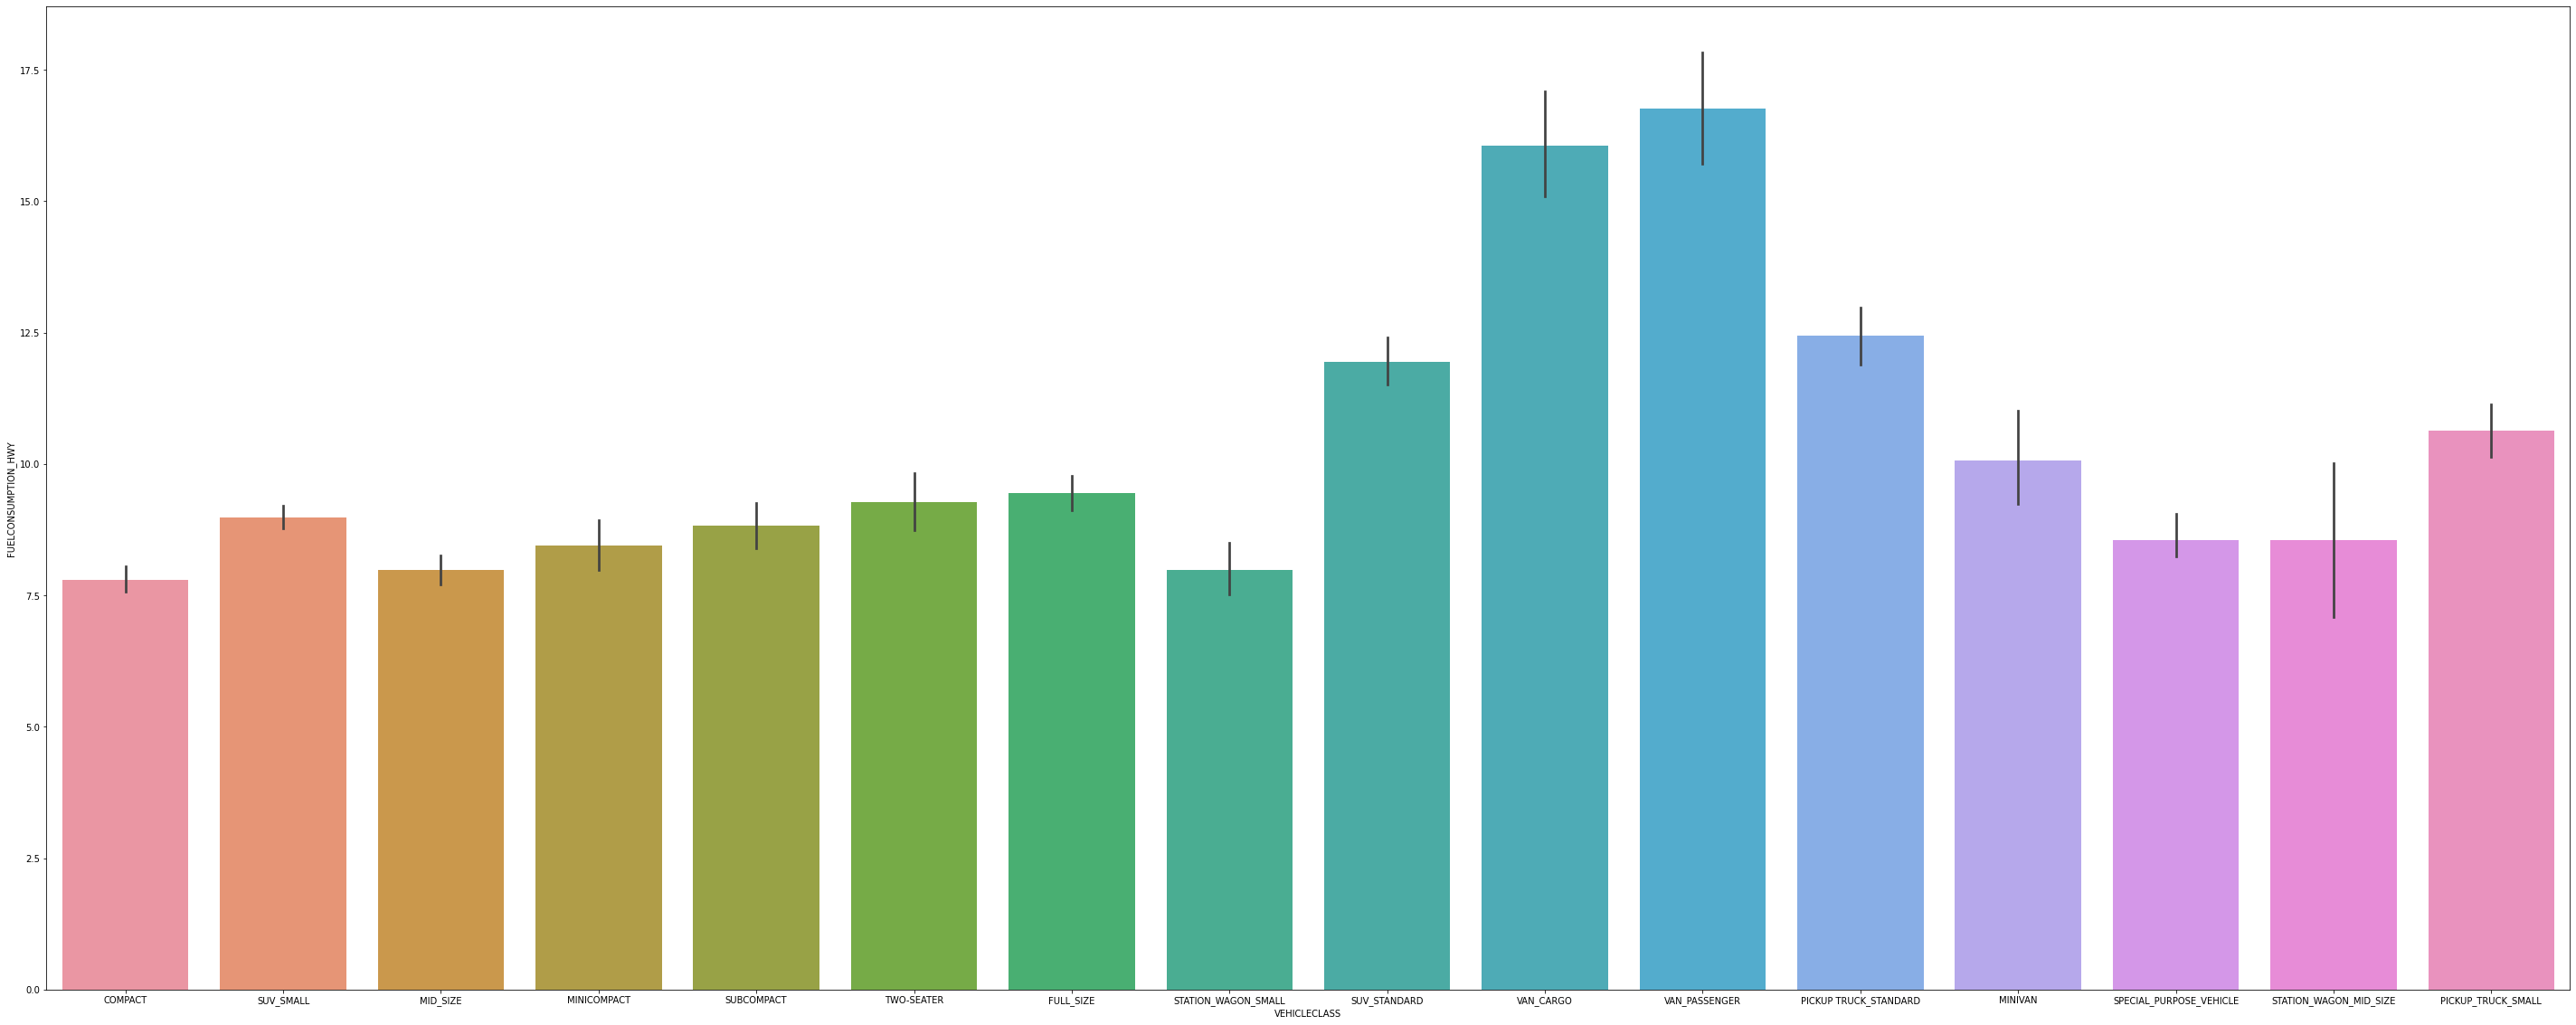

In [56]:
# check each vehicle class' fuel consumption on highway
sns.barplot(x='VEHICLECLASS', y='FUELCONSUMPTION_HWY', data = data)

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='FUELCONSUMPTION_COMB'>

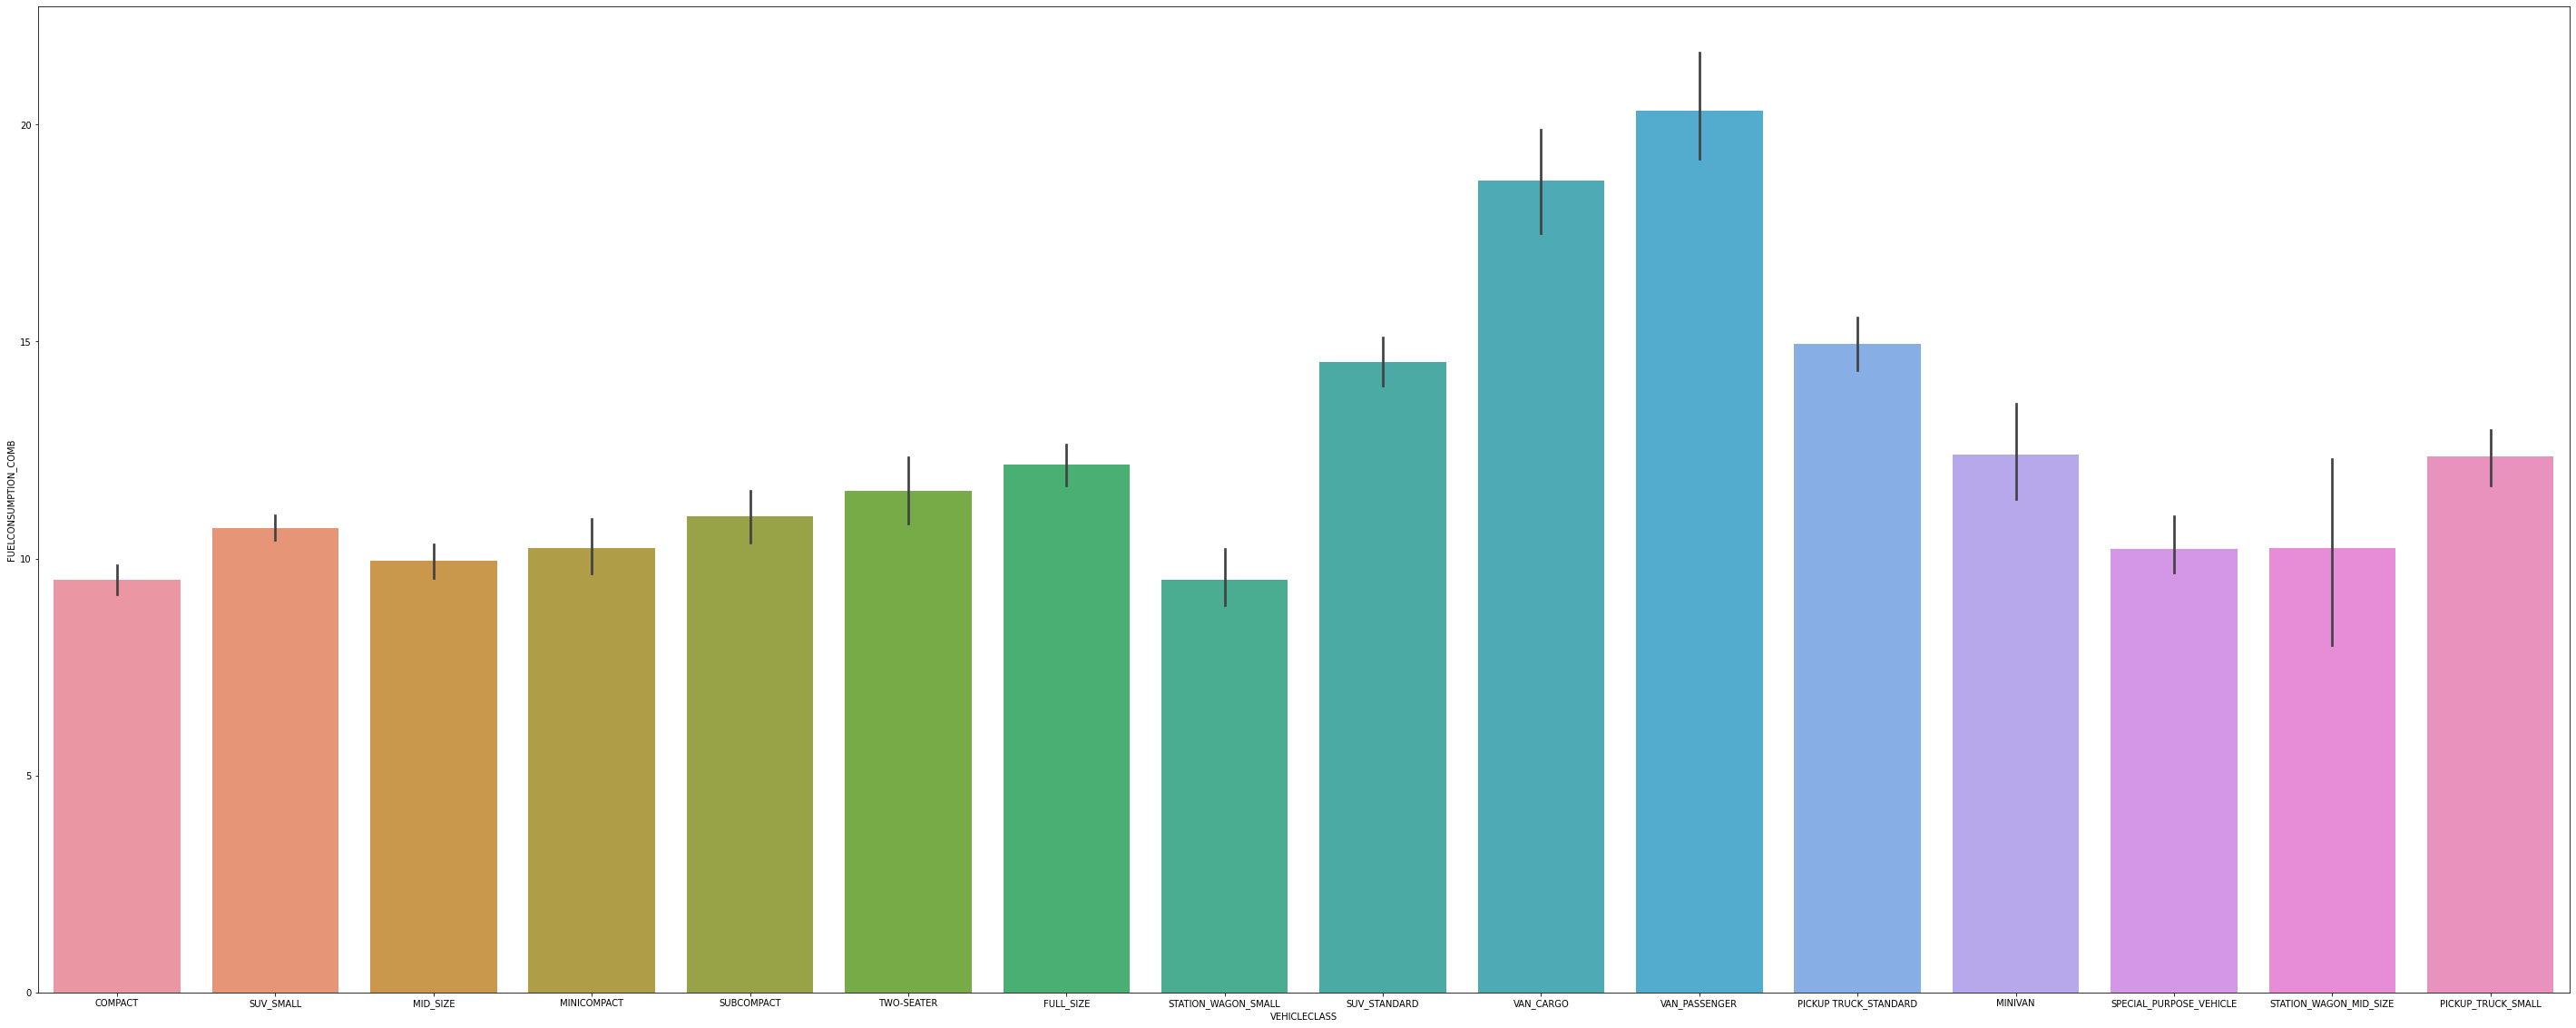

In [57]:
# check each vehicle class' combined fuel consumption
sns.barplot(x='VEHICLECLASS', y='FUELCONSUMPTION_COMB', data = data)

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='FUELCONSUMPTION_COMB_MPG'>

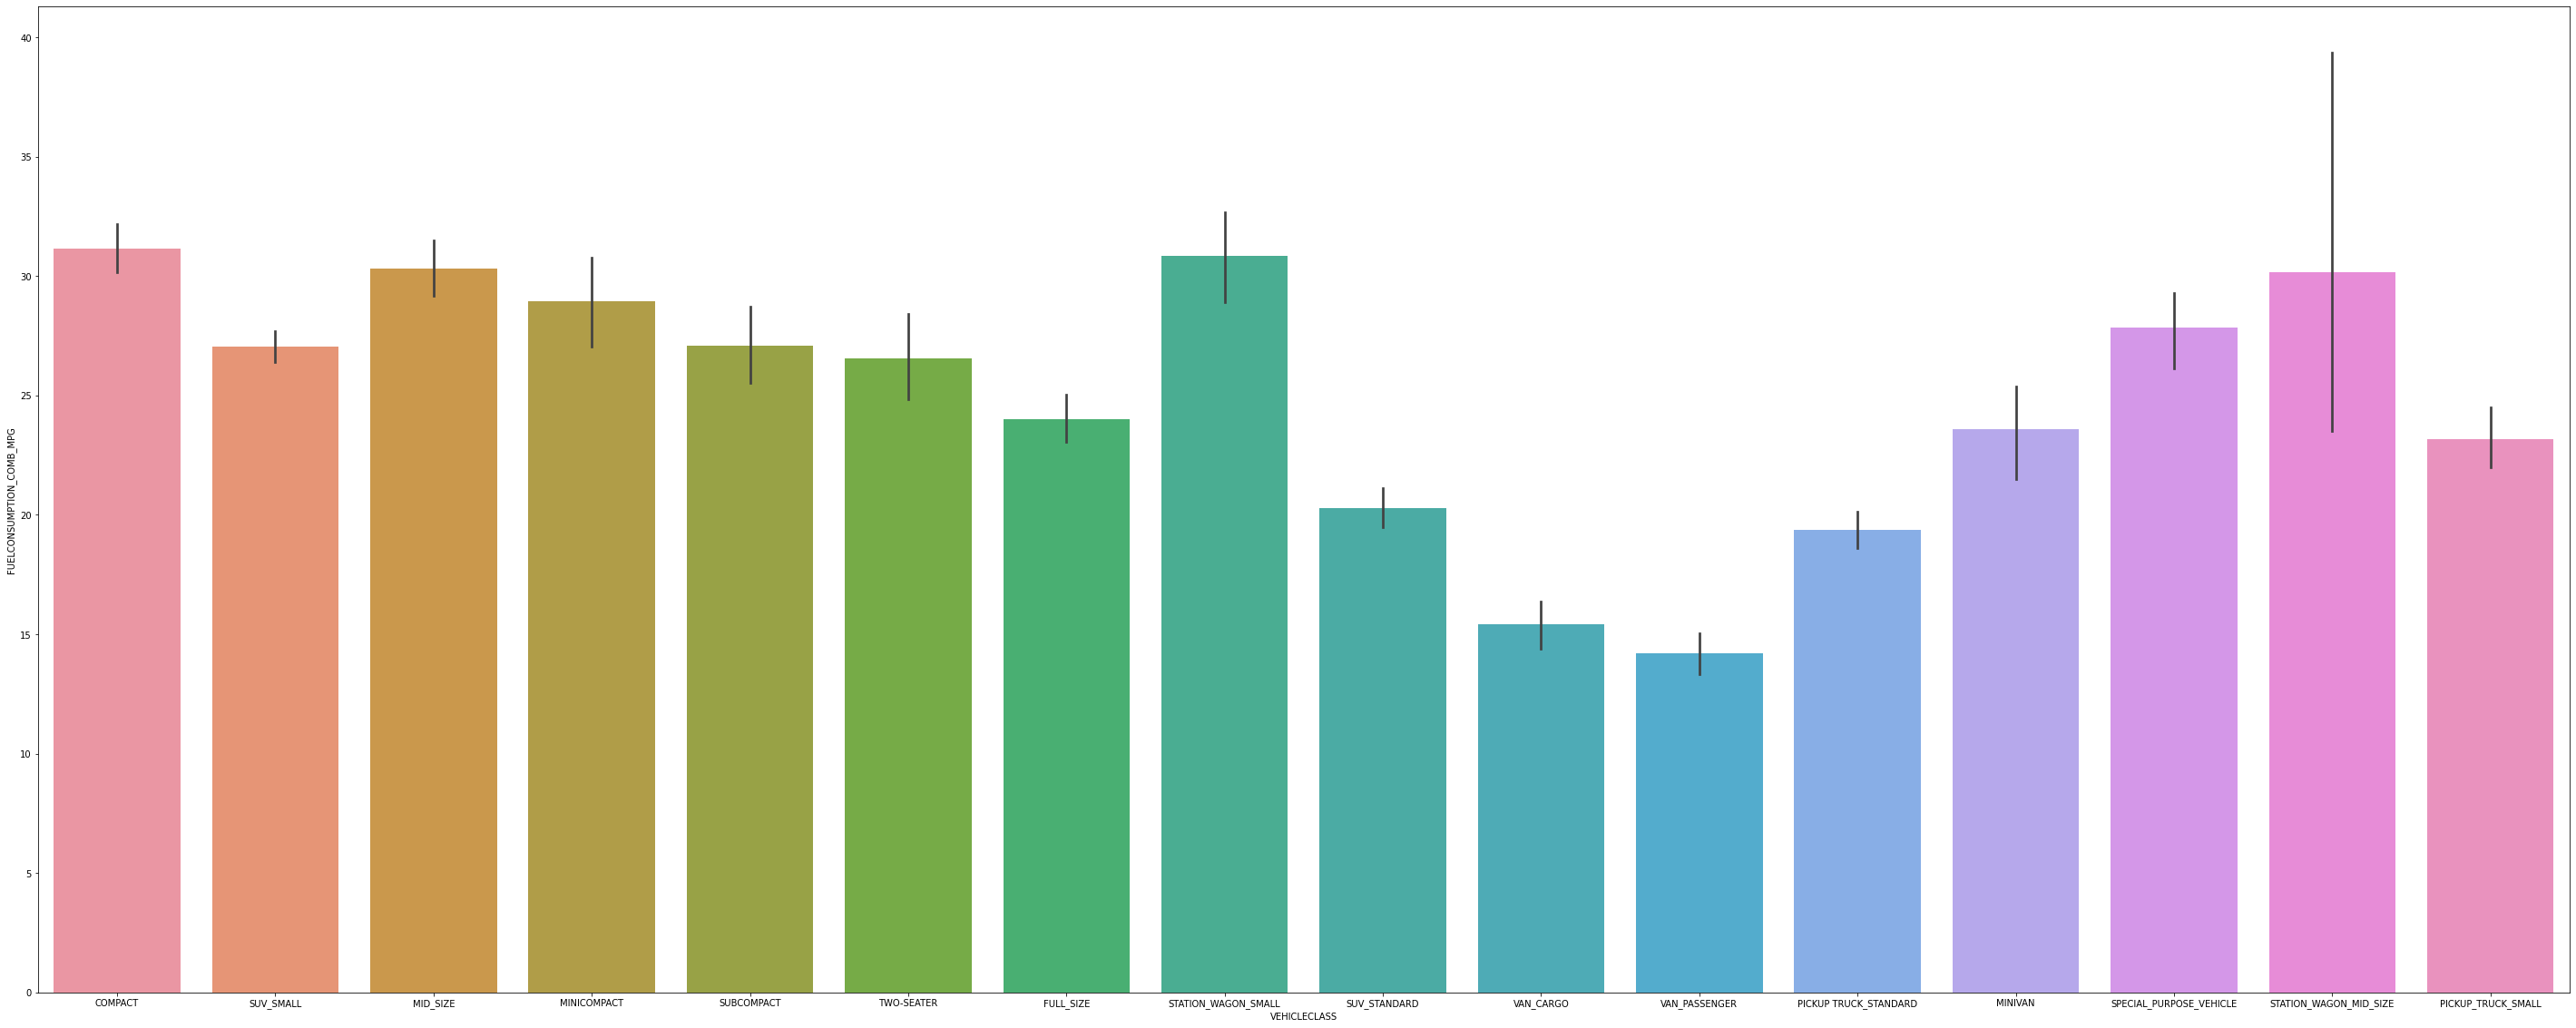

In [58]:
# check each vehicle class' combined fuel consumption (miles per gallon)
sns.barplot(x='VEHICLECLASS', y='FUELCONSUMPTION_COMB_MPG', data = data)

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='count'>

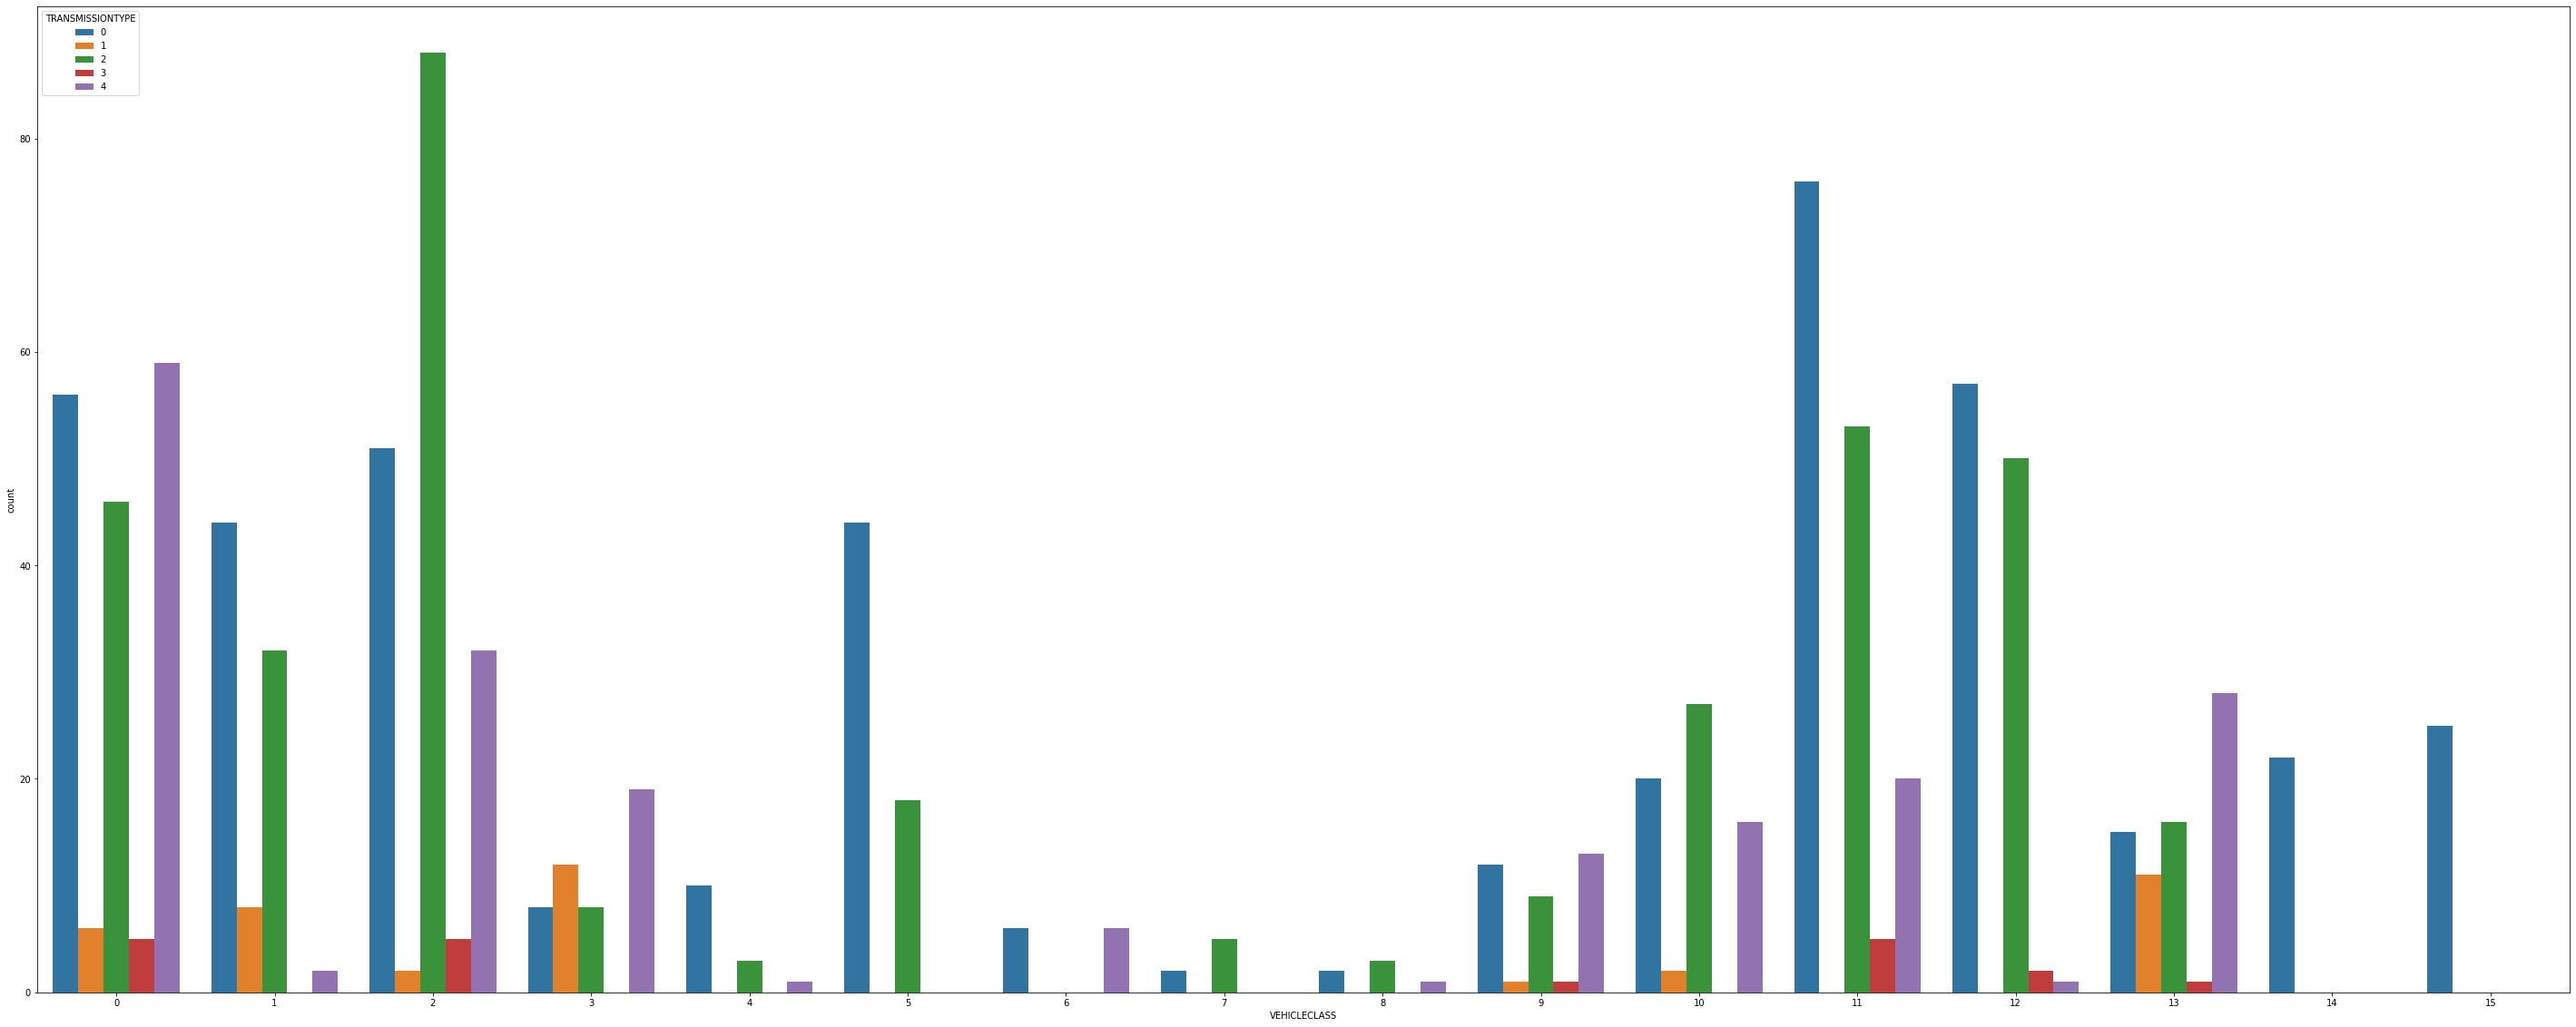

In [59]:
# check types of transmission used by each vehicle class
sns.countplot(x='VEHICLECLASS', hue='TRANSMISSIONTYPE', data = dataE)

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='count'>

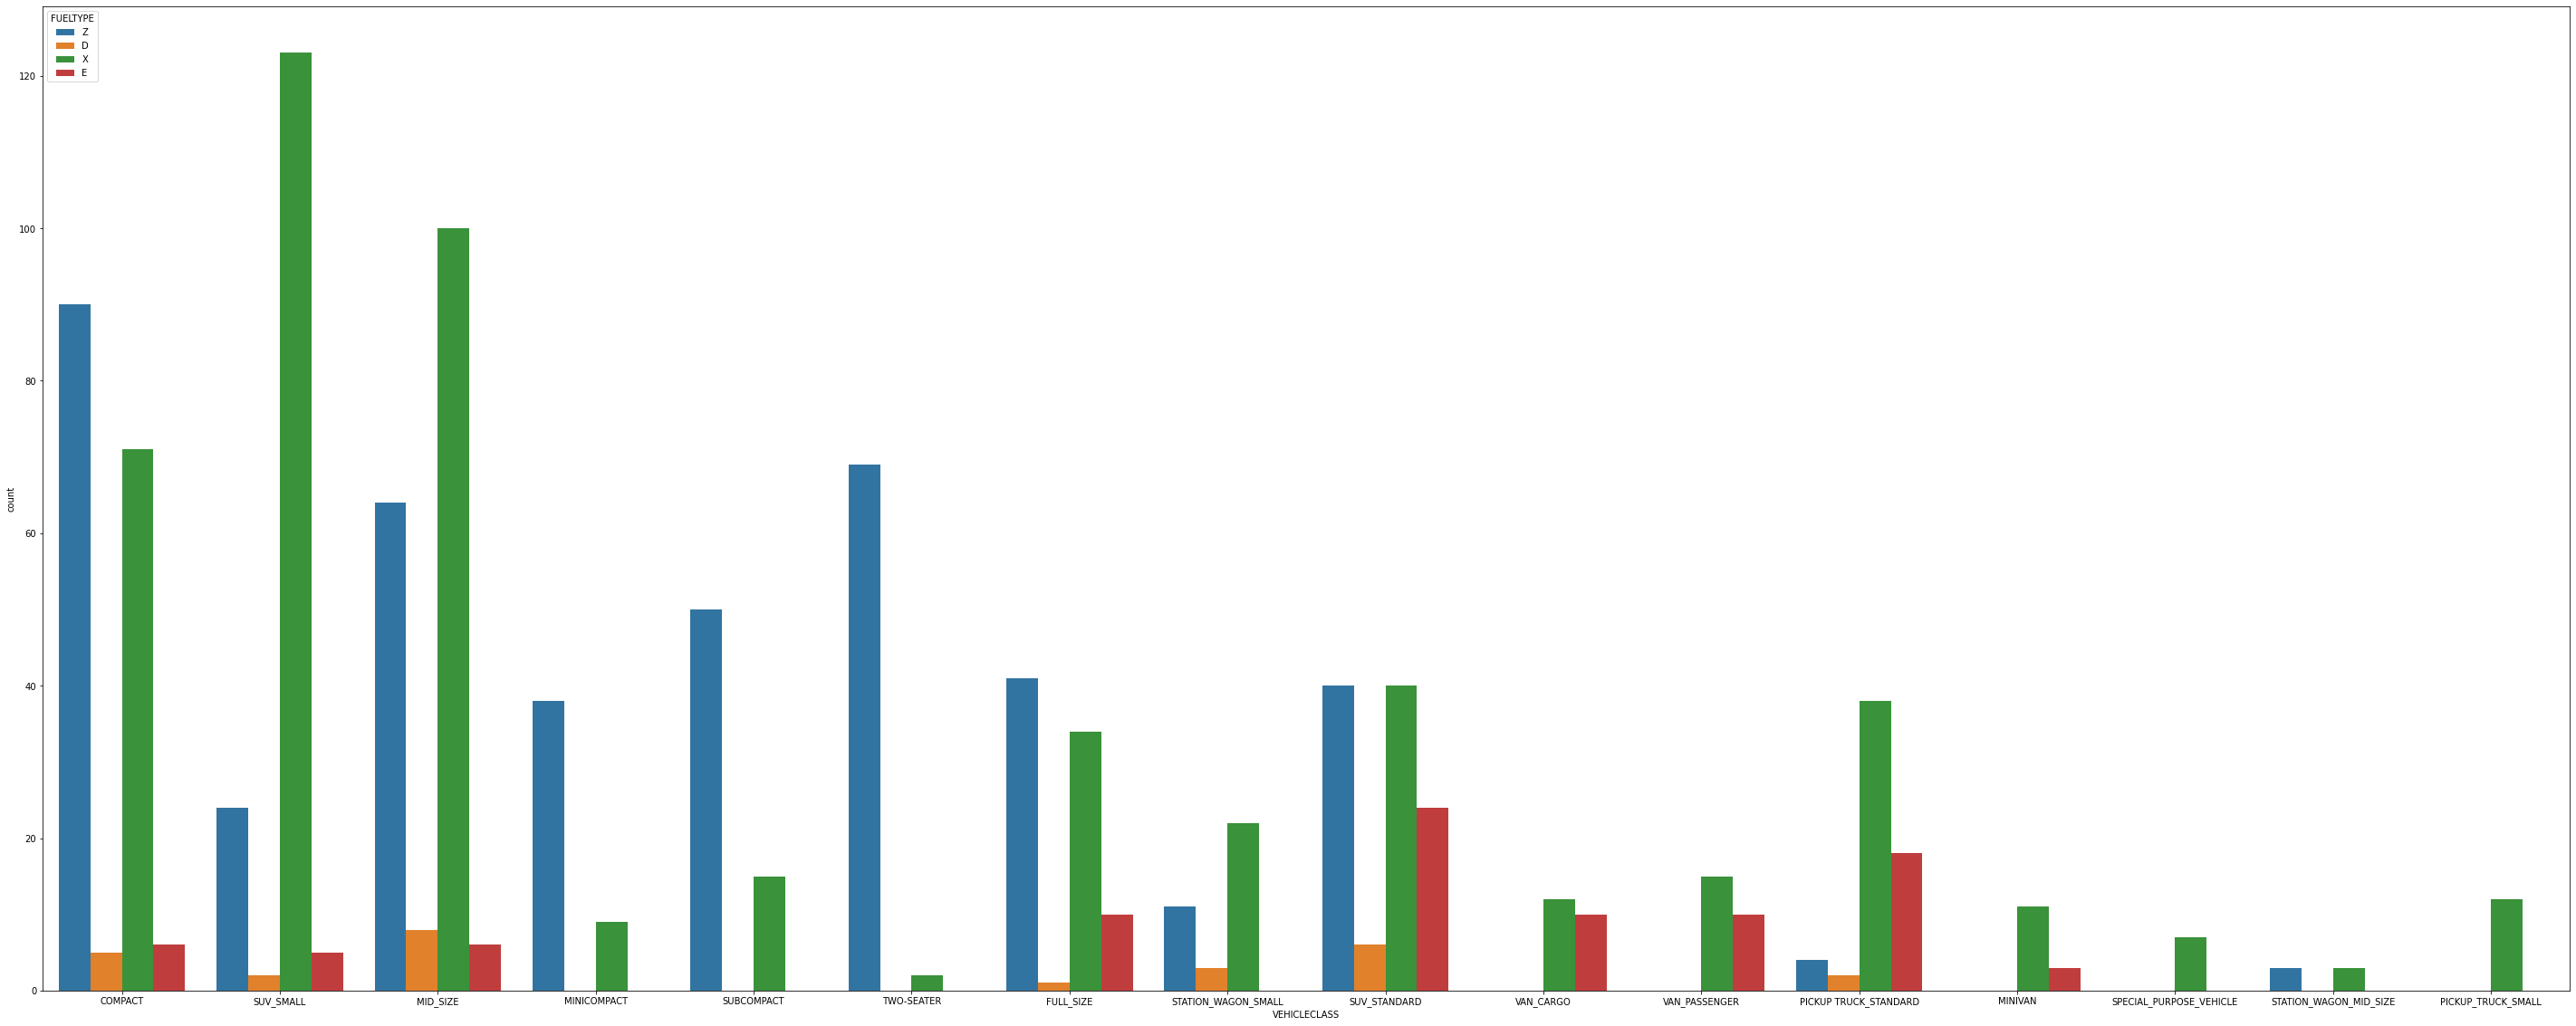

In [60]:
# check types of fuel used by each vehicle class
sns.countplot(x='VEHICLECLASS', hue='FUELTYPE', data = data)

## Fuel Type

According to a quick search:
- **X**   is Regular Gasoline
- **Z**   is Premium Gasoline 
- **E**   is Ethanol
- **D**   is Diesel

In [61]:
# Check the number of vehicles operating on each type of Fuel
data['FUELTYPE'].value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [62]:
plt.rcParams["figure.figsize"]=10,10

<AxesSubplot:xlabel='FUELTYPE', ylabel='count'>

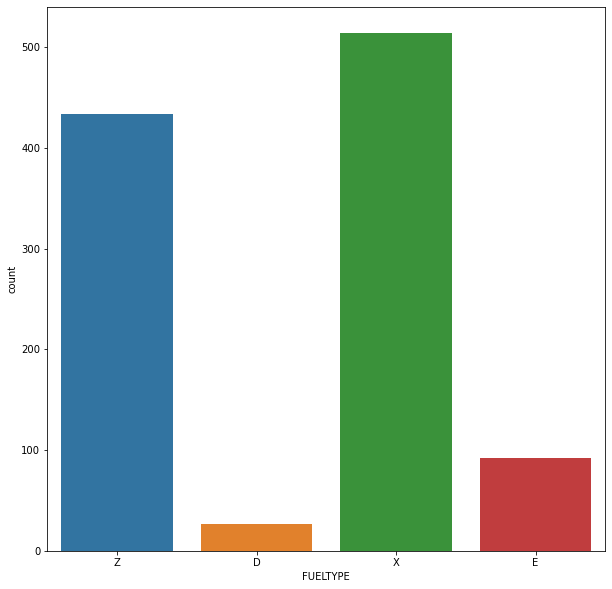

In [63]:
# Visualize the number of vehicles operating on each type of Fuel
sns.countplot(x='FUELTYPE', data=data)

## Transmission Type

In [64]:
data['TRANSMISSIONTYPE'].value_counts()

A     450
AS    358
M     198
AM     42
AV     19
Name: TRANSMISSIONTYPE, dtype: int64

<AxesSubplot:xlabel='TRANSMISSIONTYPE', ylabel='count'>

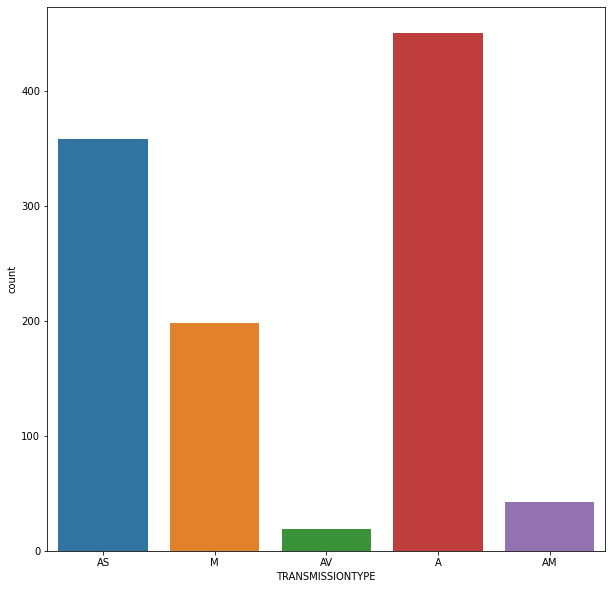

In [65]:
sns.countplot(x='TRANSMISSIONTYPE', data=data)

## Exploratory Charts

In [66]:
plt.rcParams["figure.figsize"]=50,15

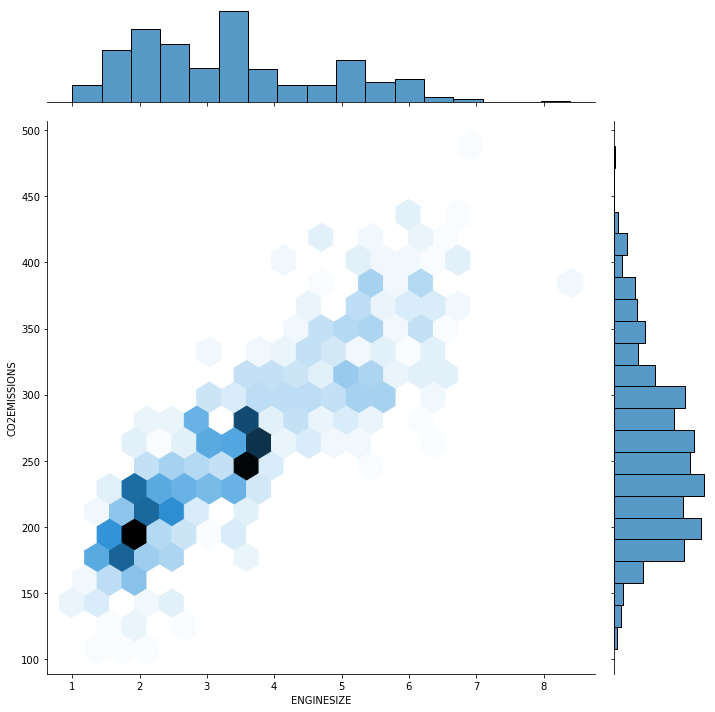

In [67]:
# correlation between Engine Size and CO2 Emissions 
sns.jointplot(x='ENGINESIZE', y='CO2EMISSIONS', data=data, kind='hex', height=10)

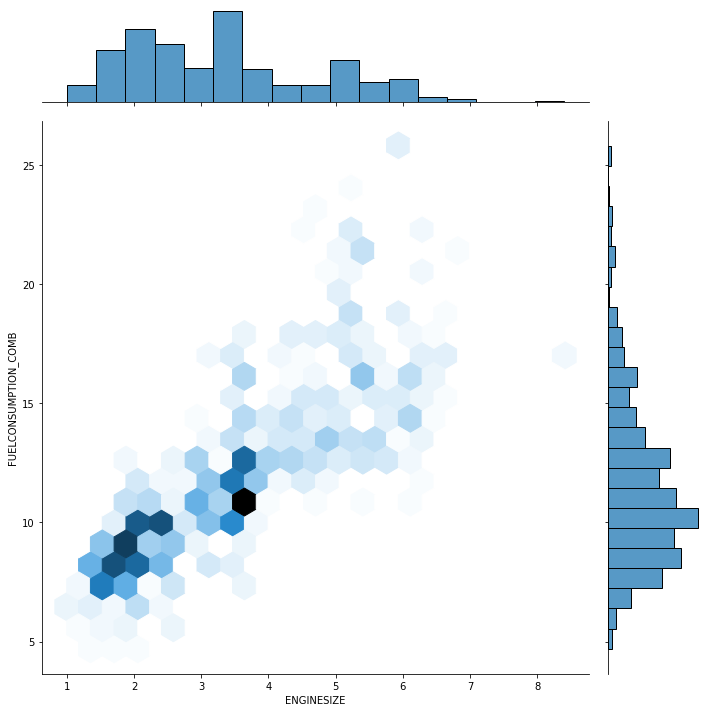

In [68]:
# correlation between Engine Size and Combined Fuel Consumption 
sns.jointplot(x='ENGINESIZE', y='FUELCONSUMPTION_COMB', data=data, kind='hex', height=10)

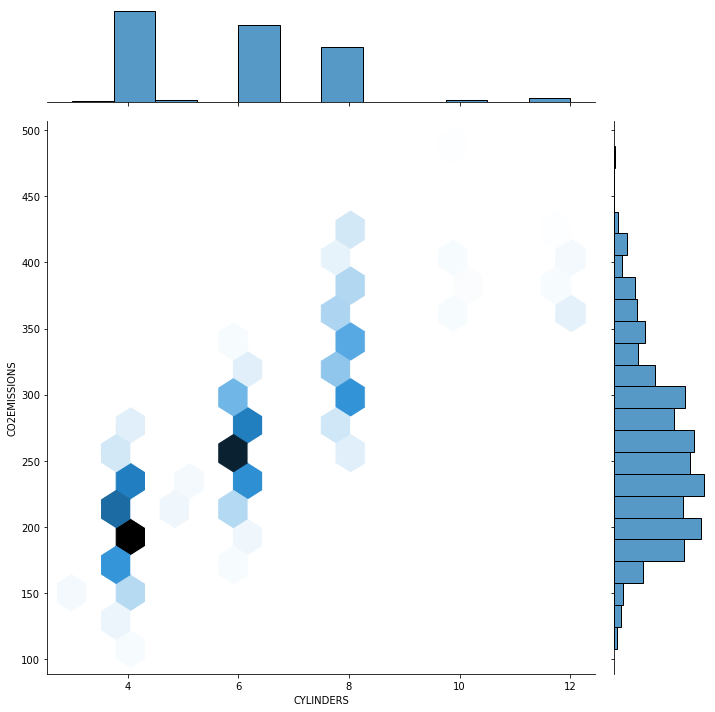

In [69]:
# correlation between Number of Cylinders and CO2 Emissions
sns.jointplot(x='CYLINDERS', y='CO2EMISSIONS', data=data, kind='hex', height=10)

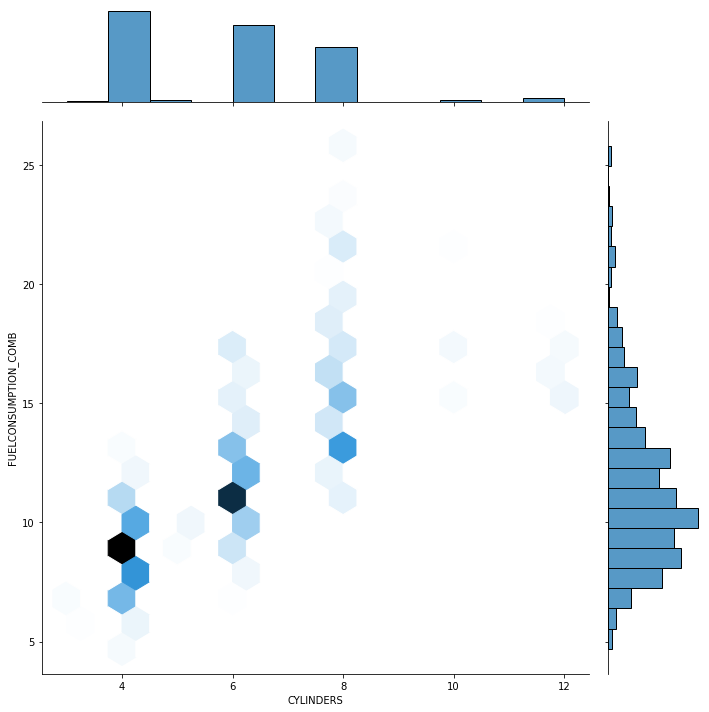

In [70]:
# correlation between Number of Cylinders and Combined Fuel Consumption
sns.jointplot(x='CYLINDERS', y='FUELCONSUMPTION_COMB', data=data, kind='hex', height=10)

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='Brands'>

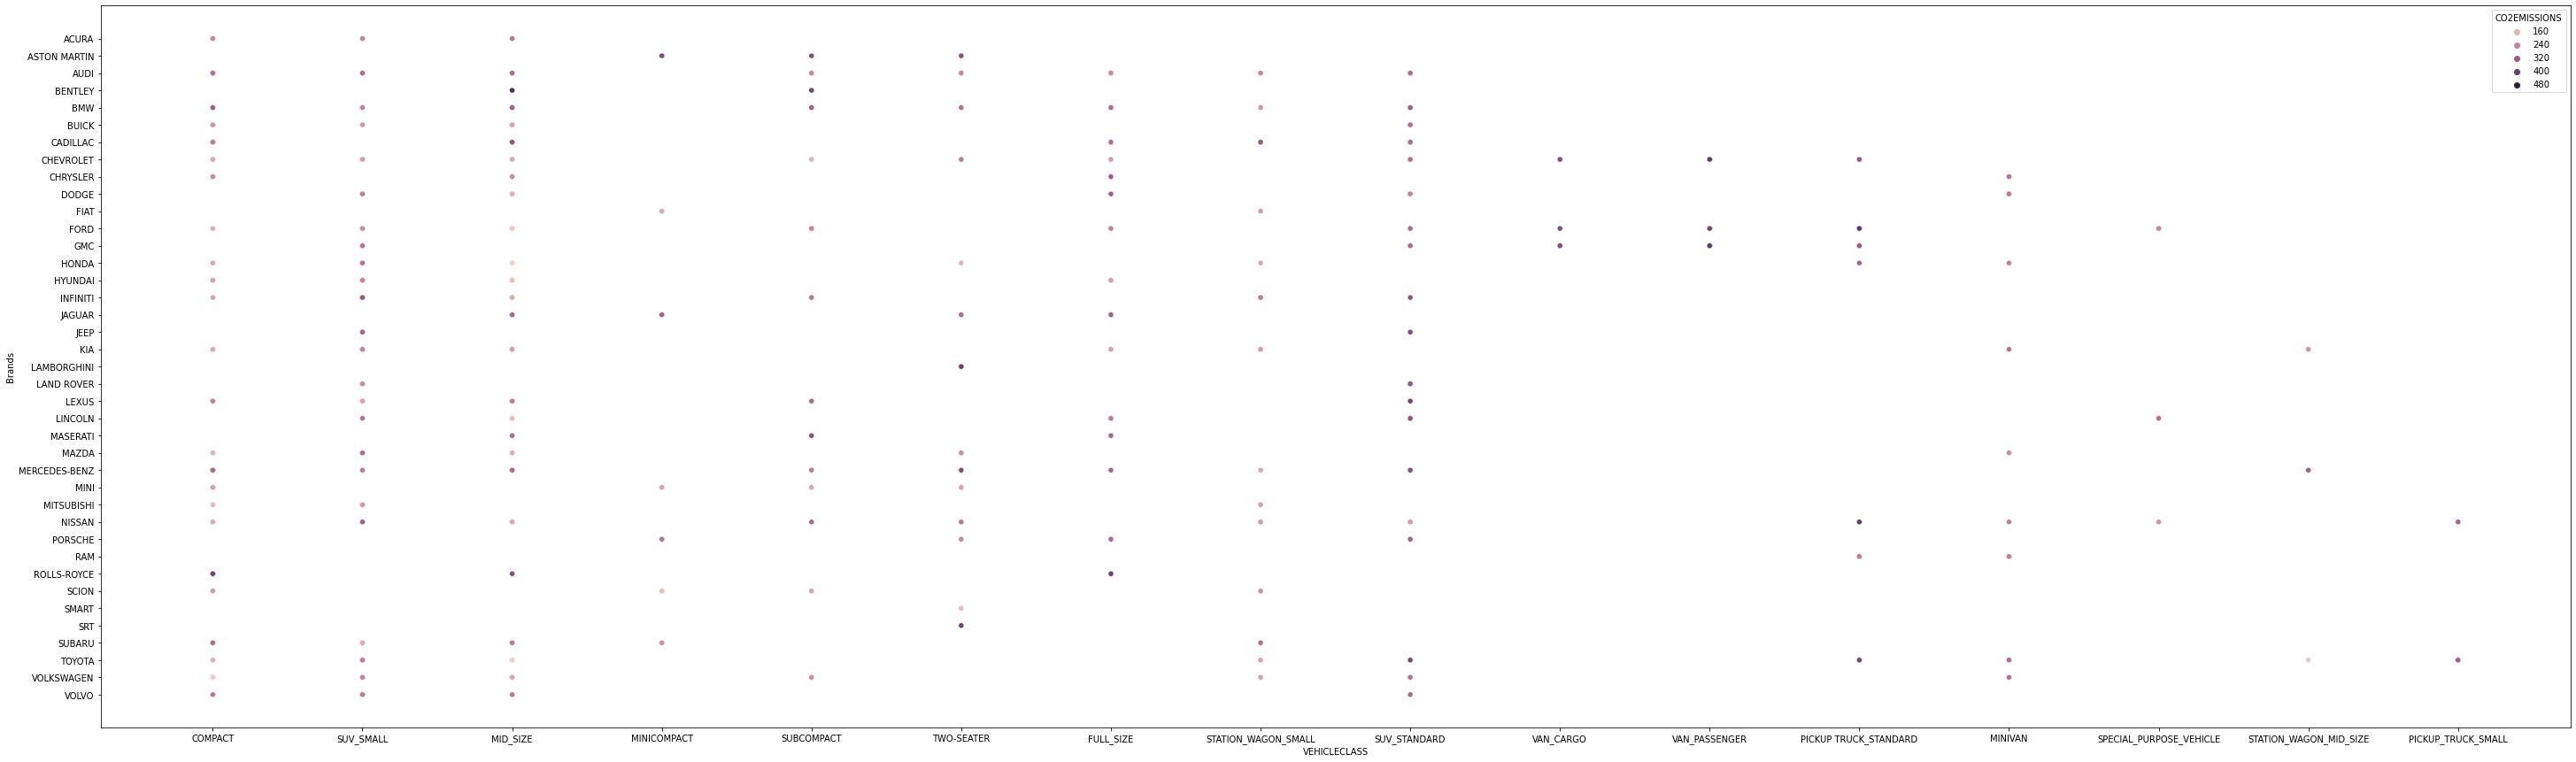

In [71]:
sns.scatterplot(x= 'VEHICLECLASS', y= 'Brands', hue= 'CO2EMISSIONS', data=data)

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='Brands'>

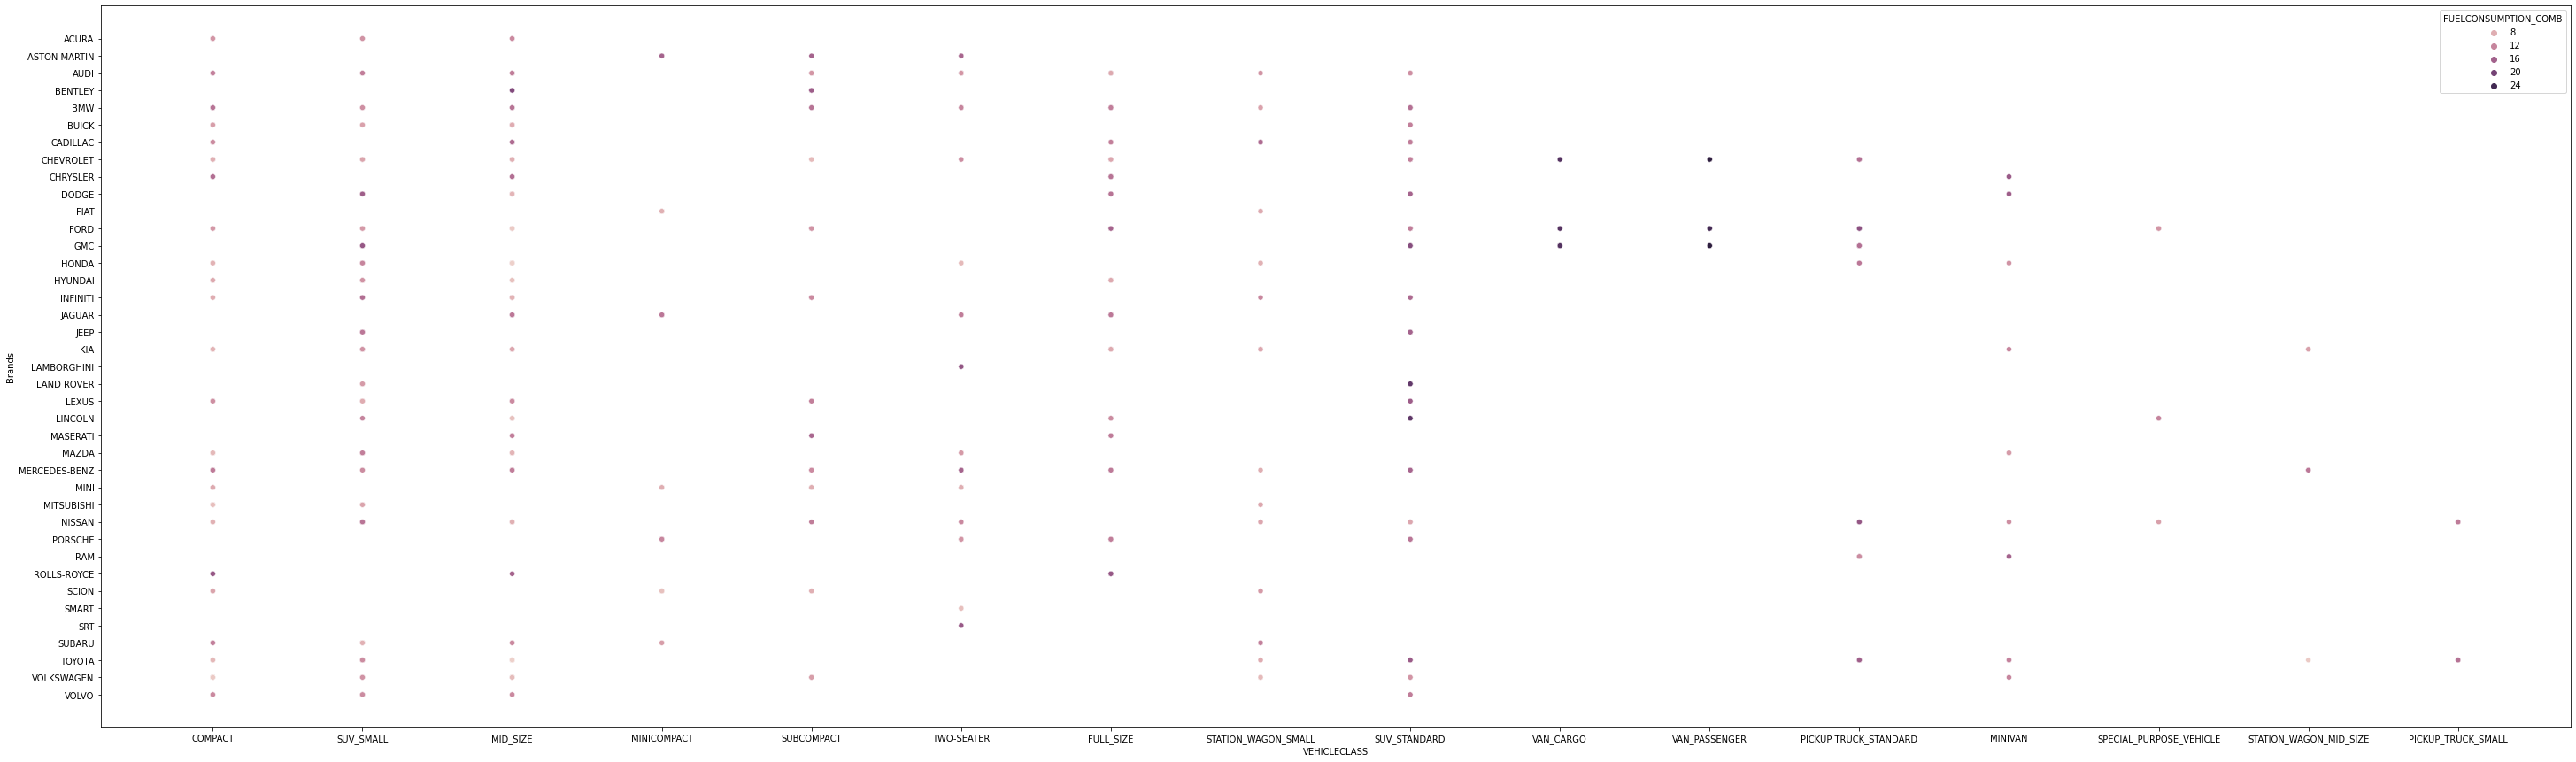

In [72]:
sns.scatterplot(x= 'VEHICLECLASS', y= 'Brands', hue= 'FUELCONSUMPTION_COMB', data=data)

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='Brands'>

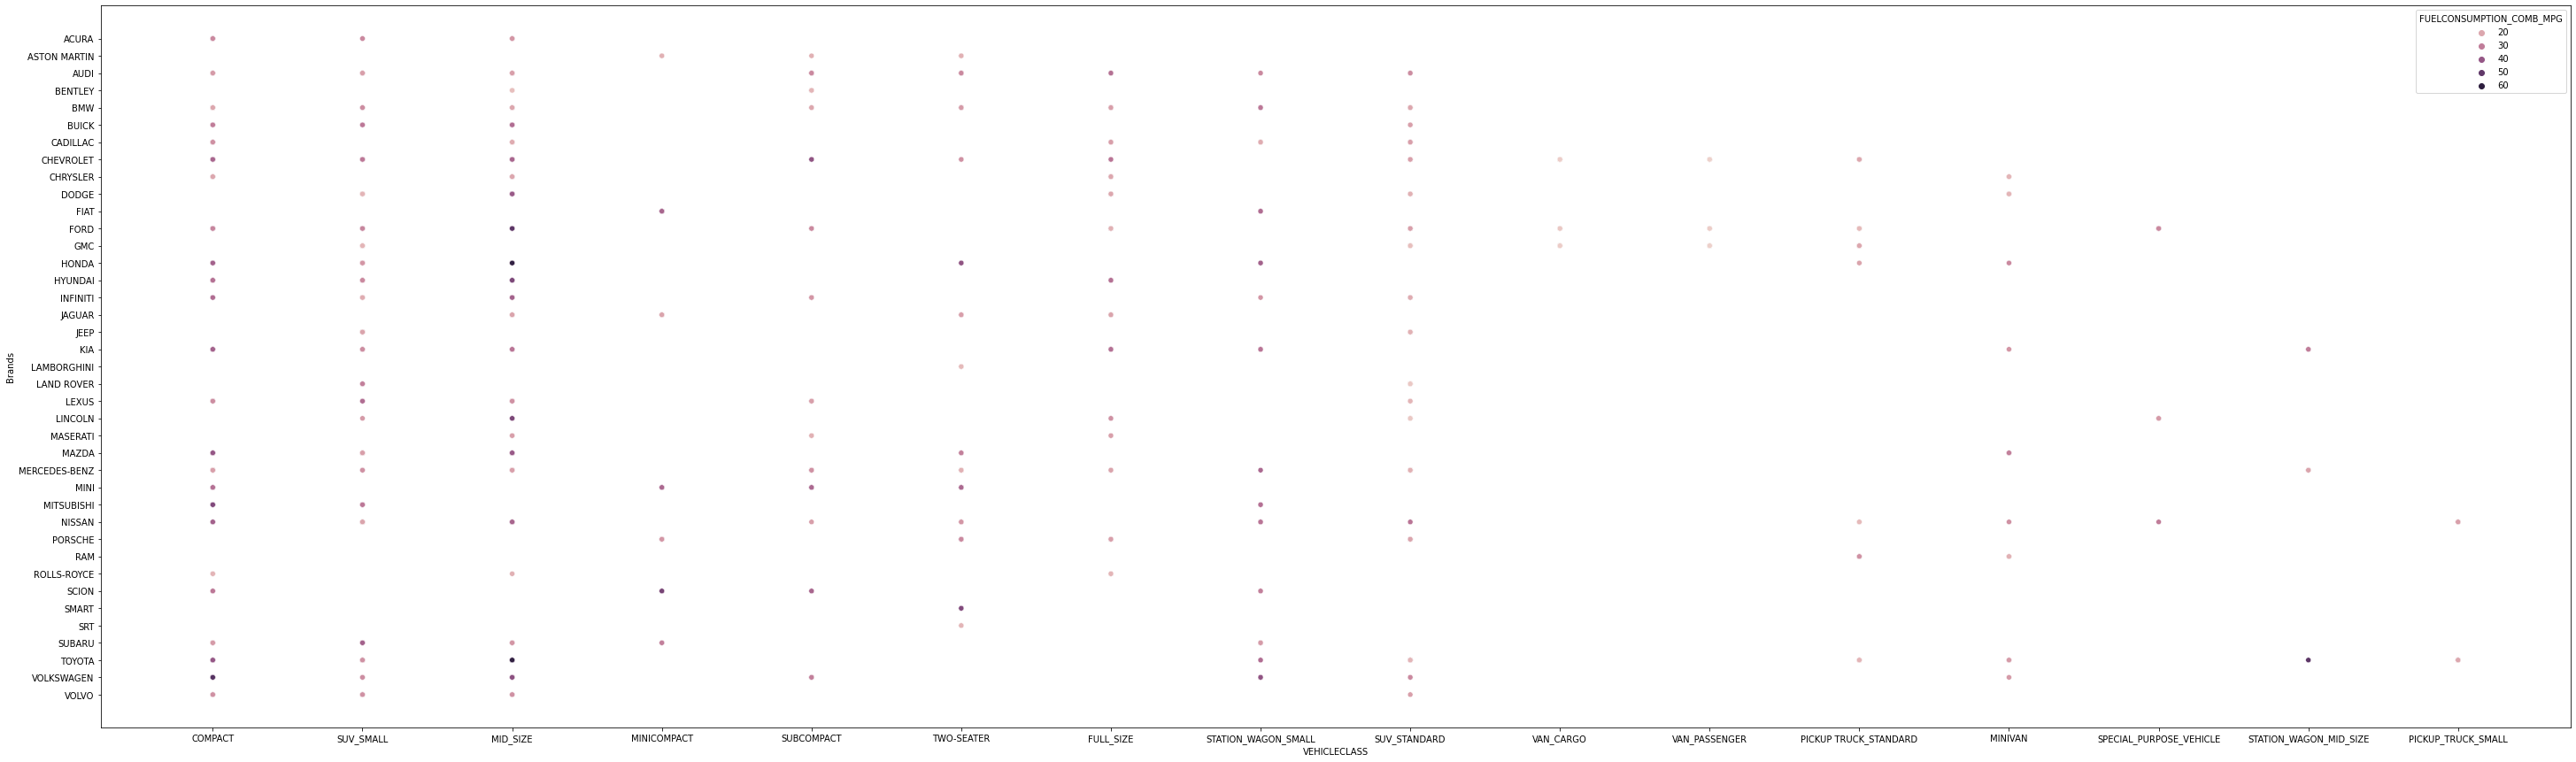

In [73]:
sns.scatterplot(x= 'VEHICLECLASS', y= 'Brands', hue= 'FUELCONSUMPTION_COMB_MPG', data=data)

<AxesSubplot:xlabel='ENGINESIZE', ylabel='VEHICLECLASS'>

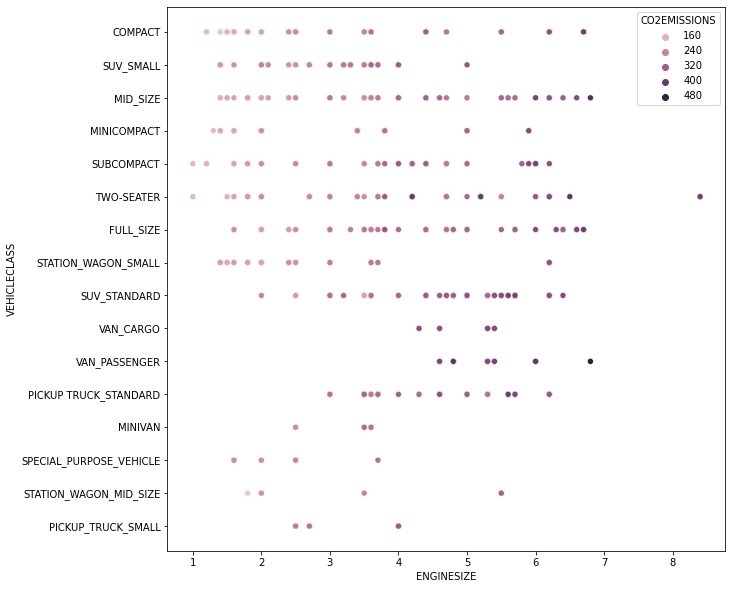

In [74]:
plt.rcParams["figure.figsize"]=10,10

sns.scatterplot(x='ENGINESIZE', y='VEHICLECLASS', hue='CO2EMISSIONS', data=data)

<AxesSubplot:xlabel='ENGINESIZE', ylabel='VEHICLECLASS'>

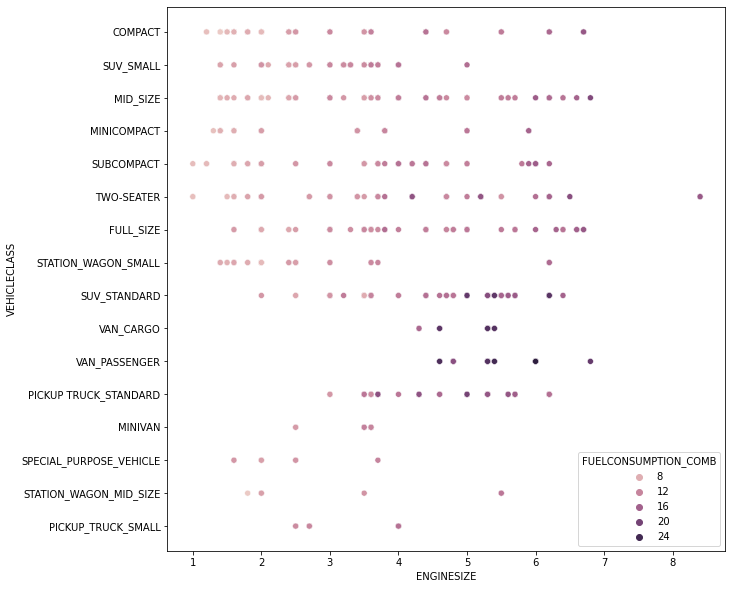

In [75]:
plt.rcParams["figure.figsize"]=10,10

sns.scatterplot(x='ENGINESIZE', y='VEHICLECLASS', hue='FUELCONSUMPTION_COMB', data=data)

<AxesSubplot:xlabel='ENGINESIZE', ylabel='Brands'>

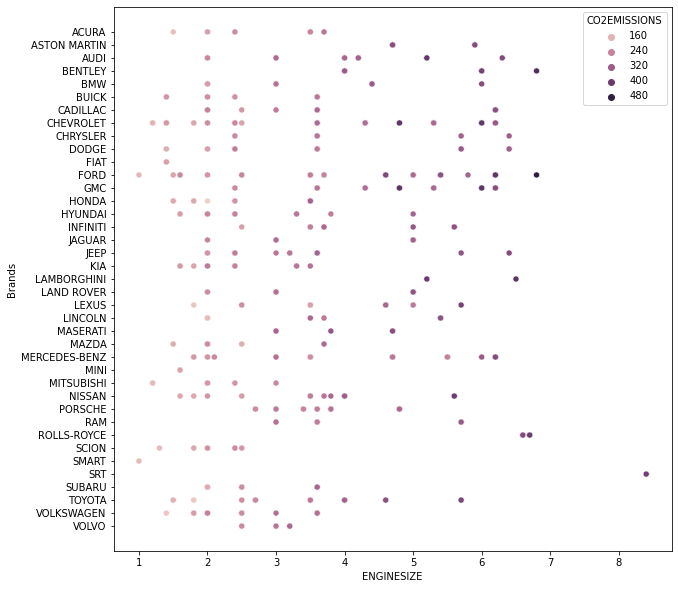

In [76]:
plt.rcParams["figure.figsize"]=10,10

sns.scatterplot(x='ENGINESIZE', y='Brands', hue='CO2EMISSIONS', data=data)

<AxesSubplot:xlabel='ENGINESIZE', ylabel='Brands'>

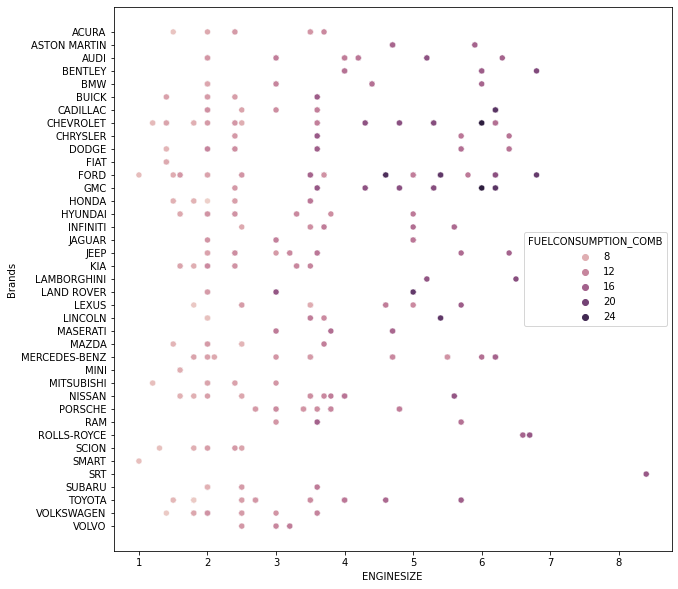

In [77]:
plt.rcParams["figure.figsize"]=10,10

sns.scatterplot(x='ENGINESIZE', y='Brands', hue='FUELCONSUMPTION_COMB', data=data)

# 5- Machine Learning Model

In [78]:
# Importing the dataset determining the factors affecting estemated parameter
X = np.asanyarray(data[ ['FUELCONSUMPTION_COMB_MPG', 'ENGINESIZE', 'FUELCONSUMPTION_COMB'] ]) #converts every column into an array
Y = np.asanyarray(data[ ['CO2EMISSIONS'] ])

#Printing X
X

array([[33. ,  2. ,  8.5],
       [29. ,  2.4,  9.6],
       [48. ,  1.5,  5.9],
       ...,
       [24. ,  3. , 11.8],
       [25. ,  3.2, 11.3],
       [22. ,  3.2, 12.8]])

In [79]:
# Splitting the dataset into the Training set, and Test set. 1/3, and fixed random state 101.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 101)

In [80]:
#setting it as regressor
regressor = LinearRegression()        

In [81]:
#start Training
regressor.fit(X_train, y_train)

LinearRegression()

In [82]:
#start testing

y_pred = regressor.predict(X_test) #function enables us to predict the labels of the data values on the basis of the trained model

In [83]:
#print predected results
y_pred

array([[169.48296556],
       [251.08051143],
       [338.16885903],
       [220.49979415],
       [355.23313833],
       [301.54774062],
       [251.77514453],
       [208.84015995],
       [275.51353359],
       [249.08072136],
       [311.47838051],
       [254.44700484],
       [348.79413201],
       [298.76653893],
       [227.17123461],
       [305.20554525],
       [173.41895192],
       [269.19966741],
       [203.28452064],
       [313.54443365],
       [274.79838503],
       [213.49129487],
       [210.83995002],
       [264.42339234],
       [229.80206401],
       [288.07971957],
       [293.82409279],
       [346.91948209],
       [275.15595931],
       [324.71396743],
       [176.32324637],
       [223.15113901],
       [208.84015995],
       [222.1625254 ],
       [208.84015995],
       [199.53789009],
       [222.79356473],
       [281.78636885],
       [165.18940491],
       [273.83028688],
       [166.15750306],
       [275.51353359],
       [288.60346491],
       [259

In [84]:
print('MSE:', metrics.mean_squared_error(y_pred,y_test) ) 

#the average of the square of the difference between the observed and predicted values of a variable

print('MAE:', metrics.mean_absolute_error(y_pred,y_test) )

#It calculates errors between actual values and values predicted by the model

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred,y_test)) ) #Mean squared error regression loss

print('r2_score:', metrics.r2_score(y_pred,y_test) *100 )

MSE: 388.21733397886663
MAE: 13.650065729661998
RMSE: 19.703231561824232
r2_score: 89.27171815863308
